In [1]:
#import all necessary libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import datetime as dt
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.cm as cm
from scipy.stats import iqr
from scipy.stats import entropy

In [2]:
######################################################################### download
#load the csv file and save it into the dataframe donors
mypath=os.path.join("..","Project","donors_preprocessed(4).csv")
donors=pd.read_csv(os.path.join(mypath),index_col = 0, encoding='utf-8-sig')

In [3]:
donors.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89778 entries, 95515 to 185114
Data columns (total 156 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   RECPGVG                   int64  
 1   RECSWEEP                  int64  
 2   NUMCHLD                   float64
 3   INCOME                    int64  
 4   HIT                       int64  
 5   SOLP3                     int64  
 6   SOLIH                     int64  
 7   COLLECT1                  int64  
 8   VETERANS                  int64  
 9   BIBLE                     int64  
 10  CATLG                     int64  
 11  HOMEE                     int64  
 12  PETS                      int64  
 13  CDPLAY                    int64  
 14  STEREO                    int64  
 15  PCOWNERS                  int64  
 16  PHOTO                     int64  
 17  CRAFTS                    int64  
 18  FISHER                    int64  
 19  GARDENIN                  int64  
 20  BOATS                 

In [4]:
donors.head()

RECPGVG  RECSWEEP  NUMCHLD  INCOME  HIT  SOLP3  SOLIH  COLLECT1  \
CONTROLN                                                                    
95515           0         0      0.0       3    0     -1     -1         0   
15078           0         0      0.0       3    2     -1     -1         0   
172556          0         0      0.0       1    2     -1     -1         0   
47784           0         0      0.0       4    0     -1     -1         0   
62117           0         0      1.0       4    0     -1     -1         0   

          VETERANS  BIBLE  ...  urbanicity_level_1  urbanicity_level_2  \
CONTROLN                   ...                                           
95515            0      0  ...                 0.0                 0.0   
15078            0      0  ...                 0.0                 0.0   
172556           0      0  ...                 0.0                 0.0   
47784            0      0  ...                 0.0                 0.0   
62117            0      0  ...                 0.0                 0.0   

          urbanicity_level_3  urbanicity_level_4  MSA_1600.0  MSA_4480.0  \
CONTROLN                                                                   
95515                    1.0                 0.0         0.0         0.0   
15078                    0.0                 1.0         0.0         0.0   
172556                   0.0                 1.0         0.0         0.0   
47784                    1.0                 0.0         0.0         0.0   
62117                    1.0                 0.0         0.0         0.0   

          MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  
CONTROLN                                              
95515           0.0        0.0        0.0        1.0  
15078           0.0        0.0        0.0        1.0  
172556          1.0        0.0        0.0        1.0  
47784           1.0        0.0        0.0        1.0  
62117           0.0        0.0        0.0        1.0  

[5 rows x 156 columns]

In [5]:
donors.shape

(89778, 156)

In [6]:
donors_withoutscaler = donors.copy()

In [7]:
non_metric_features=['RECPGVG',
 'INCOME',
 'RECSWEEP',
 'SOLP3',
 'SOLIH',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL',
 'RFA_2F',
 'RFA_2A',
 'MDMAUD_F',
 'MDMAUD_A',
 '1TIME_DONOR',
 'socio_econ_neighbourhood',
 'STATE_FL',
 'STATE_GA',
 'STATE_IL',
 'STATE_MI',
 'STATE_NC',
 'STATE_Other',
 'STATE_TX',
 'STATE_WA',
 'MDMAUD_R_D',
 'MDMAUD_R_I',
 'MDMAUD_R_L',
 'MDMAUD_R_X',
 'DTSRCE_1',
 'DTSRCE_2',
 'DTSRCE_3',
 'GENDER_M',
 'GENDER_U',
 'urbanicity_level_1',
 'urbanicity_level_2',
 'urbanicity_level_3',
 'urbanicity_level_4',
 'MSA_1600.0',
 'MSA_4480.0',
 'MSA_Other',
 'DMA_803.0',
 'DMA_807.0',
 'DMA_Other',
 'POP90C1',
 'POP90C3']

In [8]:
len(non_metric_features)# added POP90C1, POP90C3

59

In [9]:
#removed 'HVP3', 'HVP4', 'HVP5', ''POP90C4',added POP90C1, POP90C3
metric_features=[
 'NUMCHLD',
 'HIT',
 'POP901',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'AGE904',
 'AGE907',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'HU2',
 'HU5',
 'HVP1',
 'HVP2',
 'HVP6',
 'IC3',
 'IC5',
 'IC6',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC12',
 'IC13',
 'IC14',
 'PEC1',
 'PEC2',
 'LFC10',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'AFC1',
 'AFC4',
 'ANC1',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'POBC1',
 'POBC2',
 'VOC1',
 'VOC2',
 'VOC3',
 'HC15',
 'AC1',
 'AC2',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'TIMELAG',
 'AVGGIFT',
 'AGE',
 'TENURE']

In [10]:
len(metric_features)

97

In [11]:
donors.describe()

RECPGVG      RECSWEEP       NUMCHLD        INCOME           HIT  \
count  89778.000000  89778.000000  89778.000000  89778.000000  89778.000000   
mean       0.001069      0.013589      0.228798      3.900421      2.787064   
std        0.032683      0.115778      0.629423      1.729247      5.382944   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        0.000000      0.000000      0.000000      2.000000      0.000000   
50%        0.000000      0.000000      0.000000      4.000000      0.000000   
75%        0.000000      0.000000      0.000000      5.000000      3.000000   
max        1.000000      1.000000      7.000000      7.000000     31.000000   

              SOLP3         SOLIH      COLLECT1      VETERANS         BIBLE  \
count  89778.000000  89778.000000  89778.000000  89778.000000  89778.000000   
mean      -0.744136     -0.082615      0.073492      0.109637      0.094132   
std        1.801707      3.315908      0.260944      0.312439      0.292014   
min       -1.000000     -1.000000      0.000000      0.000000      0.000000   
25%       -1.000000     -1.000000      0.000000      0.000000      0.000000   
50%       -1.000000     -1.000000      0.000000      0.000000      0.000000   
75%       -1.000000     -1.000000      0.000000      0.000000      0.000000   
max       12.000000     12.000000      1.000000      1.000000      1.000000   

       ...  urbanicity_level_1  urbanicity_level_2  urbanicity_level_3  \
count  ...        89778.000000        89778.000000        89778.000000   
mean   ...            0.208169            0.234567            0.214808   
std    ...            0.406001            0.423731            0.410691   
min    ...            0.000000            0.000000            0.000000   
25%    ...            0.000000            0.000000            0.000000   
50%    ...            0.000000            0.000000            0.000000   
75%    ...            0.000000            0.000000            0.000000   
max    ...            1.000000            1.000000            1.000000   

       urbanicity_level_4    MSA_1600.0    MSA_4480.0    MSA_Other  \
count        89778.000000  89778.000000  89778.000000  89778.00000   
mean             0.216891      0.042460      0.046303      0.68333   
std              0.412130      0.201638      0.210142      0.46518   
min              0.000000      0.000000      0.000000      0.00000   
25%              0.000000      0.000000      0.000000      0.00000   
50%              0.000000      0.000000      0.000000      1.00000   
75%              0.000000      0.000000      0.000000      1.00000   
max              1.000000      1.000000      1.000000      1.00000   

          DMA_803.0     DMA_807.0     DMA_Other  
count  89778.000000  89778.000000  89778.000000  
mean       0.073604      0.037281      0.840596  
std        0.261126      0.189450      0.366055  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      1.000000  
50%        0.000000      0.000000      1.000000  
75%        0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 156 columns]

## Scaling

In [12]:
#Before scaling we have to transform the percentage neighborhood variables into the range of 0 to 1 and then we don't need to apply scalling to them
neigh_variables = ['POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'AGE907',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'HU2',
 'HU5',
 'HVP1',
 'HVP2',
 'HVP6',
 'IC3',
 'IC5',
 'IC6',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC12',
 'IC13',
 'IC14',
 'PEC1',
 'PEC2',
 'LFC10',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'AFC1',
 'AFC4',
 'ANC1',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'POBC1',
 'POBC2',
 'VOC1',
 'VOC2',
 'VOC3',
 'HC15',
 'AC1',
 'AC2']


In [13]:
donors[neigh_variables] = donors[neigh_variables]/100


In [14]:
donors[neigh_variables]

POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  ...  \
CONTROLN                                                                 ...   
95515        0.53  0.92  0.01  0.00  0.00  0.11  0.00  0.00  0.00  0.00  ...   
15078        0.51  0.96  0.02  0.00  0.00  0.02  0.00  0.00  0.00  0.00  ...   
172556       0.46  0.61  0.00  0.00  0.11  0.32  0.06  0.02  0.00  0.00  ...   
47784        0.51  0.93  0.06  0.01  0.01  0.01  0.00  0.00  0.00  0.00  ...   
62117        0.54  0.99  0.00  0.00  0.00  0.01  0.00  0.00  0.00  0.00  ...   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
184568       0.50  0.78  0.10  0.06  0.04  0.05  0.00  0.00  0.00  0.01  ...   
122706       0.49  0.91  0.03  0.00  0.02  0.06  0.01  0.00  0.01  0.00  ...   
189641       0.47  0.82  0.14  0.00  0.01  0.09  0.00  0.00  0.00  0.00  ...   
4693         0.53  0.92  0.01  0.01  0.05  0.08  0.00  0.01  0.02  0.00  ...   
185114       0.52  0.86  0.12  0.00  0.01  0.01  0.00  0.00  0.00  0.00  ...   

          ANC14  ANC15  POBC1  POBC2  VOC1  VOC2  VOC3  HC15   AC1   AC2  
CONTROLN                                                                  
95515      0.02    0.0   0.03   0.74  0.96  0.77  0.19   0.0  0.10  0.07  
15078      0.00    0.0   0.02   0.84  0.92  0.65  0.29   0.0  0.06  0.05  
172556     0.00    0.0   0.29   0.67  0.94  0.43  0.27   0.0  0.06  0.06  
47784      0.00    0.0   0.01   0.67  0.96  0.72  0.27   0.0  0.06  0.04  
62117      0.00    0.0   0.00   0.77  0.99  0.56  0.17   0.0  0.03  0.04  
...         ...    ...    ...    ...   ...   ...   ...   ...   ...   ...  
184568     0.01    0.0   0.04   0.26  0.95  0.60  0.19   0.0  0.04  0.03  
122706     0.01    0.0   0.02   0.51  0.99  0.84  0.29   0.0  0.03  0.02  
189641     0.00    0.0   0.06   0.82  0.93  0.42  0.12   0.0  0.03  0.11  
4693       0.00    0.0   0.14   0.50  0.99  0.85  0.43   0.0  0.06  0.03  
185114     0.01    0.0   0.01   0.48  0.99  0.81  0.24   0.0  0.07  0.04  

[89778 rows x 81 columns]

In [15]:
donors

RECPGVG  RECSWEEP  NUMCHLD  INCOME  HIT  SOLP3  SOLIH  COLLECT1  \
CONTROLN                                                                    
95515           0         0      0.0       3    0     -1     -1         0   
15078           0         0      0.0       3    2     -1     -1         0   
172556          0         0      0.0       1    2     -1     -1         0   
47784           0         0      0.0       4    0     -1     -1         0   
62117           0         0      1.0       4    0     -1     -1         0   
...           ...       ...      ...     ...  ...    ...    ...       ...   
184568          0         0      0.0       6    0     -1     -1         0   
122706          0         0      1.0       7    1     -1     -1         0   
189641          0         0      0.0       4    0     12     -1         0   
4693            0         0      0.0       7    0     -1     12         0   
185114          1         0      0.0       5    3     -1     12         0   

          VETERANS  BIBLE  ...  urbanicity_level_1  urbanicity_level_2  \
CONTROLN                   ...                                           
95515            0      0  ...                 0.0                 0.0   
15078            0      0  ...                 0.0                 0.0   
172556           0      0  ...                 0.0                 0.0   
47784            0      0  ...                 0.0                 0.0   
62117            0      0  ...                 0.0                 0.0   
...            ...    ...  ...                 ...                 ...   
184568           0      0  ...                 1.0                 0.0   
122706           0      0  ...                 1.0                 0.0   
189641           0      0  ...                 1.0                 0.0   
4693             0      0  ...                 1.0                 0.0   
185114           0      0  ...                 1.0                 0.0   

          urbanicity_level_3  urbanicity_level_4  MSA_1600.0  MSA_4480.0  \
CONTROLN                                                                   
95515                    1.0                 0.0         0.0         0.0   
15078                    0.0                 1.0         0.0         0.0   
172556                   0.0                 1.0         0.0         0.0   
47784                    1.0                 0.0         0.0         0.0   
62117                    1.0                 0.0         0.0         0.0   
...                      ...                 ...         ...         ...   
184568                   0.0                 0.0         0.0         0.0   
122706                   0.0                 0.0         0.0         0.0   
189641                   0.0                 0.0         0.0         0.0   
4693                     0.0                 0.0         0.0         0.0   
185114                   0.0                 0.0         0.0         0.0   

          MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  
CONTROLN                                              
95515           0.0        0.0        0.0        1.0  
15078           0.0        0.0        0.0        1.0  
172556          1.0        0.0        0.0        1.0  
47784           1.0        0.0        0.0        1.0  
62117           0.0        0.0        0.0        1.0  
...             ...        ...        ...        ...  
184568          1.0        0.0        0.0        1.0  
122706          1.0        0.0        0.0        1.0  
189641          1.0        0.0        0.0        1.0  
4693            1.0        1.0        0.0        0.0  
185114          1.0        0.0        0.0        1.0  

[89778 rows x 156 columns]

In [16]:
#To define the variables to scale because they are not percentage
variables_toscale=[variable for variable in metric_features if variable not in neigh_variables]
variables_toscale

['NUMCHLD',
 'HIT',
 'POP901',
 'AGE904',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'TIMELAG',
 'AVGGIFT',
 'AGE',
 'TENURE']


# Robust Scaller

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
#robust_metric_features= donors[metric_features].values
# perform a robust scaler transform of the dataset
trans = RobustScaler()
robust_metric_features = trans.fit_transform(donors[metric_features])



# convert the array back to a dataframe
#robust_metric_features_df = pd.DataFrame(robust_metric_feautures)
# summarize
#print(robust_metric_features_df.describe())
donors[metric_features]=robust_metric_features
donors.head()

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515           0         0      0.0       3  0.000000     -1     -1   
15078           0         0      0.0       3  0.666667     -1     -1   
172556          0         0      0.0       1  0.666667     -1     -1   
47784           0         0      0.0       4  0.000000     -1     -1   
62117           0         0      1.0       4  0.000000     -1     -1   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_1  \
CONTROLN                             ...                       
95515            0         0      0  ...                 0.0   
15078            0         0      0  ...                 0.0   
172556           0         0      0  ...                 0.0   
47784            0         0      0  ...                 0.0   
62117            0         0      0  ...                 0.0   

          urbanicity_level_2  urbanicity_level_3  urbanicity_level_4  \
CONTROLN                                                               
95515                    0.0                 1.0                 0.0   
15078                    0.0                 0.0                 1.0   
172556                   0.0                 0.0                 1.0   
47784                    0.0                 1.0                 0.0   
62117                    0.0                 1.0                 0.0   

          MSA_1600.0  MSA_4480.0  MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  
CONTROLN                                                                      
95515            0.0         0.0        0.0        0.0        0.0        1.0  
15078            0.0         0.0        0.0        0.0        0.0        1.0  
172556           0.0         0.0        1.0        0.0        0.0        1.0  
47784            0.0         0.0        1.0        0.0        0.0        1.0  
62117            0.0         0.0        0.0        0.0        0.0        1.0  

[5 rows x 156 columns]

In [19]:
socio_demo_metricfeatures=['AGE','NUMCHLD','IC3','IC5','IC6','IC7','IC11','IC12','IC13','IC14','HVP1','HVP2','HVP6']

behav_metricfeatures = ['HIT','RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT'] 
military_metricfeatures=['AFC1','AFC4'] #VETERANS not metric to interpret


In [20]:
cluster_socio_demographic=donors[socio_demo_metricfeatures]
cluster_behaviour=donors[behav_metricfeatures]

In [21]:
#Non_metric features
neighborhood_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other']
communication_nonmetricfeatures=['COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','DTSRCE_1','DTSRCE_2','DTSRCE_3'] 
socio_demo_nonmetricfeatures=['INCOME', 'GENDER_J','GENDER_M','GENDER_U','socio_econ_neighbourhood','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']
#won't put RFA, MDMAUD as it belongs to other cluster
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X']

In [22]:
#suggestion
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X','COLLECT1','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','VETERANS', 'PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','1TIMEDONOR']
socio_demo_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other''INCOME', 'GENDER_M','GENDER_U','socio_econ_neighbourhood','POP90C1','POP90C3','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']


# PCA

In [23]:
len(cluster_socio_demographic.columns)

13

In [24]:
df_pca1 = donors.copy()

In [29]:
# Use PCA to reduce dimensionality of data
from sklearn.decomposition import PCA
pca = PCA()
pca_feat1 = pca.fit_transform(cluster_socio_demographic)
pca_feat1  

array([[-5.94658196e+00, -7.79826076e-01,  2.23540514e-01, ...,
        -4.21022128e-01,  6.12780647e-02, -1.30883004e-02],
       [-6.01615708e+00, -1.09446914e+00,  4.60078961e-01, ...,
        -5.99887113e-02, -6.74118112e-02, -6.51686379e-03],
       [ 4.18445673e+00, -8.65348742e-01,  9.27816046e-01, ...,
        -1.58780521e-01,  4.64755388e-01, -8.49542951e-02],
       ...,
       [-6.02224150e+00, -1.11234843e+00,  3.01033668e-01, ...,
        -2.52981420e-01, -9.11720065e-02, -4.33958255e-02],
       [ 5.16251544e+00,  5.50830686e+00, -7.82386652e+00, ...,
        -5.45566041e-01, -1.24948085e+00,  1.56257704e-03],
       [-4.77272181e+00,  7.20182654e-01,  4.33037642e-01, ...,
        -3.36926856e-01,  1.20551376e-01, -5.15489903e-02]])

In [30]:
# Covariance matrix of the data 
cov_matrix1 = cluster_socio_demographic.cov()
cov_matrix1

AGE   NUMCHLD       IC3        IC5       IC6       IC7  \
AGE      0.510914 -0.142630 -0.039923   0.000220  0.046578  0.041626   
NUMCHLD -0.142630  0.396173  0.025480  -0.005956 -0.028035 -0.027292   
IC3     -0.039923  0.025480  0.640035   0.687023 -0.453336 -0.441461   
IC5      0.000220 -0.005956  0.687023   1.063668 -0.423191 -0.413532   
IC6      0.046578 -0.028035 -0.453336  -0.423191  0.506864  0.251701   
IC7      0.041626 -0.027292 -0.441461  -0.413532  0.251701  0.590671   
IC11    -0.036092  0.022646  0.547201   0.525704 -0.355150 -0.403799   
IC12    -0.023062  0.012887  0.654355   0.724383 -0.348208 -0.425972   
IC13    -0.015922  0.017149  0.950948   1.129688 -0.458275 -0.571038   
IC14    -0.001596  0.001611  1.021278   1.533106 -0.419547 -0.545386   
HVP1     0.002913 -0.052430  1.494315   1.995271 -0.760376 -0.954514   
HVP2    -0.005496 -0.017173  0.633549   0.791885 -0.353844 -0.420971   
HVP6     0.109240 -0.280627  6.710261  10.258819 -2.918734 -3.894980   

             IC11      IC12       IC13       IC14       HVP1       HVP2  \
AGE     -0.036092 -0.023062  -0.015922  -0.001596   0.002913  -0.005496   
NUMCHLD  0.022646  0.012887   0.017149   0.001611  -0.052430  -0.017173   
IC3      0.547201  0.654355   0.950948   1.021278   1.494315   0.633549   
IC5      0.525704  0.724383   1.129688   1.533106   1.995271   0.791885   
IC6     -0.355150 -0.348208  -0.458275  -0.419547  -0.760376  -0.353844   
IC7     -0.403799 -0.425972  -0.571038  -0.545386  -0.954514  -0.420971   
IC11     0.665194  0.559534   0.748358   0.662743   1.356519   0.589786   
IC12     0.559534  1.088294   1.071810   1.103047   1.874021   0.762324   
IC13     0.748358  1.071810   3.014219   1.879240   2.775382   1.097278   
IC14     0.662743  1.103047   1.879240   3.371658   3.021466   1.140561   
HVP1     1.356519  1.874021   2.775382   3.021466  10.125251   3.691536   
HVP2     0.589786  0.762324   1.097278   1.140561   3.691536   1.544755   
HVP6     5.457978  8.678973  13.872682  17.036133  45.222081  14.882443   

               HVP6  
AGE        0.109240  
NUMCHLD   -0.280627  
IC3        6.710261  
IC5       10.258819  
IC6       -2.918734  
IC7       -3.894980  
IC11       5.457978  
IC12       8.678973  
IC13      13.872682  
IC14      17.036133  
HVP1      45.222081  
HVP2      14.882443  
HVP6     270.141723

In [31]:
# Composing back the covariance matrix
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix1.index, 
             columns=cov_matrix1.columns)

AGE   NUMCHLD       IC3        IC5       IC6       IC7  \
AGE      0.510914 -0.142630 -0.039923   0.000220  0.046578  0.041626   
NUMCHLD -0.142630  0.396173  0.025480  -0.005956 -0.028035 -0.027292   
IC3     -0.039923  0.025480  0.640035   0.687023 -0.453336 -0.441461   
IC5      0.000220 -0.005956  0.687023   1.063668 -0.423191 -0.413532   
IC6      0.046578 -0.028035 -0.453336  -0.423191  0.506864  0.251701   
IC7      0.041626 -0.027292 -0.441461  -0.413532  0.251701  0.590671   
IC11    -0.036092  0.022646  0.547201   0.525704 -0.355150 -0.403799   
IC12    -0.023062  0.012887  0.654355   0.724383 -0.348208 -0.425972   
IC13    -0.015922  0.017149  0.950948   1.129688 -0.458275 -0.571038   
IC14    -0.001596  0.001611  1.021278   1.533106 -0.419547 -0.545386   
HVP1     0.002913 -0.052430  1.494315   1.995271 -0.760376 -0.954514   
HVP2    -0.005496 -0.017173  0.633549   0.791885 -0.353844 -0.420971   
HVP6     0.109240 -0.280627  6.710261  10.258819 -2.918734 -3.894980   

             IC11      IC12       IC13       IC14       HVP1       HVP2  \
AGE     -0.036092 -0.023062  -0.015922  -0.001596   0.002913  -0.005496   
NUMCHLD  0.022646  0.012887   0.017149   0.001611  -0.052430  -0.017173   
IC3      0.547201  0.654355   0.950948   1.021278   1.494315   0.633549   
IC5      0.525704  0.724383   1.129688   1.533106   1.995271   0.791885   
IC6     -0.355150 -0.348208  -0.458275  -0.419547  -0.760376  -0.353844   
IC7     -0.403799 -0.425972  -0.571038  -0.545386  -0.954514  -0.420971   
IC11     0.665194  0.559534   0.748358   0.662743   1.356519   0.589786   
IC12     0.559534  1.088294   1.071810   1.103047   1.874021   0.762324   
IC13     0.748358  1.071810   3.014219   1.879240   2.775382   1.097278   
IC14     0.662743  1.103047   1.879240   3.371658   3.021466   1.140561   
HVP1     1.356519  1.874021   2.775382   3.021466  10.125251   3.691536   
HVP2     0.589786  0.762324   1.097278   1.140561   3.691536   1.544755   
HVP6     5.457978  8.678973  13.872682  17.036133  45.222081  14.882443   

               HVP6  
AGE        0.109240  
NUMCHLD   -0.280627  
IC3        6.710261  
IC5       10.258819  
IC6       -2.918734  
IC7       -3.894980  
IC11       5.457978  
IC12       8.678973  
IC13      13.872682  
IC14      17.036133  
HVP1      45.222081  
HVP2      14.882443  
HVP6     270.141723

In [32]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(cluster_socio_demographic.values @ pca.components_.T, 
             index=cluster_socio_demographic.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

PC0       PC1       PC2       PC3       PC4       PC5  \
CONTROLN                                                                
95515      0.032409  0.048063  0.076828  0.367350  0.531950  0.273109   
15078     -0.037167 -0.266580  0.313367  0.282218  0.741700  0.178783   
172556    10.163447 -0.037460  0.781104  1.177340  0.461150 -0.044094   
47784      1.156259  1.084149  0.345851 -0.406311  0.033353 -0.015655   
62117     -0.090748 -0.668468  0.081866 -0.056462  0.554457  1.769866   
...             ...       ...       ...       ...       ...       ...   
184568     0.319143  2.679492  0.842074 -0.847326 -0.442449 -0.185004   
122706     6.322221  8.293777  2.150657  3.362822 -1.011831  0.890884   
189641    -0.043251 -0.284460  0.154321 -0.022499  0.355890  0.167612   
4693      11.141506  6.336196 -7.970579 -0.923149  1.457685  0.498179   
185114     1.206269  1.548071  0.286325 -0.402072 -0.534508 -0.771114   

               PC6       PC7       PC8       PC9      PC10      PC11      PC12  
CONTROLN                                                                        
95515    -0.288900  0.464781 -0.012369 -0.033044 -0.358924  0.175901 -0.003101  
15078     0.138389 -0.472957 -0.071469  0.078439  0.002110  0.047211  0.003470  
172556   -0.304821 -0.931066  0.046153  0.230012 -0.096682  0.579378 -0.074967  
47784     0.017604 -0.269011 -0.049102 -0.168094 -0.045544  0.093323  0.024602  
62117     0.122051  0.974273  0.243894  0.303630 -0.100770  0.090044  0.066312  
...            ...       ...       ...       ...       ...       ...       ...  
184568    0.144344 -0.052405 -0.019061  0.519655  0.218866 -0.008831  0.071604  
122706    2.042498 -0.249568  0.332555  2.317344 -0.025481  1.251662  0.131423  
189641    0.820599  0.759017 -0.021891 -0.149692 -0.190883  0.023451 -0.033409  
4693      0.051817 -0.590621 -0.179999  0.070319 -0.483468 -1.134858  0.011550  
185114   -0.467744 -0.286705  0.412842 -0.051753 -0.274828  0.235174 -0.041562  

[89778 rows x 13 columns]

In [33]:
# Output PCA table
output=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
output

Eigenvalue  Difference  Proportion  Cumulative
1   281.526612    0.000000    0.958684    0.958684
2     5.074139 -276.452473    0.017279    0.975963
3     2.741909   -2.332231    0.009337    0.985300
4     1.307436   -1.434473    0.004452    0.989752
5     0.944927   -0.362509    0.003218    0.992970
6     0.594447   -0.350480    0.002024    0.994994
7     0.394548   -0.199900    0.001344    0.996338
8     0.314531   -0.080016    0.001071    0.997409
9     0.299188   -0.015343    0.001019    0.998428
10    0.186776   -0.112412    0.000636    0.999064
11    0.153918   -0.032858    0.000524    0.999588
12    0.115562   -0.038356    0.000394    0.999982
13    0.005428   -0.110134    0.000018    1.000000

In [34]:
output.loc[output['Cumulative'] >= 0.79] #we get to 0.80 with 1 components

Eigenvalue  Difference  Proportion  Cumulative
1   281.526612    0.000000    0.958684    0.958684
2     5.074139 -276.452473    0.017279    0.975963
3     2.741909   -2.332231    0.009337    0.985300
4     1.307436   -1.434473    0.004452    0.989752
5     0.944927   -0.362509    0.003218    0.992970
6     0.594447   -0.350480    0.002024    0.994994
7     0.394548   -0.199900    0.001344    0.996338
8     0.314531   -0.080016    0.001071    0.997409
9     0.299188   -0.015343    0.001019    0.998428
10    0.186776   -0.112412    0.000636    0.999064
11    0.153918   -0.032858    0.000524    0.999588
12    0.115562   -0.038356    0.000394    0.999982
13    0.005428   -0.110134    0.000018    1.000000

<ipython-input-35-b4c1ae71ae58>:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-35-b4c1ae71ae58>:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


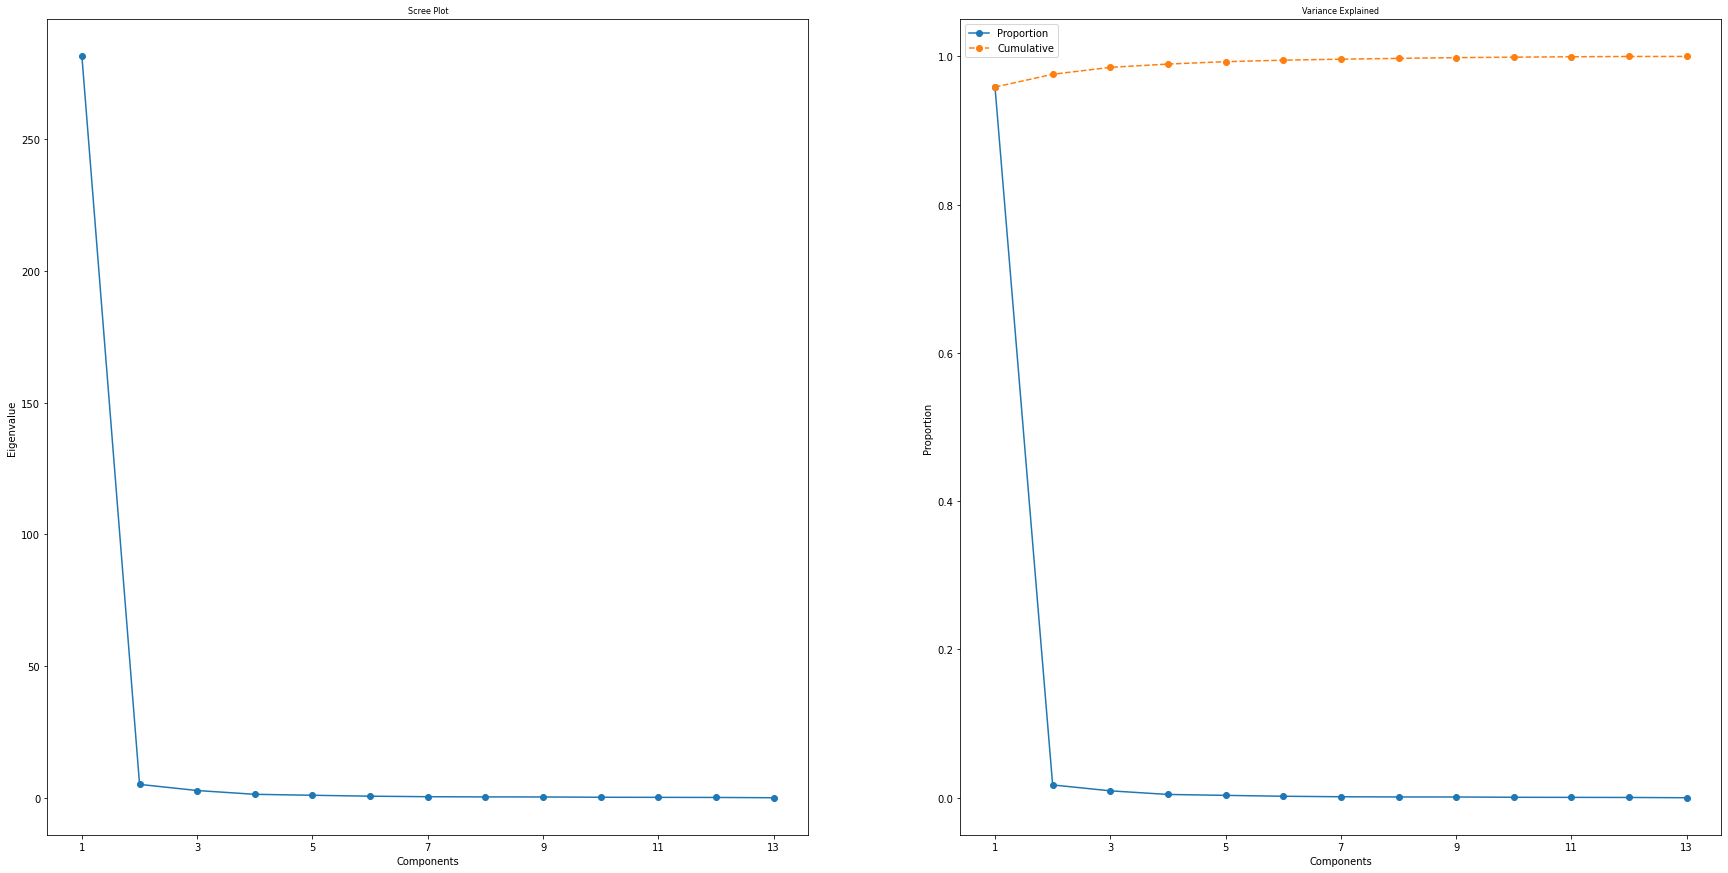

In [35]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=8)
ax2.set_title("Variance Explained", fontsize=8)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [36]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=5)
pca_feat1 = pca.fit_transform(cluster_socio_demographic)
pca_feat_names1 = [f"PC{i}" for i in range(pca.n_components_)]
pca_df1 = pd.DataFrame(pca_feat1, index=df_pca1.index, columns=pca_feat_names1)  # remember index=df_pca.index
pca_df1

PC0       PC1       PC2       PC3       PC4
CONTROLN                                                  
95515    -5.946582 -0.779826  0.223541  0.424163  0.118592
15078    -6.016157 -1.094469  0.460079  0.339032  0.328341
172556    4.184457 -0.865349  0.927816  1.234154  0.047792
47784    -4.822732  0.256260  0.492564 -0.349497 -0.380005
62117    -6.069739 -1.496357  0.228579  0.000351  0.141098
...            ...       ...       ...       ...       ...
184568   -5.659847  1.851603  0.988786 -0.790512 -0.855808
122706    0.343231  7.465888  2.297369  3.419635 -1.425189
189641   -6.022242 -1.112348  0.301034  0.034314 -0.057468
4693      5.162515  5.508307 -7.823867 -0.866336  1.044326
185114   -4.772722  0.720183  0.433038 -0.345259 -0.947866

[89778 rows x 5 columns]

In [37]:
# Reassigning df to contain pca variables

df_pca1 = pd.concat([df_pca1, pca_df1], axis=1)
df_pca1.head()

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515           0         0      0.0       3  0.000000     -1     -1   
15078           0         0      0.0       3  0.666667     -1     -1   
172556          0         0      0.0       1  0.666667     -1     -1   
47784           0         0      0.0       4  0.000000     -1     -1   
62117           0         0      1.0       4  0.000000     -1     -1   

          COLLECT1  VETERANS  BIBLE  ...  MSA_4480.0  MSA_Other  DMA_803.0  \
CONTROLN                             ...                                     
95515            0         0      0  ...         0.0        0.0        0.0   
15078            0         0      0  ...         0.0        0.0        0.0   
172556           0         0      0  ...         0.0        1.0        0.0   
47784            0         0      0  ...         0.0        1.0        0.0   
62117            0         0      0  ...         0.0        0.0        0.0   

          DMA_807.0  DMA_Other       PC0       PC1       PC2       PC3  \
CONTROLN                                                                 
95515           0.0        1.0 -5.946582 -0.779826  0.223541  0.424163   
15078           0.0        1.0 -6.016157 -1.094469  0.460079  0.339032   
172556          0.0        1.0  4.184457 -0.865349  0.927816  1.234154   
47784           0.0        1.0 -4.822732  0.256260  0.492564 -0.349497   
62117           0.0        1.0 -6.069739 -1.496357  0.228579  0.000351   

               PC4  
CONTROLN            
95515     0.118592  
15078     0.328341  
172556    0.047792  
47784    -0.380005  
62117     0.141098  

[5 rows x 161 columns]

In [38]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca1[socio_demo_metricfeatures + pca_feat_names1].corr().loc[socio_demo_metricfeatures, pca_feat_names1]
loadings.style.applymap(_color_red_or_green)

In [39]:
variables_to_keep=['HVP1', 'HVP2','HVP6', 'IC3','IC5','IC6','IC7','IC11','IC12','IC13','IC14']

In [40]:
#socio_demo_metricfeatures=['IC3','IC5','IC6','IC7','IC11','IC12','IC13','IC14','HVP1','HVP2','HVP6']

behav_metricfeatures = ['HIT','RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT'] 
#military_metricfeatures=['AFC1','AFC4'] #VETERANS not metric to interpret


#cluster_military = donors[military_metricfeatures]
#cluster_socio_demographic=donors[socio_demo_metricfeatures]
cluster_behaviour=donors[behav_metricfeatures]

In [41]:
socio_demo_metricfeatures=['IC3','IC5','IC6','IC7','IC11','IC12','IC13','IC14','HVP2','HVP6']
cluster_socio_demographic=donors[socio_demo_metricfeatures]

# SOM

In [42]:
from IPython.display import YouTubeVideo

from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm_socio = sompy.SOMFactory().build(
    cluster_socio_demographic.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=socio_demo_metricfeatures
)
sm_socio.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.008000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  1.258000, quantization error: 10.964723

 epoch: 2 ---> elapsed time:  0.637000, quantization error: 2.599205

 epoch: 3 ---> elapsed time:  0.590000, quantization error: 2.372414

 epoch: 4 ---> elapsed time:  7.286000, quantization error: 2.364082

 epoch: 5 ---> elapsed time:  5.567000, quantization error: 2.359799

 epoch: 6 ---> elapsed time:  0.920000, quantization error: 2.355243

 epoch: 7 ---> elapsed time:  0.519000, quantization error: 2.350834

 epoch: 8 ---> elapsed time:  6.198000, quantization error: 2.346654

 epoch: 9 ---> elapsed time:  0.526000, quantization error: 2.342577

 epoch: 10 ---> elapsed time:  6.993000, quantization error: 2.338452

 epoch: 11 ---> elapsed time:  0.526000, quantization error: 2.334260

 epoch: 12 ---> elapsed time:  0.554000, quantization error: 2.329908

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  14.469000, quantization error: 1.218018

 epoch: 15 ---> elapsed time:  12.498000, quantization error: 1.217965

 epoch: 16 ---> elapsed time:  3.504000, quantization error: 1.217925

 epoch: 17 ---> elapsed time:  7.817000, quantization error: 1.217902

 epoch: 18 ---> elapsed time:  11.031000, quantization error: 1.217879

 epoch: 19 ---> elapsed time:  1.202000, quantization error: 1.217868

 epoch: 20 ---> elapsed time:  0.549000, quantization error: 1.217836

 epoch: 21 ---> elapsed time:  3.756000, quantization error: 1.217805

 epoch: 22 ---> elapsed time:  10.105000, quantization error: 1.217766

 epoch: 23 ---> elapsed time:  12.608000, quantization error: 1.217755

 epoch: 24 ---> elapsed time:  0.747000, quantization error: 1.217736

 epoch: 25 ---> elapsed time:  0.551000, quantization error: 1.217716

 epoch: 26 ---> elapsed time:  12.916000, quantization error: 1.217699

 epoch: 27 ---> elapsed time:  1.719000, quantization error: 1.217694



In [43]:
#We will drop HVP1,in HVP6 there is an outlier vor values higher than max (it is ok), in ANC1 we seem to have an outlier for values higher than max, 
#In ANC1 we will be remove because is not a discricionary variable
#ANC 9,10, 11, 12 and 15 will be removed because they are not very discricionary and regarding ANC15 it is very correlated with ANC5
#Regarding ETH we will drop 7,8,9,10,11,12 and we will keep ETH4 because is importan as includesall asians.
#Regarding the ETH we will keep ETH1  comparing with ETH2 because they are the inverse of the other and the former is more discricionary
#Regarding OEDC we will remove 3 because is not discricionary enough
#Regarding IC we will remove 3 and 5 because they are biased by number of people/household
#We will drop VOC3 because it is highly correlated with VOC2 and already included in VOC2

<ipython-input-44-0526ff77cb27>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-44-0526ff77cb27>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


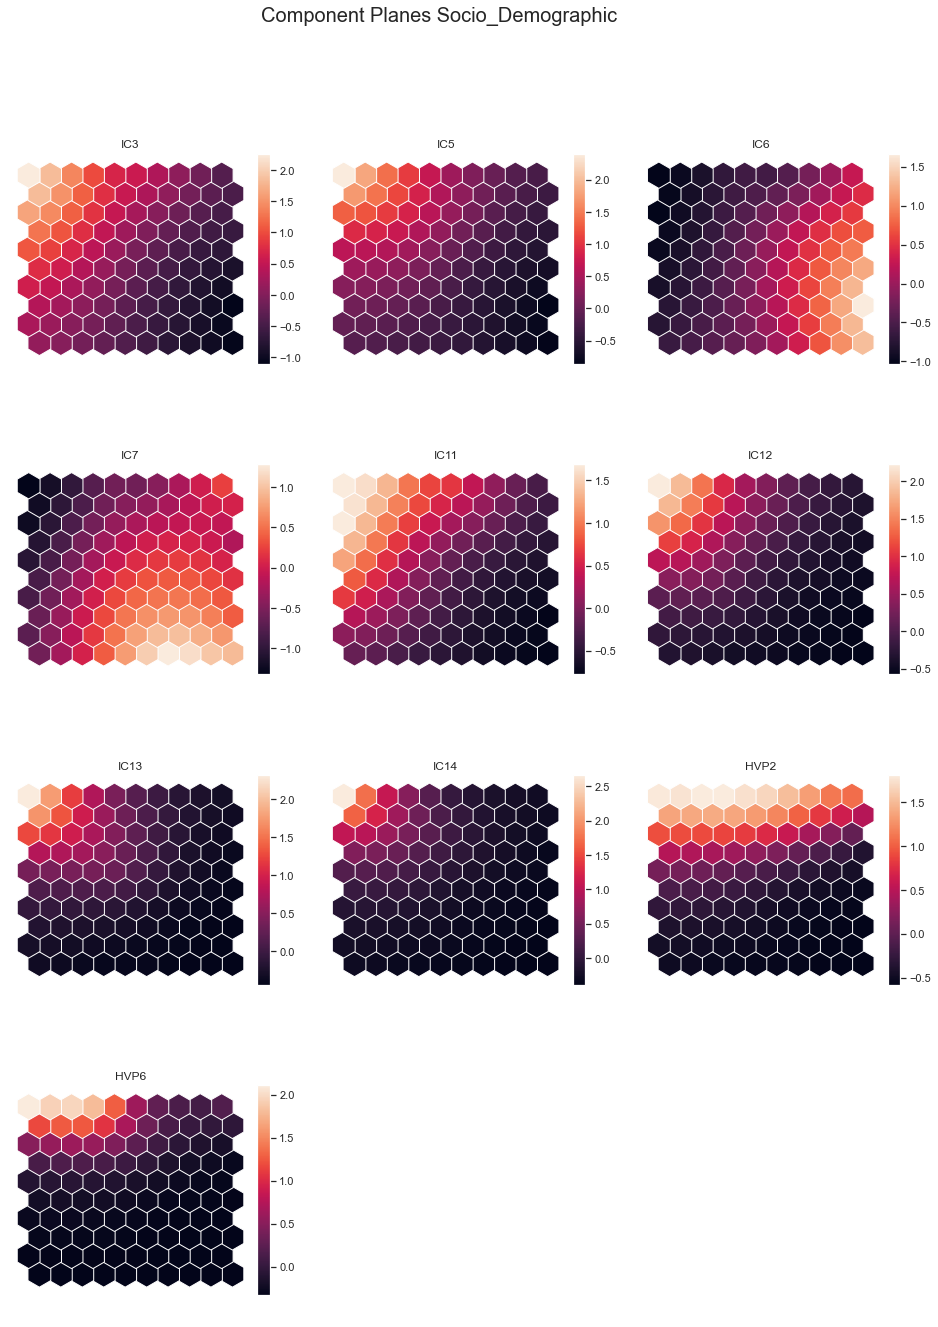

In [44]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm_socio, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes Socio_Demographic", fontsize=20)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)
 
#in POP901 we seem to have an outlier although no so dramatic for values higher than 2. We should keep ETH1 COMPARING WITH ETH2 because the former has more colours so more diverse numbers, 
#ETH3 we have an outlier so we should remove values higher than 1,4. 
#Regarding ETH4 AND ETH8, ETH9, we will keep ETH4 because they are very similar and this one includes the others.

**Interpret!** All look goo considering that some of the variables represent high values which naturally a small number of donors belong to.

C:\Users\marta\anaconda3\lib\site-packages\sompy\visualization\umatrix.py:98: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-45-389d39f94ed0>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-45-389d39f94ed0>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


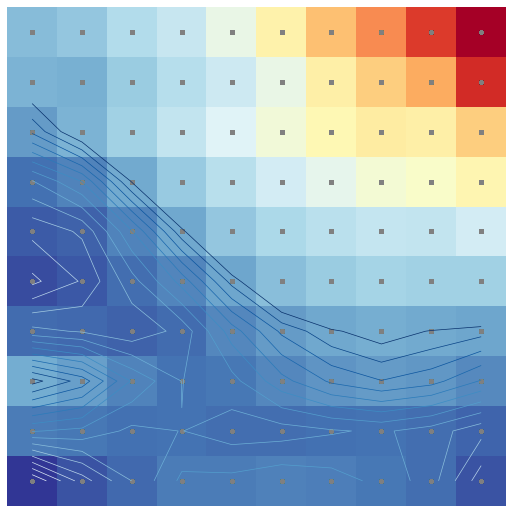

array([[0.39940503, 0.42199948, 0.46831599, 0.50121312, 0.56922817,
        0.66189703, 0.76619537, 0.84345788, 0.95226117, 1.05444634],
       [0.38389841, 0.37580778, 0.43224196, 0.47266504, 0.51164192,
        0.56907596, 0.66976274, 0.7426429 , 0.79857249, 0.97682923],
       [0.34515134, 0.38282241, 0.43926727, 0.49372442, 0.54241436,
        0.58865497, 0.64326362, 0.67667546, 0.66932727, 0.74275805],
       [0.2816009 , 0.30686889, 0.36802415, 0.42823973, 0.47848757,
        0.52080759, 0.55927326, 0.59411617, 0.61232664, 0.65183757],
       [0.24972681, 0.26051811, 0.30573567, 0.36303322, 0.41960945,
        0.4577375 , 0.48161532, 0.49887775, 0.49560301, 0.51939822],
       [0.23140386, 0.24772911, 0.27769138, 0.31125359, 0.35909053,
        0.40242303, 0.43006909, 0.44629655, 0.44223286, 0.43970354],
       [0.27418898, 0.269133  , 0.26157304, 0.27466015, 0.31245709,
        0.34528261, 0.364616  , 0.37538288, 0.36585701, 0.3595619 ],
       [0.37163685, 0.34976127, 0.3053838

In [45]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_socio, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, # Visualize isomorphic curves
    blob=False
)

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)


UMAT[1]  # U-matrix values - no colorscale so we have to rely on the values :(

### Hit-map
Show the **frequency** of each Unit in the output map

<ipython-input-46-508a56562ef1>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-46-508a56562ef1>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


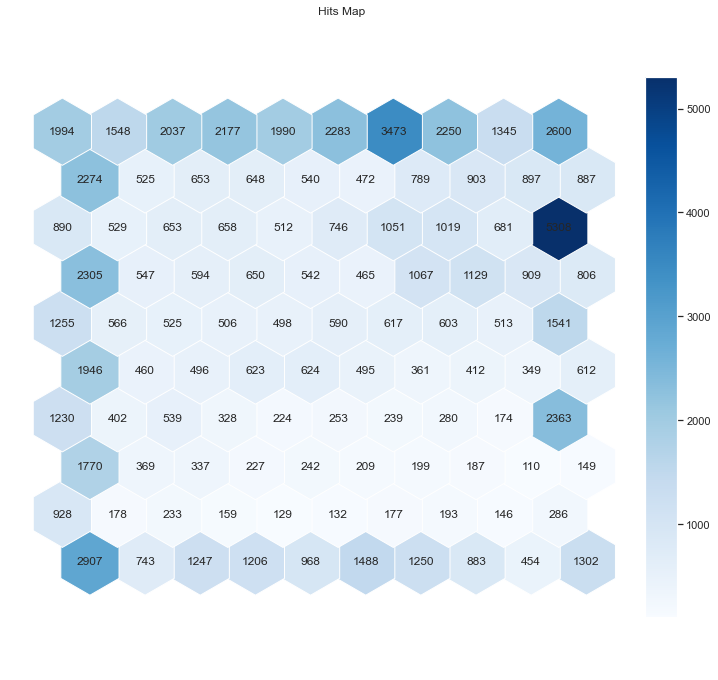

In [46]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm_socio, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

<ipython-input-47-5a4d5d33eaa5>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-47-5a4d5d33eaa5>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


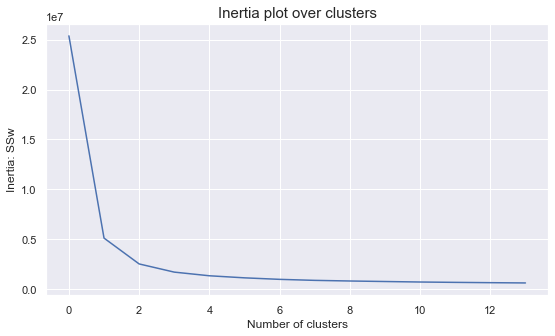

In [47]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 15)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_socio_demographic)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

<ipython-input-48-769161a439b0>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-48-769161a439b0>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


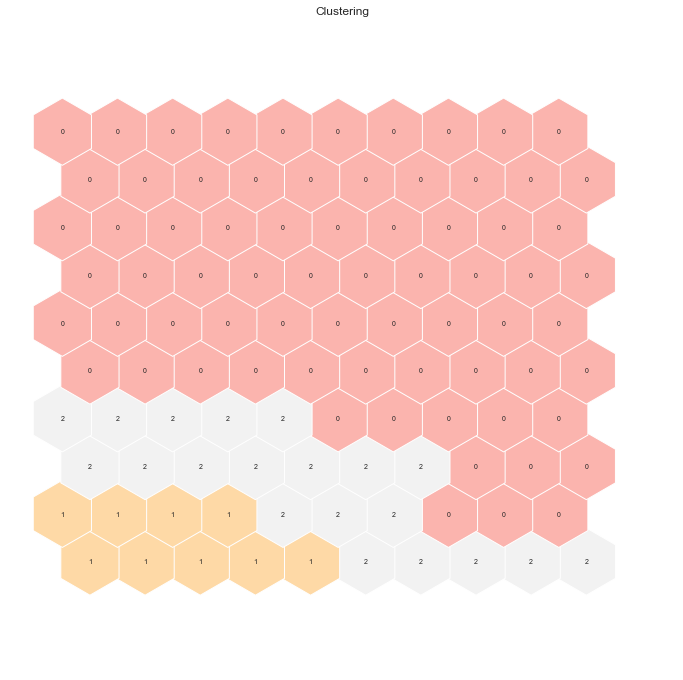

In [48]:
# Perform K-Means clustering on top of the 2500 untis (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm_socio.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_socio, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [49]:
# Check the nodes and and respective clusters
nodes = sm_socio.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=socio_demo_metricfeatures)
df_nodes['label'] = nodeclus_labels
df_nodes

IC3       IC5       IC6       IC7      IC11      IC12      IC13  \
0  -0.114459 -0.007196  0.337476  0.103113 -0.034807  0.074903  0.364450   
1   0.057823  0.108150  0.154224 -0.076622  0.123894  0.164677  0.466696   
2   0.248749  0.257004 -0.024151 -0.251578  0.315220  0.303167  0.629142   
3   0.447506  0.451720 -0.172243 -0.413745  0.538097  0.489654  0.869938   
4   0.626240  0.688515 -0.260598 -0.522401  0.752241  0.744230  1.186457   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.137888 -0.119575  0.021060  0.496868 -0.180586 -0.096292  0.193848   
96 -0.021527 -0.053811 -0.087816  0.217146 -0.107653 -0.068248  0.200994   
97  0.087632  0.010179 -0.165566 -0.046909 -0.021234 -0.029841  0.226369   
98  0.195693  0.077949 -0.237821 -0.287360  0.066943  0.018070  0.263155   
99  0.285871  0.122066 -0.305122 -0.512470  0.118962  0.043003  0.301697   

        IC14      HVP2       HVP6  label  
0   0.363085  2.032653   8.767769      2  
1   0.426607  2.102164   7.285531      2  
2   0.520600  2.358699   8.055701      2  
3   0.663704  2.583360  10.389565      2  
4   0.917657  2.771693  15.892681      2  
..       ...       ...        ...    ...  
95  0.217917  0.024151   0.288408      0  
96  0.243062  0.028276   0.277774      0  
97  0.264590  0.041585   0.285269      0  
98  0.293708  0.061922   0.301409      0  
99  0.310608  0.074493   0.307342      0  

[100 rows x 11 columns]

In [50]:
df_nodes.groupby('label').count()

IC3  IC5  IC6  IC7  IC11  IC12  IC13  IC14  HVP2  HVP6
label                                                        
0       71   71   71   71    71    71    71    71    71    71
1        9    9    9    9     9     9     9     9     9     9
2       20   20   20   20    20    20    20    20    20    20

In [51]:
# Obtaining SOM's BMUs labels
bmus_map = sm_socio.find_bmu(cluster_socio_demographic)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((donors, np.expand_dims(bmus_map,1)), axis=1),
    index=donors.index, columns=np.append(donors.columns,"BMU")
)
df_bmus

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515         0.0       0.0      0.0     3.0  0.000000   -1.0   -1.0   
15078         0.0       0.0      0.0     3.0  0.666667   -1.0   -1.0   
172556        0.0       0.0      0.0     1.0  0.666667   -1.0   -1.0   
47784         0.0       0.0      0.0     4.0  0.000000   -1.0   -1.0   
62117         0.0       0.0      1.0     4.0  0.000000   -1.0   -1.0   
...           ...       ...      ...     ...       ...    ...    ...   
184568        0.0       0.0      0.0     6.0  0.000000   -1.0   -1.0   
122706        0.0       0.0      1.0     7.0  0.333333   -1.0   -1.0   
189641        0.0       0.0      0.0     4.0  0.000000   12.0   -1.0   
4693          0.0       0.0      0.0     7.0  0.000000   -1.0   12.0   
185114        1.0       0.0      0.0     5.0  1.000000   -1.0   12.0   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_2  \
CONTROLN                             ...                       
95515          0.0       0.0    0.0  ...                 0.0   
15078          0.0       0.0    0.0  ...                 0.0   
172556         0.0       0.0    0.0  ...                 0.0   
47784          0.0       0.0    0.0  ...                 0.0   
62117          0.0       0.0    0.0  ...                 0.0   
...            ...       ...    ...  ...                 ...   
184568         0.0       0.0    0.0  ...                 0.0   
122706         0.0       0.0    0.0  ...                 0.0   
189641         0.0       0.0    0.0  ...                 0.0   
4693           0.0       0.0    0.0  ...                 0.0   
185114         0.0       0.0    0.0  ...                 0.0   

          urbanicity_level_3  urbanicity_level_4  MSA_1600.0  MSA_4480.0  \
CONTROLN                                                                   
95515                    1.0                 0.0         0.0         0.0   
15078                    0.0                 1.0         0.0         0.0   
172556                   0.0                 1.0         0.0         0.0   
47784                    1.0                 0.0         0.0         0.0   
62117                    1.0                 0.0         0.0         0.0   
...                      ...                 ...         ...         ...   
184568                   0.0                 0.0         0.0         0.0   
122706                   0.0                 0.0         0.0         0.0   
189641                   0.0                 0.0         0.0         0.0   
4693                     0.0                 0.0         0.0         0.0   
185114                   0.0                 0.0         0.0         0.0   

          MSA_Other  DMA_803.0  DMA_807.0  DMA_Other   BMU  
CONTROLN                                                    
95515           0.0        0.0        0.0        1.0  44.0  
15078           0.0        0.0        0.0        1.0  32.0  
172556          1.0        0.0        0.0        1.0   6.0  
47784           1.0        0.0        0.0        1.0  25.0  
62117           0.0        0.0        0.0        1.0  94.0  
...             ...        ...        ...        ...   ...  
184568          1.0        0.0        0.0        1.0  38.0  
122706          1.0        0.0        0.0        1.0   9.0  
189641          1.0        0.0        0.0        1.0  55.0  
4693            1.0        1.0        0.0        0.0   7.0  
185114          1.0        0.0        0.0        1.0  26.0  

[89778 rows x 157 columns]

In [52]:
bmus_map = sm_socio.find_bmu(cluster_socio_demographic)[0]  # get bmus for each observation in df

In [53]:
# Get cluster labels for each observation
df_final_socio = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final_socio

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515         0.0       0.0      0.0     3.0  0.000000   -1.0   -1.0   
15078         0.0       0.0      0.0     3.0  0.666667   -1.0   -1.0   
172556        0.0       0.0      0.0     1.0  0.666667   -1.0   -1.0   
47784         0.0       0.0      0.0     4.0  0.000000   -1.0   -1.0   
62117         0.0       0.0      1.0     4.0  0.000000   -1.0   -1.0   
...           ...       ...      ...     ...       ...    ...    ...   
184568        0.0       0.0      0.0     6.0  0.000000   -1.0   -1.0   
122706        0.0       0.0      1.0     7.0  0.333333   -1.0   -1.0   
189641        0.0       0.0      0.0     4.0  0.000000   12.0   -1.0   
4693          0.0       0.0      0.0     7.0  0.000000   -1.0   12.0   
185114        1.0       0.0      0.0     5.0  1.000000   -1.0   12.0   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_3  \
CONTROLN                             ...                       
95515          0.0       0.0    0.0  ...                 1.0   
15078          0.0       0.0    0.0  ...                 0.0   
172556         0.0       0.0    0.0  ...                 0.0   
47784          0.0       0.0    0.0  ...                 1.0   
62117          0.0       0.0    0.0  ...                 1.0   
...            ...       ...    ...  ...                 ...   
184568         0.0       0.0    0.0  ...                 0.0   
122706         0.0       0.0    0.0  ...                 0.0   
189641         0.0       0.0    0.0  ...                 0.0   
4693           0.0       0.0    0.0  ...                 0.0   
185114         0.0       0.0    0.0  ...                 0.0   

          urbanicity_level_4  MSA_1600.0  MSA_4480.0  MSA_Other  DMA_803.0  \
CONTROLN                                                                     
95515                    0.0         0.0         0.0        0.0        0.0   
15078                    1.0         0.0         0.0        0.0        0.0   
172556                   1.0         0.0         0.0        1.0        0.0   
47784                    0.0         0.0         0.0        1.0        0.0   
62117                    0.0         0.0         0.0        0.0        0.0   
...                      ...         ...         ...        ...        ...   
184568                   0.0         0.0         0.0        1.0        0.0   
122706                   0.0         0.0         0.0        1.0        0.0   
189641                   0.0         0.0         0.0        1.0        0.0   
4693                     0.0         0.0         0.0        1.0        1.0   
185114                   0.0         0.0         0.0        1.0        0.0   

          DMA_807.0  DMA_Other   BMU  label  
CONTROLN                                     
95515           0.0        1.0  44.0      0  
15078           0.0        1.0  32.0      0  
172556          0.0        1.0   6.0      1  
47784           0.0        1.0  25.0      2  
62117           0.0        1.0  94.0      0  
...             ...        ...   ...    ...  
184568          0.0        1.0  38.0      2  
122706          0.0        1.0   9.0      1  
189641          0.0        1.0  55.0      0  
4693            0.0        0.0   7.0      1  
185114          0.0        1.0  26.0      2  

[89778 rows x 158 columns]

In [54]:
df_final_socio_nolabels=df_final_socio.iloc[:,:-2]

In [55]:
socio_labels=df_final_socio.iloc[:,-2:]

In [56]:
from scipy.stats import iqr

iqr_1=iqr(donors_withoutscaler.values, axis=0)
median_1=np.median(donors_withoutscaler.values, axis=0)

In [57]:
df_kmeans_socio_no_labels=(df_final_socio_nolabels*iqr_1)+median_1

In [58]:
df_kmeans_socio_no_labels

RECPGVG  RECSWEEP  NUMCHLD  INCOME  HIT  SOLP3  SOLIH  COLLECT1  \
CONTROLN                                                                    
95515         0.0       0.0      0.0    13.0  0.0   -1.0   -1.0       0.0   
15078         0.0       0.0      0.0    13.0  2.0   -1.0   -1.0       0.0   
172556        0.0       0.0      0.0     7.0  2.0   -1.0   -1.0       0.0   
47784         0.0       0.0      0.0    16.0  0.0   -1.0   -1.0       0.0   
62117         0.0       0.0      0.0    16.0  0.0   -1.0   -1.0       0.0   
...           ...       ...      ...     ...  ...    ...    ...       ...   
184568        0.0       0.0      0.0    22.0  0.0   -1.0   -1.0       0.0   
122706        0.0       0.0      0.0    25.0  1.0   -1.0   -1.0       0.0   
189641        0.0       0.0      0.0    16.0  0.0   -1.0   -1.0       0.0   
4693          0.0       0.0      0.0    25.0  0.0   -1.0   -1.0       0.0   
185114        0.0       0.0      0.0    19.0  3.0   -1.0   -1.0       0.0   

          VETERANS  BIBLE  ...  urbanicity_level_1  urbanicity_level_2  \
CONTROLN                   ...                                           
95515          0.0    0.0  ...                 0.0                 0.0   
15078          0.0    0.0  ...                 0.0                 0.0   
172556         0.0    0.0  ...                 0.0                 0.0   
47784          0.0    0.0  ...                 0.0                 0.0   
62117          0.0    0.0  ...                 0.0                 0.0   
...            ...    ...  ...                 ...                 ...   
184568         0.0    0.0  ...                 0.0                 0.0   
122706         0.0    0.0  ...                 0.0                 0.0   
189641         0.0    0.0  ...                 0.0                 0.0   
4693           0.0    0.0  ...                 0.0                 0.0   
185114         0.0    0.0  ...                 0.0                 0.0   

          urbanicity_level_3  urbanicity_level_4  MSA_1600.0  MSA_4480.0  \
CONTROLN                                                                   
95515                    0.0                 0.0         0.0         0.0   
15078                    0.0                 0.0         0.0         0.0   
172556                   0.0                 0.0         0.0         0.0   
47784                    0.0                 0.0         0.0         0.0   
62117                    0.0                 0.0         0.0         0.0   
...                      ...                 ...         ...         ...   
184568                   0.0                 0.0         0.0         0.0   
122706                   0.0                 0.0         0.0         0.0   
189641                   0.0                 0.0         0.0         0.0   
4693                     0.0                 0.0         0.0         0.0   
185114                   0.0                 0.0         0.0         0.0   

          MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  
CONTROLN                                              
95515           1.0        0.0        0.0        1.0  
15078           1.0        0.0        0.0        1.0  
172556          2.0        0.0        0.0        1.0  
47784           2.0        0.0        0.0        1.0  
62117           1.0        0.0        0.0        1.0  
...             ...        ...        ...        ...  
184568          2.0        0.0        0.0        1.0  
122706          2.0        0.0        0.0        1.0  
189641          2.0        0.0        0.0        1.0  
4693            2.0        0.0        0.0        1.0  
185114          2.0        0.0        0.0        1.0  

[89778 rows x 156 columns]

In [59]:
df_final_socio_notransf=pd.concat([df_kmeans_socio_no_labels, socio_labels], axis=1)

In [60]:
df_final_socio_notransf

RECPGVG  RECSWEEP  NUMCHLD  INCOME  HIT  SOLP3  SOLIH  COLLECT1  \
CONTROLN                                                                    
95515         0.0       0.0      0.0    13.0  0.0   -1.0   -1.0       0.0   
15078         0.0       0.0      0.0    13.0  2.0   -1.0   -1.0       0.0   
172556        0.0       0.0      0.0     7.0  2.0   -1.0   -1.0       0.0   
47784         0.0       0.0      0.0    16.0  0.0   -1.0   -1.0       0.0   
62117         0.0       0.0      0.0    16.0  0.0   -1.0   -1.0       0.0   
...           ...       ...      ...     ...  ...    ...    ...       ...   
184568        0.0       0.0      0.0    22.0  0.0   -1.0   -1.0       0.0   
122706        0.0       0.0      0.0    25.0  1.0   -1.0   -1.0       0.0   
189641        0.0       0.0      0.0    16.0  0.0   -1.0   -1.0       0.0   
4693          0.0       0.0      0.0    25.0  0.0   -1.0   -1.0       0.0   
185114        0.0       0.0      0.0    19.0  3.0   -1.0   -1.0       0.0   

          VETERANS  BIBLE  ...  urbanicity_level_3  urbanicity_level_4  \
CONTROLN                   ...                                           
95515          0.0    0.0  ...                 0.0                 0.0   
15078          0.0    0.0  ...                 0.0                 0.0   
172556         0.0    0.0  ...                 0.0                 0.0   
47784          0.0    0.0  ...                 0.0                 0.0   
62117          0.0    0.0  ...                 0.0                 0.0   
...            ...    ...  ...                 ...                 ...   
184568         0.0    0.0  ...                 0.0                 0.0   
122706         0.0    0.0  ...                 0.0                 0.0   
189641         0.0    0.0  ...                 0.0                 0.0   
4693           0.0    0.0  ...                 0.0                 0.0   
185114         0.0    0.0  ...                 0.0                 0.0   

          MSA_1600.0  MSA_4480.0  MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  \
CONTROLN                                                                       
95515            0.0         0.0        1.0        0.0        0.0        1.0   
15078            0.0         0.0        1.0        0.0        0.0        1.0   
172556           0.0         0.0        2.0        0.0        0.0        1.0   
47784            0.0         0.0        2.0        0.0        0.0        1.0   
62117            0.0         0.0        1.0        0.0        0.0        1.0   
...              ...         ...        ...        ...        ...        ...   
184568           0.0         0.0        2.0        0.0        0.0        1.0   
122706           0.0         0.0        2.0        0.0        0.0        1.0   
189641           0.0         0.0        2.0        0.0        0.0        1.0   
4693             0.0         0.0        2.0        0.0        0.0        1.0   
185114           0.0         0.0        2.0        0.0        0.0        1.0   

           BMU  label  
CONTROLN               
95515     44.0      0  
15078     32.0      0  
172556     6.0      1  
47784     25.0      2  
62117     94.0      0  
...        ...    ...  
184568    38.0      2  
122706     9.0      1  
189641    55.0      0  
4693       7.0      1  
185114    26.0      2  

[89778 rows x 158 columns]

In [61]:
df_final_socio_notransf.groupby(['label'])\
    [metric_features].mean()[socio_demo_metricfeatures]



IC3           IC5        IC6        IC7       IC11      IC12  \
label                                                                        
0      303.231305  11686.326258  27.898952  20.348536   2.701083  0.700460   
1      545.544711  23410.048643  12.232686  11.555595  11.104704  5.272178   
2      425.630223  16576.434182  15.610368  14.983475   6.844046  2.248633   

           IC13      IC14       HVP2       HVP6  
label                                            
0      0.164882  0.331399   1.887969   0.066404  
1      2.443694  4.903114  64.325530  22.145129  
2      0.945272  1.340371  17.340308   0.550047

In [62]:
socio_kmeans_label=socio_labels.loc[:,'label']

In [63]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final_socio[socio_demo_metricfeatures])  # get total sum of squares
ssw_labels = df_final_socio[socio_demo_metricfeatures + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_socio = ssb / sst
r2_socio

0.3371946577759261

In [64]:
#using davies bouldin index

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(cluster_socio_demographic, socio_kmeans_label)

1.5573938864969532

In [65]:
davies_bouldin_socio=davies_bouldin_score(cluster_socio_demographic, socio_kmeans_label)

In [66]:
#using calinski_harabasz
from sklearn import metrics

metrics.calinski_harabasz_score(cluster_socio_demographic, socio_kmeans_label)

22836.003629800627

In [67]:
calinski_harabasz_socio=metrics.calinski_harabasz_score(cluster_socio_demographic, socio_kmeans_label)

# SOM with behavior perspective

In [68]:
from IPython.display import YouTubeVideo

from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm_behav = sompy.SOMFactory().build(
    cluster_behaviour.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=behav_metricfeatures
)
sm_behav.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  4.167000, quantization error: 59.596763

 epoch: 2 ---> elapsed time:  0.703000, quantization error: 2.056659

 epoch: 3 ---> elapsed time:  0.543000, quantization error: 1.979512

 epoch: 4 ---> elapsed time:  0.443000, quantization error: 1.942365

 epoch: 5 ---> elapsed time:  0.472000, quantization error: 1.895414

 epoch: 6 ---> elapsed time:  11.616000, quantization error: 1.889820

 epoch: 7 ---> elapsed time:  0.599000, quantization error: 1.886594

 epoch: 8 ---> elapsed time:  9.974000, quantization error: 1.883365

 epoch: 9 ---> elapsed time:  16.135000, quantization error: 1.880039

 epoch: 10 ---> elapsed time:  0.668000, quantization error: 1.876624

 epoch: 11 ---> elapsed time:  9.967000, quantization error: 1.873097

 epoch: 12 ---> elapsed time:  7.465000, quantization error: 1.869421

 epoch: 13 --

 epoch: 14 ---> elapsed time:  0.837000, quantization error: 0.943607

 epoch: 15 ---> elapsed time:  0.499000, quantization error: 0.943591

 epoch: 16 ---> elapsed time:  4.783000, quantization error: 0.943582

 epoch: 17 ---> elapsed time:  7.249000, quantization error: 0.943570

 epoch: 18 ---> elapsed time:  10.100000, quantization error: 0.943542

 epoch: 19 ---> elapsed time:  10.925000, quantization error: 0.943515

 epoch: 20 ---> elapsed time:  10.621000, quantization error: 0.943495

 epoch: 21 ---> elapsed time:  11.741000, quantization error: 0.943498

 epoch: 22 ---> elapsed time:  1.165000, quantization error: 0.943487

 epoch: 23 ---> elapsed time:  7.484000, quantization error: 0.943487

 epoch: 24 ---> elapsed time:  11.047000, quantization error: 0.943488

 epoch: 25 ---> elapsed time:  1.393000, quantization error: 0.943486

 epoch: 26 ---> elapsed time:  5.776000, quantization error: 0.943490

 epoch: 27 ---> elapsed time:  0.441000, quantization error: 0.943490

 

<ipython-input-69-98c503d088f2>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-69-98c503d088f2>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


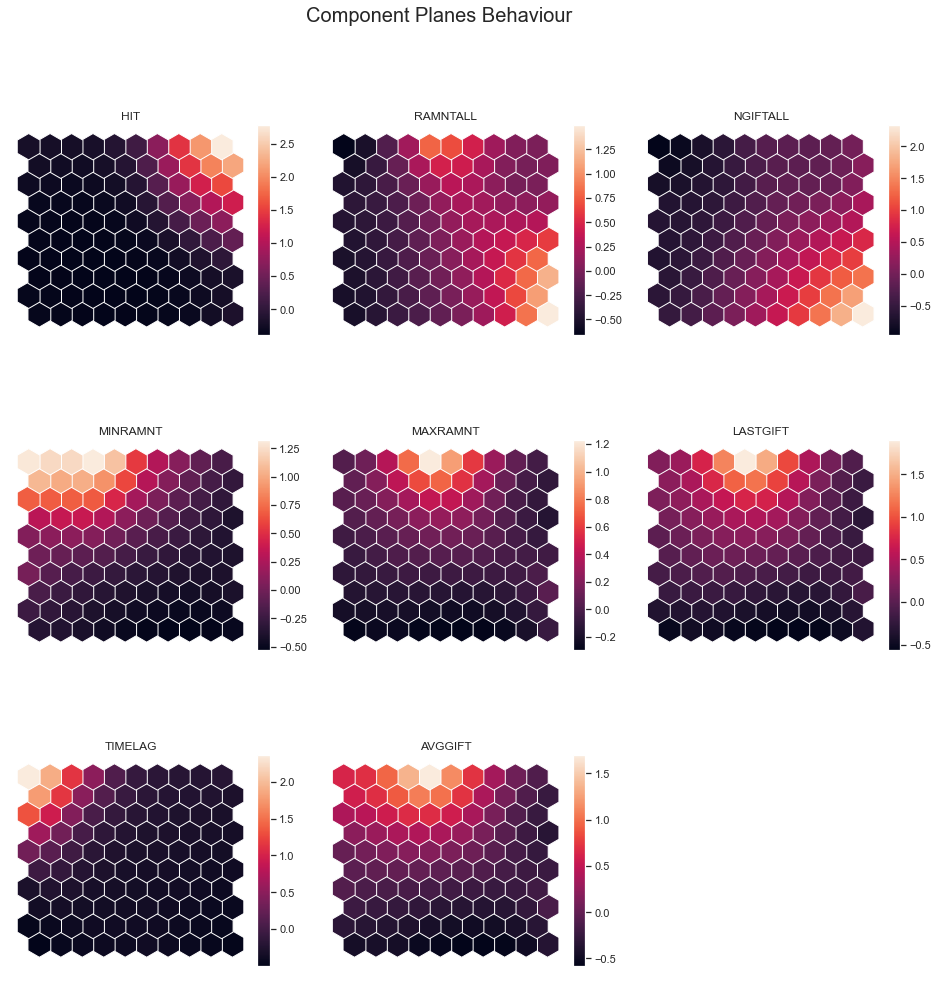

In [69]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm_behav, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes Behaviour", fontsize=20)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

**Interpret!** Pay attention to MAXRAMNT, AVGGIFT, LASTGIFT for outliers

C:\Users\marta\anaconda3\lib\site-packages\sompy\visualization\umatrix.py:98: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-70-0496c9ee827e>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-70-0496c9ee827e>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


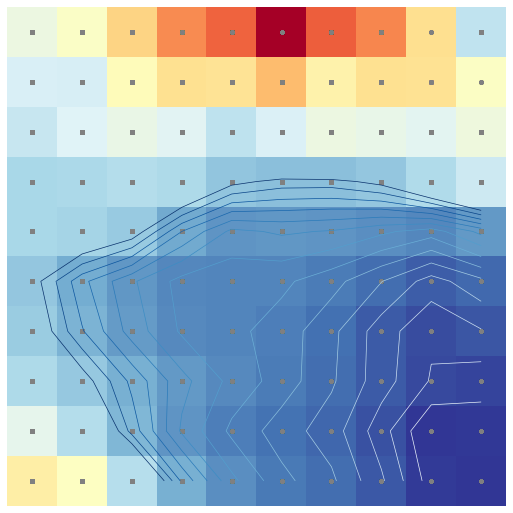

array([[0.46045486, 0.49333066, 0.5910771 , 0.68388076, 0.72715936,
        0.85823082, 0.731223  , 0.68907534, 0.5755559 , 0.39311261],
       [0.4244407 , 0.42347952, 0.50972175, 0.57308793, 0.5677433 ,
        0.62474598, 0.53349874, 0.57138495, 0.56959218, 0.49776691],
       [0.40124759, 0.43398803, 0.45547925, 0.43997012, 0.38856258,
        0.42675707, 0.45999583, 0.45192916, 0.44111143, 0.46815564],
       [0.36086311, 0.36567325, 0.37593081, 0.36801677, 0.3326126 ,
        0.32208734, 0.32179228, 0.33295072, 0.3687708 , 0.40873282],
       [0.36172367, 0.35576575, 0.33847986, 0.28939184, 0.26096133,
        0.26596755, 0.2630537 , 0.25421494, 0.24493248, 0.26799729],
       [0.33460119, 0.29298711, 0.26596048, 0.24680813, 0.24308298,
        0.24151263, 0.23092686, 0.21381337, 0.19514868, 0.20990832],
       [0.34315671, 0.3032207 , 0.27105619, 0.24956074, 0.24214612,
        0.2331516 , 0.21678275, 0.19425933, 0.17771598, 0.18709432],
       [0.36667384, 0.335545  , 0.2985382

In [70]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_behav, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, # Visualize isomorphic curves
    blob=False
)

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

UMAT[1]  # U-matrix values - no colorscale so we have to rely on the values :(

### Hit-map
Show the **frequency** of each Unit in the output map

<ipython-input-71-f7f105a893d5>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-71-f7f105a893d5>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


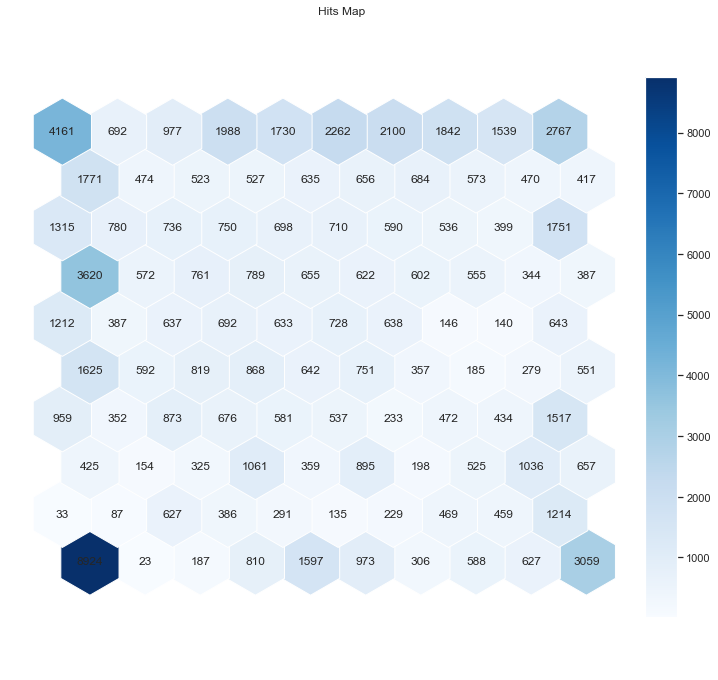

In [71]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm_behav, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

<ipython-input-72-bc574a0cb5e7>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-72-bc574a0cb5e7>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


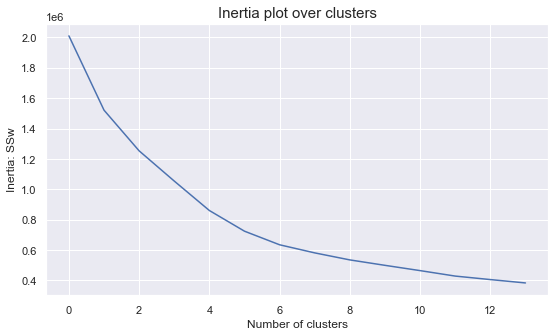

In [72]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 15)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_behaviour)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

<ipython-input-73-9bc6b9b9c4e5>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-73-9bc6b9b9c4e5>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


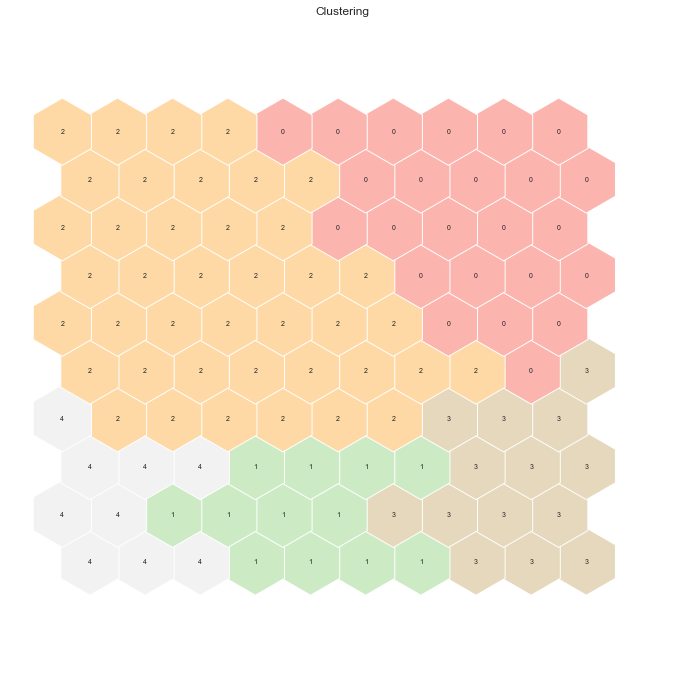

In [73]:
# Perform K-Means clustering on top of the 2500 untis (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm_behav.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_behav, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [74]:
# Check the nodes and and respective clusters
nodes = sm_behav.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=behav_metricfeatures)
df_nodes['label'] = nodeclus_labels
df_nodes

HIT  RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
0   5.911588  0.300505  0.260626  0.187102  0.246668  0.144773  0.257219   
1   4.705186  0.338740  0.157684  0.323024  0.602893  0.413117  0.247615   
2   3.475868  0.528223  0.106199  0.527114  1.221081  0.833800  0.261479   
3   2.208700  0.855858  0.098632  0.755299  2.160988  1.441342  0.310241   
4   1.157460  1.158151  0.069875  1.087457  3.210159  2.119487  0.416872   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.242396  0.136931  0.542366 -0.178280 -0.557897 -0.475749 -0.002173   
96  0.238725 -0.013951  0.314405 -0.136788 -0.533394 -0.447292 -0.025277   
97  0.246179 -0.135735  0.112167 -0.076643 -0.457473 -0.375569 -0.039446   
98  0.268371 -0.269771 -0.063721 -0.027100 -0.455311 -0.366713 -0.076501   
99  0.307865 -0.382698 -0.174616 -0.010315 -0.543723 -0.452857 -0.157832   

     AVGGIFT  label  
0   0.074716      3  
1   0.332964      3  
2   0.747583      3  
3   1.296377      1  
4   1.924549      1  
..       ...    ...  
95 -0.567901      0  
96 -0.521236      2  
97 -0.437639      2  
98 -0.400225      2  
99 -0.437462      2  

[100 rows x 9 columns]

In [75]:
df_nodes.groupby('label').count()

HIT  RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT  TIMELAG  AVGGIFT
label                                                                         
0       24        24        24        24        24        24       24       24
1       12        12        12        12        12        12       12       12
2       41        41        41        41        41        41       41       41
3       14        14        14        14        14        14       14       14
4        9         9         9         9         9         9        9        9

In [76]:
# Obtaining SOM's BMUs labels
bmus_map = sm_behav.find_bmu(cluster_behaviour)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((donors, np.expand_dims(bmus_map,1)), axis=1),
    index=donors.index, columns=np.append(donors.columns,"BMU")
)
df_bmus

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515         0.0       0.0      0.0     3.0  0.000000   -1.0   -1.0   
15078         0.0       0.0      0.0     3.0  0.666667   -1.0   -1.0   
172556        0.0       0.0      0.0     1.0  0.666667   -1.0   -1.0   
47784         0.0       0.0      0.0     4.0  0.000000   -1.0   -1.0   
62117         0.0       0.0      1.0     4.0  0.000000   -1.0   -1.0   
...           ...       ...      ...     ...       ...    ...    ...   
184568        0.0       0.0      0.0     6.0  0.000000   -1.0   -1.0   
122706        0.0       0.0      1.0     7.0  0.333333   -1.0   -1.0   
189641        0.0       0.0      0.0     4.0  0.000000   12.0   -1.0   
4693          0.0       0.0      0.0     7.0  0.000000   -1.0   12.0   
185114        1.0       0.0      0.0     5.0  1.000000   -1.0   12.0   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_2  \
CONTROLN                             ...                       
95515          0.0       0.0    0.0  ...                 0.0   
15078          0.0       0.0    0.0  ...                 0.0   
172556         0.0       0.0    0.0  ...                 0.0   
47784          0.0       0.0    0.0  ...                 0.0   
62117          0.0       0.0    0.0  ...                 0.0   
...            ...       ...    ...  ...                 ...   
184568         0.0       0.0    0.0  ...                 0.0   
122706         0.0       0.0    0.0  ...                 0.0   
189641         0.0       0.0    0.0  ...                 0.0   
4693           0.0       0.0    0.0  ...                 0.0   
185114         0.0       0.0    0.0  ...                 0.0   

          urbanicity_level_3  urbanicity_level_4  MSA_1600.0  MSA_4480.0  \
CONTROLN                                                                   
95515                    1.0                 0.0         0.0         0.0   
15078                    0.0                 1.0         0.0         0.0   
172556                   0.0                 1.0         0.0         0.0   
47784                    1.0                 0.0         0.0         0.0   
62117                    1.0                 0.0         0.0         0.0   
...                      ...                 ...         ...         ...   
184568                   0.0                 0.0         0.0         0.0   
122706                   0.0                 0.0         0.0         0.0   
189641                   0.0                 0.0         0.0         0.0   
4693                     0.0                 0.0         0.0         0.0   
185114                   0.0                 0.0         0.0         0.0   

          MSA_Other  DMA_803.0  DMA_807.0  DMA_Other   BMU  
CONTROLN                                                    
95515           0.0        0.0        0.0        1.0  90.0  
15078           0.0        0.0        0.0        1.0  90.0  
172556          1.0        0.0        0.0        1.0  40.0  
47784           1.0        0.0        0.0        1.0  37.0  
62117           0.0        0.0        0.0        1.0  83.0  
...             ...        ...        ...        ...   ...  
184568          1.0        0.0        0.0        1.0   9.0  
122706          1.0        0.0        0.0        1.0   9.0  
189641          1.0        0.0        0.0        1.0  96.0  
4693            1.0        1.0        0.0        0.0  90.0  
185114          1.0        0.0        0.0        1.0   5.0  

[89778 rows x 157 columns]

In [77]:
bmus_map = sm_behav.find_bmu(cluster_behaviour)[0]  # get bmus for each observation in df

In [78]:
# Get cluster labels for each observation
df_final_behav = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final_behav

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515         0.0       0.0      0.0     3.0  0.000000   -1.0   -1.0   
15078         0.0       0.0      0.0     3.0  0.666667   -1.0   -1.0   
172556        0.0       0.0      0.0     1.0  0.666667   -1.0   -1.0   
47784         0.0       0.0      0.0     4.0  0.000000   -1.0   -1.0   
62117         0.0       0.0      1.0     4.0  0.000000   -1.0   -1.0   
...           ...       ...      ...     ...       ...    ...    ...   
184568        0.0       0.0      0.0     6.0  0.000000   -1.0   -1.0   
122706        0.0       0.0      1.0     7.0  0.333333   -1.0   -1.0   
189641        0.0       0.0      0.0     4.0  0.000000   12.0   -1.0   
4693          0.0       0.0      0.0     7.0  0.000000   -1.0   12.0   
185114        1.0       0.0      0.0     5.0  1.000000   -1.0   12.0   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_3  \
CONTROLN                             ...                       
95515          0.0       0.0    0.0  ...                 1.0   
15078          0.0       0.0    0.0  ...                 0.0   
172556         0.0       0.0    0.0  ...                 0.0   
47784          0.0       0.0    0.0  ...                 1.0   
62117          0.0       0.0    0.0  ...                 1.0   
...            ...       ...    ...  ...                 ...   
184568         0.0       0.0    0.0  ...                 0.0   
122706         0.0       0.0    0.0  ...                 0.0   
189641         0.0       0.0    0.0  ...                 0.0   
4693           0.0       0.0    0.0  ...                 0.0   
185114         0.0       0.0    0.0  ...                 0.0   

          urbanicity_level_4  MSA_1600.0  MSA_4480.0  MSA_Other  DMA_803.0  \
CONTROLN                                                                     
95515                    0.0         0.0         0.0        0.0        0.0   
15078                    1.0         0.0         0.0        0.0        0.0   
172556                   1.0         0.0         0.0        1.0        0.0   
47784                    0.0         0.0         0.0        1.0        0.0   
62117                    0.0         0.0         0.0        0.0        0.0   
...                      ...         ...         ...        ...        ...   
184568                   0.0         0.0         0.0        1.0        0.0   
122706                   0.0         0.0         0.0        1.0        0.0   
189641                   0.0         0.0         0.0        1.0        0.0   
4693                     0.0         0.0         0.0        1.0        1.0   
185114                   0.0         0.0         0.0        1.0        0.0   

          DMA_807.0  DMA_Other   BMU  label  
CONTROLN                                     
95515           0.0        1.0  90.0      0  
15078           0.0        1.0  90.0      0  
172556          0.0        1.0  40.0      3  
47784           0.0        1.0  37.0      2  
62117           0.0        1.0  83.0      0  
...             ...        ...   ...    ...  
184568          0.0        1.0   9.0      4  
122706          0.0        1.0   9.0      4  
189641          0.0        1.0  96.0      2  
4693            0.0        0.0  90.0      0  
185114          0.0        1.0   5.0      1  

[89778 rows x 158 columns]

In [79]:
df_final_behav_nolabels=df_final_behav.iloc[:,:-2]

In [80]:
behav_labels=df_final_behav.iloc[:,-2:]

In [81]:
iqr_1=iqr(donors_withoutscaler[metric_features].values, axis=0)
median_1=np.median(donors_withoutscaler[metric_features].values, axis=0)

In [82]:
df_kmeans_behav_nolabels=(df_final_behav_nolabels[metric_features]*iqr_1)+median_1

In [83]:
df_kmeans_behav_no_labels=pd.concat([df_kmeans_behav_nolabels, df_final_behav[non_metric_features]], axis=1)

In [84]:
df_final_behav_nolabels

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515         0.0       0.0      0.0     3.0  0.000000   -1.0   -1.0   
15078         0.0       0.0      0.0     3.0  0.666667   -1.0   -1.0   
172556        0.0       0.0      0.0     1.0  0.666667   -1.0   -1.0   
47784         0.0       0.0      0.0     4.0  0.000000   -1.0   -1.0   
62117         0.0       0.0      1.0     4.0  0.000000   -1.0   -1.0   
...           ...       ...      ...     ...       ...    ...    ...   
184568        0.0       0.0      0.0     6.0  0.000000   -1.0   -1.0   
122706        0.0       0.0      1.0     7.0  0.333333   -1.0   -1.0   
189641        0.0       0.0      0.0     4.0  0.000000   12.0   -1.0   
4693          0.0       0.0      0.0     7.0  0.000000   -1.0   12.0   
185114        1.0       0.0      0.0     5.0  1.000000   -1.0   12.0   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_1  \
CONTROLN                             ...                       
95515          0.0       0.0    0.0  ...                 0.0   
15078          0.0       0.0    0.0  ...                 0.0   
172556         0.0       0.0    0.0  ...                 0.0   
47784          0.0       0.0    0.0  ...                 0.0   
62117          0.0       0.0    0.0  ...                 0.0   
...            ...       ...    ...  ...                 ...   
184568         0.0       0.0    0.0  ...                 1.0   
122706         0.0       0.0    0.0  ...                 1.0   
189641         0.0       0.0    0.0  ...                 1.0   
4693           0.0       0.0    0.0  ...                 1.0   
185114         0.0       0.0    0.0  ...                 1.0   

          urbanicity_level_2  urbanicity_level_3  urbanicity_level_4  \
CONTROLN                                                               
95515                    0.0                 1.0                 0.0   
15078                    0.0                 0.0                 1.0   
172556                   0.0                 0.0                 1.0   
47784                    0.0                 1.0                 0.0   
62117                    0.0                 1.0                 0.0   
...                      ...                 ...                 ...   
184568                   0.0                 0.0                 0.0   
122706                   0.0                 0.0                 0.0   
189641                   0.0                 0.0                 0.0   
4693                     0.0                 0.0                 0.0   
185114                   0.0                 0.0                 0.0   

          MSA_1600.0  MSA_4480.0  MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  
CONTROLN                                                                      
95515            0.0         0.0        0.0        0.0        0.0        1.0  
15078            0.0         0.0        0.0        0.0        0.0        1.0  
172556           0.0         0.0        1.0        0.0        0.0        1.0  
47784            0.0         0.0        1.0        0.0        0.0        1.0  
62117            0.0         0.0        0.0        0.0        0.0        1.0  
...              ...         ...        ...        ...        ...        ...  
184568           0.0         0.0        1.0        0.0        0.0        1.0  
122706           0.0         0.0        1.0        0.0        0.0        1.0  
189641           0.0         0.0        1.0        0.0        0.0        1.0  
4693             0.0         0.0        1.0        1.0        0.0        0.0  
185114           0.0         0.0        1.0        0.0        0.0        1.0  

[89778 rows x 156 columns]

In [85]:
df_kmeans_behav_no_labels

NUMCHLD  HIT   POP901  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  \
CONTROLN                                                                       
95515         0.0  0.0    992.0     53.0  92.0   1.0   0.0   0.0  11.0   0.0   
15078         0.0  2.0   7001.0     51.0  96.0   2.0   0.0   0.0   2.0   0.0   
172556        0.0  2.0    640.0     46.0  61.0   0.0   0.0  11.0  32.0   0.0   
47784         0.0  0.0  18172.0     51.0  93.0   6.0   1.0   1.0   1.0   0.0   
62117         0.0  0.0   1067.0     54.0  99.0   0.0   0.0   0.0   1.0   0.0   
...           ...  ...      ...      ...   ...   ...   ...   ...   ...   ...   
184568        0.0  0.0  27380.0     50.0  78.0  10.0   6.0   4.0   5.0   0.0   
122706        0.0  1.0   1254.0     49.0  91.0   3.0   0.0   2.0   6.0   0.0   
189641        0.0  0.0    552.0     47.0  82.0  14.0   0.0   1.0   9.0   0.0   
4693          0.0  0.0   1746.0     53.0  92.0   1.0   1.0   5.0   8.0   0.0   
185114        0.0  3.0   3935.0     52.0  86.0  12.0   0.0   1.0   1.0   0.0   

          ...  urbanicity_level_3  urbanicity_level_4  MSA_1600.0  MSA_4480.0  \
CONTROLN  ...                                                                   
95515     ...                 1.0                 0.0         0.0         0.0   
15078     ...                 0.0                 1.0         0.0         0.0   
172556    ...                 0.0                 1.0         0.0         0.0   
47784     ...                 1.0                 0.0         0.0         0.0   
62117     ...                 1.0                 0.0         0.0         0.0   
...       ...                 ...                 ...         ...         ...   
184568    ...                 0.0                 0.0         0.0         0.0   
122706    ...                 0.0                 0.0         0.0         0.0   
189641    ...                 0.0                 0.0         0.0         0.0   
4693      ...                 0.0                 0.0         0.0         0.0   
185114    ...                 0.0                 0.0         0.0         0.0   

          MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  POP90C1  POP90C3  
CONTROLN                                                                
95515           0.0        0.0        0.0        1.0      0.0      1.0  
15078           0.0        0.0        0.0        1.0      0.0      1.0  
172556          1.0        0.0        0.0        1.0      0.0      1.0  
47784           1.0        0.0        0.0        1.0      1.0      0.0  
62117           0.0        0.0        0.0        1.0      0.0      0.0  
...             ...        ...        ...        ...      ...      ...  
184568          1.0        0.0        0.0        1.0      1.0      0.0  
122706          1.0        0.0        0.0        1.0      1.0      0.0  
189641          1.0        0.0        0.0        1.0      1.0      0.0  
4693            1.0        1.0        0.0        0.0      1.0      0.0  
185114          1.0        0.0        0.0        1.0      1.0      0.0  

[89778 rows x 156 columns]

In [86]:
df_final_behav_notransf=pd.concat([df_kmeans_behav_no_labels,behav_labels], axis=1)

In [87]:
df_final_behav_notransf

NUMCHLD  HIT   POP901  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  \
CONTROLN                                                                       
95515         0.0  0.0    992.0     53.0  92.0   1.0   0.0   0.0  11.0   0.0   
15078         0.0  2.0   7001.0     51.0  96.0   2.0   0.0   0.0   2.0   0.0   
172556        0.0  2.0    640.0     46.0  61.0   0.0   0.0  11.0  32.0   0.0   
47784         0.0  0.0  18172.0     51.0  93.0   6.0   1.0   1.0   1.0   0.0   
62117         0.0  0.0   1067.0     54.0  99.0   0.0   0.0   0.0   1.0   0.0   
...           ...  ...      ...      ...   ...   ...   ...   ...   ...   ...   
184568        0.0  0.0  27380.0     50.0  78.0  10.0   6.0   4.0   5.0   0.0   
122706        0.0  1.0   1254.0     49.0  91.0   3.0   0.0   2.0   6.0   0.0   
189641        0.0  0.0    552.0     47.0  82.0  14.0   0.0   1.0   9.0   0.0   
4693          0.0  0.0   1746.0     53.0  92.0   1.0   1.0   5.0   8.0   0.0   
185114        0.0  3.0   3935.0     52.0  86.0  12.0   0.0   1.0   1.0   0.0   

          ...  MSA_1600.0  MSA_4480.0  MSA_Other  DMA_803.0  DMA_807.0  \
CONTROLN  ...                                                            
95515     ...         0.0         0.0        0.0        0.0        0.0   
15078     ...         0.0         0.0        0.0        0.0        0.0   
172556    ...         0.0         0.0        1.0        0.0        0.0   
47784     ...         0.0         0.0        1.0        0.0        0.0   
62117     ...         0.0         0.0        0.0        0.0        0.0   
...       ...         ...         ...        ...        ...        ...   
184568    ...         0.0         0.0        1.0        0.0        0.0   
122706    ...         0.0         0.0        1.0        0.0        0.0   
189641    ...         0.0         0.0        1.0        0.0        0.0   
4693      ...         0.0         0.0        1.0        1.0        0.0   
185114    ...         0.0         0.0        1.0        0.0        0.0   

          DMA_Other  POP90C1  POP90C3   BMU  label  
CONTROLN                                            
95515           1.0      0.0      1.0  90.0      0  
15078           1.0      0.0      1.0  90.0      0  
172556          1.0      0.0      1.0  40.0      3  
47784           1.0      1.0      0.0  37.0      2  
62117           1.0      0.0      0.0  83.0      0  
...             ...      ...      ...   ...    ...  
184568          1.0      1.0      0.0   9.0      4  
122706          1.0      1.0      0.0   9.0      4  
189641          1.0      1.0      0.0  96.0      2  
4693            0.0      1.0      0.0  90.0      0  
185114          1.0      1.0      0.0   5.0      1  

[89778 rows x 158 columns]

In [88]:
df_final_behav_notransf.groupby(['label'])\
    [metric_features].mean()



NUMCHLD       HIT       POP901    POP90C5       ETH1      ETH2  \
label                                                                   
0          0.0  0.530063  3559.849009  51.416868  87.110101  6.606912   
1          0.0  1.038698  3475.009691  51.242010  85.094596  7.624118   
2          0.0  0.137898  3731.233345  51.205417  84.955585  8.048116   
3          0.0  9.788248  2421.120530  51.655001  86.814735  7.265730   
4          0.0  1.075688  3470.076298  51.232620  83.686949  8.887451   

           ETH3      ETH4      ETH5  ETH6  ...   NUMPRM12    RAMNTALL  \
label                                      ...                          
0      0.823828  2.346303  7.291348   0.0  ...  13.940793  161.451638   
1      0.835130  3.165191  7.786356   0.0  ...  13.735271  153.378980   
2      0.891319  2.746018  7.930967   0.0  ...  12.255776   56.921046   
3      0.586776  2.500048  6.753012   0.0  ...  12.842800   93.161178   
4      0.879116  3.049465  8.209988   0.0  ...  10.595609   34.992019   

        NGIFTALL   MINRAMNT   MAXRAMNT   LASTGIFT    TIMELAG    AVGGIFT  \
label                                                                     
0      19.538376   3.619114  14.364867  10.999354   6.431416   8.297249   
1       7.114427  12.416164  35.912335  30.716946   8.902195  22.592701   
2       5.682369   5.428779  15.632393  13.938369   6.341465  10.157706   
3       9.858242   5.633418  16.643479  14.574348   8.248518  10.683492   
4       2.427023  15.159272  19.300036  18.865526  34.531644  17.195591   

             AGE     TENURE  
label                        
0      65.366481  11.450459  
1      61.379573   8.426325  
2      60.837595   7.282582  
3      64.561221   9.248470  
4      59.709615   5.991937  

[5 rows x 97 columns]

In [89]:
# Characterizing the final clusters
df_final_behav_notransf.drop(columns='BMU').groupby('label').mean()[behav_metricfeatures]

HIT    RAMNTALL   NGIFTALL   MINRAMNT   MAXRAMNT   LASTGIFT  \
label                                                                     
0      0.530063  161.451638  19.538376   3.619114  14.364867  10.999354   
1      1.038698  153.378980   7.114427  12.416164  35.912335  30.716946   
2      0.137898   56.921046   5.682369   5.428779  15.632393  13.938369   
3      9.788248   93.161178   9.858242   5.633418  16.643479  14.574348   
4      1.075688   34.992019   2.427023  15.159272  19.300036  18.865526   

         TIMELAG    AVGGIFT  
label                        
0       6.431416   8.297249  
1       8.902195  22.592701  
2       6.341465  10.157706  
3       8.248518  10.683492  
4      34.531644  17.195591

In [90]:
df_final_behav_notransf['RFA_2F'].value_counts()

1.0    44726
2.0    19307
3.0    14487
4.0    11258
Name: RFA_2F, dtype: int64

In [91]:
df_final_behav_notransf.groupby('label')['RFA_2A'].value_counts().unstack()

RFA_2A   0.0   1.0    2.0    3.0
label                           
0       4360  9797   5617    916
1          2   104   4105  11371
2        898  4239  12213    482
3       1804  6061  10777   2274
4         29   335  11625   2769

In [92]:
df_final_behav_notransf.groupby('label')['RFA_2F'].value_counts().unstack()

RFA_2F    1.0   2.0   3.0   4.0
label                          
0        5723  4764  4659  5544
1        9504  4283  1205   590
2        7304  3904  4231  2393
3        9091  5175  4041  2609
4       13104  1181   351   122

In [93]:
behav_kmeans_label=behav_labels.iloc[:, -1]

In [94]:
behav_kmeans_label

CONTROLN
95515     0
15078     0
172556    3
47784     2
62117     0
         ..
184568    4
122706    4
189641    2
4693      0
185114    1
Name: label, Length: 89778, dtype: int32

In [95]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final_behav[behav_metricfeatures])  # get total sum of squares
ssw_labels = df_final_behav[behav_metricfeatures + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_behavior = ssb / sst
r2_behavior

0.2619419526501602

In [96]:
#using davies bouldin index

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(cluster_behaviour, behav_kmeans_label)

1.3766068938153426

In [97]:
davies_bouldin_behav=davies_bouldin_score(cluster_behaviour, behav_kmeans_label)

In [98]:
#using calinski_harabasz
from sklearn import metrics

metrics.calinski_harabasz_score(cluster_behaviour, behav_kmeans_label)

7965.266078907289

In [99]:
calinski_harabasz_behav=metrics.calinski_harabasz_score(cluster_behaviour, behav_kmeans_label)

# Merging

In [100]:
donors['behavior_labels']= behav_kmeans_label
donors['socio_labels']=socio_kmeans_label

In [101]:
# Count label frequencies (contigency table)
donors.groupby(['socio_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('socio_labels','behavior_labels', 0)

behavior_labels      0     1      2      3     4
socio_labels                                    
0                12769  7943  10662  11878  8100
1                 4412  4879   4132   5151  3937
2                 3509  2760   3038   3887  2721

In [102]:
# Percentage
donors.groupby(['socio_labels','behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('socio_labels','behavior_labels', 0).div(len(donors.index)).mul(100)

behavior_labels          0         1          2          3         4
socio_labels                                                        
0                14.222861  8.847379  11.875961  13.230413  9.022255
1                 4.914344  5.434516   4.602464   5.737486  4.385261
2                 3.908530  3.074250   3.383903   4.329568  3.030809

In [103]:
# Centroids of the concatenated cluster labels
df_centroids = donors.groupby(['socio_labels', 'behavior_labels'])\
    [metric_features].mean()
df_centroids

NUMCHLD       HIT    POP901   POP90C5  \
socio_labels behavior_labels                                           
0            0                0.160467  0.175138  0.862146  0.190174   
             1                0.198917  0.320744  0.838376  0.152293   
             2                0.230351  0.045770  0.928425  0.122147   
             3                0.309564  3.196329  0.288908  0.308245   
             4                0.253457  0.332222  0.819875  0.143374   
1            0                0.140752  0.167044  1.122728  0.030674   
             1                0.192048  0.371524  0.938244 -0.004236   
             2                0.192401  0.042836  1.220830 -0.020490   
             3                0.303825  3.422766  0.588351  0.061024   
             4                0.222250  0.370248  1.003687 -0.029125   
2            0                0.179823  0.194452  0.884030  0.088724   
             1                0.222464  0.374879  0.906879  0.024638   
             2                0.223831  0.050911  0.959712  0.001097   
             3                0.343710  3.253666  0.432346  0.152045   
             4                0.246968  0.420066  0.877174  0.035894   

                                  ETH1      ETH2      ETH3      ETH4  \
socio_labels behavior_labels                                           
0            0               -0.407309  1.224097  1.028741 -0.011708   
             1               -0.604709  1.622372  1.120735  0.109971   
             2               -0.589402  1.591775  1.085913  0.060495   
             3               -0.499517  1.455773  0.723354  0.123758   
             4               -0.726626  1.882222  1.103704  0.138272   
1            0               -0.423738  0.356225  0.458749  2.521985   
             1               -0.468839  0.407187  0.415454  2.785919   
             2               -0.520394  0.451073  0.459584  2.896055   
             3               -0.361082  0.408982  0.367890  2.233256   
             4               -0.515790  0.470240  0.424943  2.886589   
2            0               -0.300275  0.607676  0.537190  0.840695   
             1               -0.406329  0.844082  0.755072  0.870652   
             2               -0.371538  0.695084  0.795589  0.973009   
             3               -0.213927  0.628763  0.459480  0.698225   
             4               -0.458091  0.846441  0.867696  0.969680   

                                  ETH5      ETH6  ...  NUMPRM12  RAMNTALL  \
socio_labels behavior_labels                      ...                       
0            0                0.699742  0.000787  ...  0.888754  0.899932   
             1                0.789647  0.001099  ...  0.795040  0.796403   
             2                0.850794  0.001008  ...  0.120897 -0.230574   
             3                0.722344  0.001128  ...  0.409833  0.180157   
             4                0.867284  0.001146  ... -0.702840 -0.466024   
1            0                1.246449  0.004039  ...  1.156392  1.028422   
             1                1.224807  0.004191  ...  0.979197  0.906823   
             2                1.273596  0.004124  ...  0.135044 -0.207590   
             3                1.031127  0.004089  ...  0.463308  0.196998   
             4                1.304081  0.004453  ... -0.694564 -0.466402   
2            0                1.086349  0.002263  ...  1.033628  0.964910   
             1                1.006944  0.002558  ...  0.879348  0.896206   
             2                1.083992  0.002469  ...  0.142693 -0.217960   
             3                0.688877  0.002550  ...  0.401209  0.154674   
             4                1.144922  0.002775  ... -0.711319 -0.469443   

                              NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT  \
socio_labels behavior_labels                                           
0            0                1.272167 -0.207084 -0.365807 -0.418082   
             1                0.020005  1.011771  2.216

In [104]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

<ipython-input-105-785b9dae5118>:42: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-105-785b9dae5118>:44: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


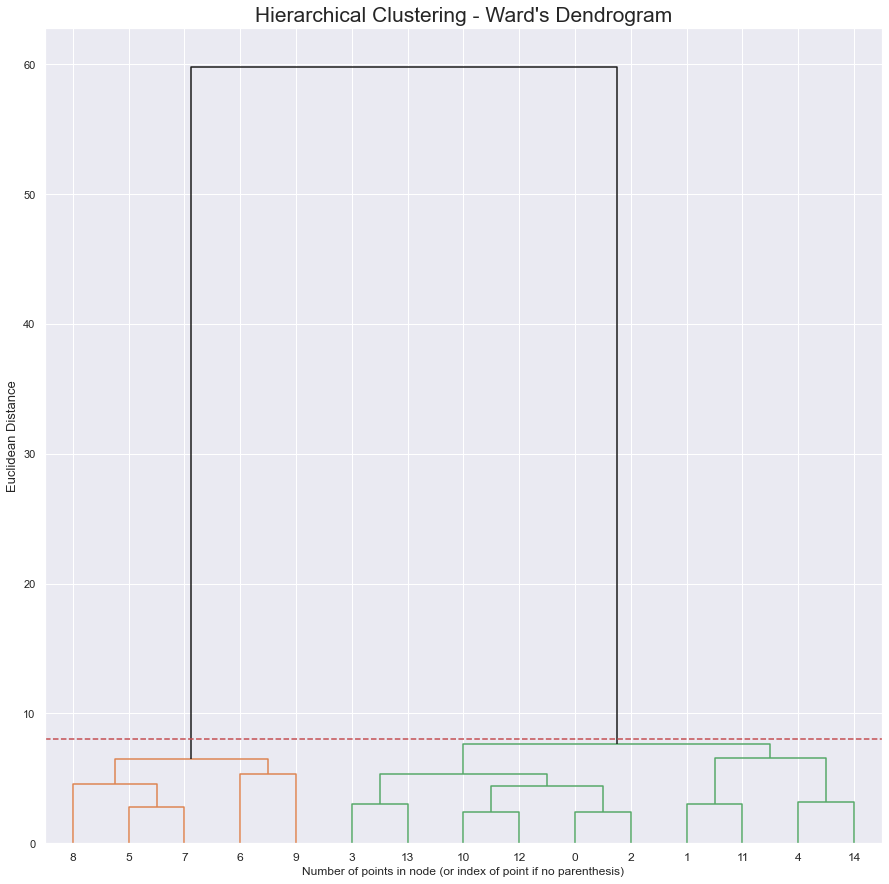

In [105]:
linkage = 'ward'
distance = 'euclidean'

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(15,15))
# The Dendrogram parameters need to be tuned
y_threshold = 8
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [106]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

NUMCHLD       HIT    POP901   POP90C5  \
socio_labels behavior_labels                                           
0            0                0.160467  0.175138  0.862146  0.190174   
             1                0.198917  0.320744  0.838376  0.152293   
             2                0.230351  0.045770  0.928425  0.122147   
             3                0.309564  3.196329  0.288908  0.308245   
             4                0.253457  0.332222  0.819875  0.143374   
1            0                0.140752  0.167044  1.122728  0.030674   
             1                0.192048  0.371524  0.938244 -0.004236   
             2                0.192401  0.042836  1.220830 -0.020490   
             3                0.303825  3.422766  0.588351  0.061024   
             4                0.222250  0.370248  1.003687 -0.029125   
2            0                0.179823  0.194452  0.884030  0.088724   
             1                0.222464  0.374879  0.906879  0.024638   
             2                0.223831  0.050911  0.959712  0.001097   
             3                0.343710  3.253666  0.432346  0.152045   
             4                0.246968  0.420066  0.877174  0.035894   

                                  ETH1      ETH2      ETH3      ETH4  \
socio_labels behavior_labels                                           
0            0               -0.407309  1.224097  1.028741 -0.011708   
             1               -0.604709  1.622372  1.120735  0.109971   
             2               -0.589402  1.591775  1.085913  0.060495   
             3               -0.499517  1.455773  0.723354  0.123758   
             4               -0.726626  1.882222  1.103704  0.138272   
1            0               -0.423738  0.356225  0.458749  2.521985   
             1               -0.468839  0.407187  0.415454  2.785919   
             2               -0.520394  0.451073  0.459584  2.896055   
             3               -0.361082  0.408982  0.367890  2.233256   
             4               -0.515790  0.470240  0.424943  2.886589   
2            0               -0.300275  0.607676  0.537190  0.840695   
             1               -0.406329  0.844082  0.755072  0.870652   
             2               -0.371538  0.695084  0.795589  0.973009   
             3               -0.213927  0.628763  0.459480  0.698225   
             4               -0.458091  0.846441  0.867696  0.969680   

                                  ETH5      ETH6  ...  RAMNTALL  NGIFTALL  \
socio_labels behavior_labels                      ...                       
0            0                0.699742  0.000787  ...  0.899932  1.272167   
             1                0.789647  0.001099  ...  0.796403  0.020005   
             2                0.850794  0.001008  ... -0.230574 -0.131092   
             3                0.722344  0.001128  ...  0.180157  0.328885   
             4                0.867284  0.001146  ... -0.466024 -0.453346   
1            0                1.246449  0.004039  ...  1.028422  1.222461   
             1                1.224807  0.004191  ...  0.906823 -0.000041   
             2                1.273596  0.004124  ... -0.207590 -0.133035   
             3                1.031127  0.004089  ...  0.196998  0.218715   
             4                1.304081  0.004453  ... -0.466402 -0.462179   
2            0                1.086349  0.002263  ...  0.964910  1.226589   
             1                1.006944  0.002558  ...  0.896206  0.007101   
             2                1.083992  0.002469  ... -0.217960 -0.132390   
             3                0.688877  0.002550  ...  0.154674  0.243170   
             4                1.144922  0.002775  ... -0.469443 -0.461999   

                              MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
socio_labels behavior_labels                                           
0            0               -0.207084 -0.365807 -0.418082 -0.066576   
             1                1.011771  2.216604  1.491

In [107]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = donors.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['socio_labels'], row['behavior_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

NUMCHLD       HIT    POP901   POP90C5      ETH1      ETH2  \
merged_labels                                                               
0              0.228536  0.344561  0.845102  0.117853 -0.606616  1.522270   
1              0.212918  0.969082  0.957654  0.010202 -0.453017  0.416693   
2              0.236736  1.184320  0.700379  0.181398 -0.446677  1.236947   

                   ETH3      ETH4      ETH5      ETH6  ...  NUMPRM12  \
merged_labels                                          ...             
0              1.035449  0.326844  0.891640  0.001516  ...  0.051733   
1              0.422816  2.645551  1.207550  0.004171  ...  0.448203   
2              0.861203  0.231412  0.795072  0.001302  ...  0.505553   

               RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
merged_labels                                                               
0              0.174094 -0.220716  1.232527  1.290129  0.947665  1.637758   
1              0.323510  0.184381  0.522915  0.530429  0.356132  0.606538   
2              0.316937  0.515930 -0.032132 -0.206051 -0.202879 -0.003850   

                AVGGIFT       AGE    TENURE  
merged_labels                                
0              1.156565 -0.275114 -0.129228  
1              0.409249 -0.171740  0.079524  
2             -0.295297 -0.114044  0.246544  

[3 rows x 97 columns]

In [108]:
df_nolabels=df_.iloc[:,:-3]

merged_labels=df_.iloc[:,-3:]

In [109]:
iqr_1=iqr(donors_withoutscaler[metric_features].values, axis=0)
median_1=np.median(donors_withoutscaler[metric_features].values, axis=0)

In [110]:
df_nolabels_transf=(df_nolabels[metric_features]*iqr_1)+median_1

In [111]:
metric_features_clusters=socio_demo_metricfeatures + behav_metricfeatures

In [112]:
df_nolabels_transf

NUMCHLD  HIT   POP901  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  \
CONTROLN                                                                       
95515         0.0  0.0    992.0     53.0  92.0   1.0   0.0   0.0  11.0   0.0   
15078         0.0  2.0   7001.0     51.0  96.0   2.0   0.0   0.0   2.0   0.0   
172556        0.0  2.0    640.0     46.0  61.0   0.0   0.0  11.0  32.0   0.0   
47784         0.0  0.0  18172.0     51.0  93.0   6.0   1.0   1.0   1.0   0.0   
62117         0.0  0.0   1067.0     54.0  99.0   0.0   0.0   0.0   1.0   0.0   
...           ...  ...      ...      ...   ...   ...   ...   ...   ...   ...   
184568        0.0  0.0  27380.0     50.0  78.0  10.0   6.0   4.0   5.0   0.0   
122706        0.0  1.0   1254.0     49.0  91.0   3.0   0.0   2.0   6.0   0.0   
189641        0.0  0.0    552.0     47.0  82.0  14.0   0.0   1.0   9.0   0.0   
4693          0.0  0.0   1746.0     53.0  92.0   1.0   1.0   5.0   8.0   0.0   
185114        0.0  3.0   3935.0     52.0  86.0  12.0   0.0   1.0   1.0   0.0   

          ...  NUMPRM12  RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT  \
CONTROLN  ...                                                               
95515     ...      14.0     240.0      31.0       5.0      12.0      10.0   
15078     ...      14.0     202.0      27.0       2.0      16.0       5.0   
172556    ...      14.0     109.0      16.0       2.0      11.0      10.0   
47784     ...      12.0      51.0       4.0      10.0      16.0      15.0   
62117     ...       9.0     107.0      14.0       3.0      12.0      11.0   
...       ...       ...       ...       ...       ...       ...       ...   
184568    ...      12.0      25.0       1.0      25.0      25.0      25.0   
122706    ...       8.0      20.0       1.0      20.0      20.0      20.0   
189641    ...      17.0      58.0       7.0       3.0      10.0      10.0   
4693      ...      31.0     498.0      41.0       5.0      21.0      18.0   
185114    ...      35.0    3775.0      39.0      10.0     201.0     100.0   

          TIMELAG    AVGGIFT   AGE  TENURE  
CONTROLN                                    
95515         4.0   7.741935  63.0    11.0  
15078        12.0   7.481481  66.0    10.0  
172556        9.0   6.812500  72.0    13.0  
47784         6.0  12.750000  66.0     6.0  
62117         4.0   7.642857  40.0    13.0  
...           ...        ...   ...     ...  
184568       45.0  25.000000  66.0     4.0  
122706       45.0  20.000000  50.0     4.0  
189641        3.0   8.285714  62.0     6.0  
4693          4.0  12.146341  60.0    14.0  
185114        6.0  96.794872  82.0    12.0  

[89778 rows x 97 columns]

In [113]:
df_nolabels_metric_nonmetric=pd.concat([df_nolabels_transf, df_[non_metric_features]], axis=1)

In [114]:
df_merged=pd.concat([df_nolabels_metric_nonmetric,merged_labels], axis=1)


In [148]:
merged_labels

behavior_labels  socio_labels  merged_labels
CONTROLN                                              
95515                   0             0              2
15078                   0             0              2
172556                  3             1              1
47784                   2             2              2
62117                   0             0              2
...                   ...           ...            ...
184568                  4             2              0
122706                  4             1              1
189641                  2             0              2
4693                    0             1              1
185114                  1             2              0

[89778 rows x 3 columns]

In [115]:
df_merged.groupby('merged_labels').mean()[metric_features_clusters]

IC3           IC5        IC6        IC7       IC11  \
merged_labels                                                              
0              334.576240  12880.475376  24.816623  18.907359   3.792464   
1              545.544711  23410.048643  12.232686  11.555595  11.104704   
2              331.067486  12825.805566  25.073847  19.160046   3.628971   

                   IC12      IC13      IC14       HVP2       HVP6       HIT  \
merged_labels                                                                 
0              1.101143  0.352119  0.574754   6.076705   0.200520  1.033683   
1              5.272178  2.443694  4.903114  64.325530  22.145129  2.907245   
2              1.050565  0.348294  0.567934   5.293203   0.171567  3.552959   

                 RAMNTALL   NGIFTALL   MINRAMNT   MAXRAMNT   LASTGIFT  \
merged_labels                                                           
0               92.668497   4.792836  13.627692  27.321035  24.476654   
1              106.115917   8.843810   8.660405  21.243433  18.561318   
2              105.524365  12.159303   4.775078  15.351595  12.971214   

                 TIMELAG    AVGGIFT  
merged_labels                        
0              21.739825  19.612312  
1              12.458842  14.416686  
2               6.965350   9.518414

In [116]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels

df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['socio_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['behavior_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('socio_labels', 'behavior_labels', 0)

behavior_labels        3        4
socio_labels                     
1                    NaN  22511.0
2                45743.0  21524.0

In [153]:
merged=merged_labels.iloc[:,-1]

In [154]:
merged

CONTROLN
95515     2
15078     2
172556    1
47784     2
62117     2
         ..
184568    0
122706    1
189641    2
4693      1
185114    0
Name: merged_labels, Length: 89778, dtype: int64

In [163]:
donors_visualizations=pd.concat([df_nolabels_metric_nonmetric, merged], axis=1)

# Mean shift behav


In [117]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(cluster_behaviour, quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4, min_bin_freq=10)
ms_labels_behav = ms.fit_predict(cluster_behaviour)

ms_n_clusters = len(np.unique(ms_labels_behav))
print("Number of estimated clusters : %d" % ms_n_clusters)



Number of estimated clusters : 6


In [118]:
# Concatenating the labels to df
df_mean_shift=donors.copy()
df_mean_shift = pd.concat([df_mean_shift, pd.Series(ms_labels_behav, index=df_mean_shift.index, name="ms_labels_behav")], axis=1)
df_mean_shift

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515           0         0      0.0       3  0.000000     -1     -1   
15078           0         0      0.0       3  0.666667     -1     -1   
172556          0         0      0.0       1  0.666667     -1     -1   
47784           0         0      0.0       4  0.000000     -1     -1   
62117           0         0      1.0       4  0.000000     -1     -1   
...           ...       ...      ...     ...       ...    ...    ...   
184568          0         0      0.0       6  0.000000     -1     -1   
122706          0         0      1.0       7  0.333333     -1     -1   
189641          0         0      0.0       4  0.000000     12     -1   
4693            0         0      0.0       7  0.000000     -1     12   
185114          1         0      0.0       5  1.000000     -1     12   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_4  MSA_1600.0  \
CONTROLN                             ...                                   
95515            0         0      0  ...                 0.0         0.0   
15078            0         0      0  ...                 1.0         0.0   
172556           0         0      0  ...                 1.0         0.0   
47784            0         0      0  ...                 0.0         0.0   
62117            0         0      0  ...                 0.0         0.0   
...            ...       ...    ...  ...                 ...         ...   
184568           0         0      0  ...                 0.0         0.0   
122706           0         0      0  ...                 0.0         0.0   
189641           0         0      0  ...                 0.0         0.0   
4693             0         0      0  ...                 0.0         0.0   
185114           0         0      0  ...                 0.0         0.0   

          MSA_4480.0  MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  \
CONTROLN                                                           
95515            0.0        0.0        0.0        0.0        1.0   
15078            0.0        0.0        0.0        0.0        1.0   
172556           0.0        1.0        0.0        0.0        1.0   
47784            0.0        1.0        0.0        0.0        1.0   
62117            0.0        0.0        0.0        0.0        1.0   
...              ...        ...        ...        ...        ...   
184568           0.0        1.0        0.0        0.0        1.0   
122706           0.0        1.0        0.0        0.0        1.0   
189641           0.0        1.0        0.0        0.0        1.0   
4693             0.0        1.0        1.0        0.0        0.0   
185114           0.0        1.0        0.0        0.0        1.0   

          behavior_labels  socio_labels  ms_labels_behav  
CONTROLN                                                  
95515                   0             0                0  
15078                   0             0                0  
172556                  3             1                0  
47784                   2             2                0  
62117                   0             0                0  
...                   ...           ...              ...  
184568                  4             2                1  
122706                  4             1                1  
189641                  2             0                0  
4693                    0             1                0  
185114                  1             2                4  

[89778 rows x 159 columns]

In [119]:
df_mean_shift.drop('behavior_labels',axis=1, inplace=True)

In [120]:
df_mean_shift.drop('socio_labels',axis=1, inplace=True)

In [121]:
df_mean_shift

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515           0         0      0.0       3  0.000000     -1     -1   
15078           0         0      0.0       3  0.666667     -1     -1   
172556          0         0      0.0       1  0.666667     -1     -1   
47784           0         0      0.0       4  0.000000     -1     -1   
62117           0         0      1.0       4  0.000000     -1     -1   
...           ...       ...      ...     ...       ...    ...    ...   
184568          0         0      0.0       6  0.000000     -1     -1   
122706          0         0      1.0       7  0.333333     -1     -1   
189641          0         0      0.0       4  0.000000     12     -1   
4693            0         0      0.0       7  0.000000     -1     12   
185114          1         0      0.0       5  1.000000     -1     12   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_2  \
CONTROLN                             ...                       
95515            0         0      0  ...                 0.0   
15078            0         0      0  ...                 0.0   
172556           0         0      0  ...                 0.0   
47784            0         0      0  ...                 0.0   
62117            0         0      0  ...                 0.0   
...            ...       ...    ...  ...                 ...   
184568           0         0      0  ...                 0.0   
122706           0         0      0  ...                 0.0   
189641           0         0      0  ...                 0.0   
4693             0         0      0  ...                 0.0   
185114           0         0      0  ...                 0.0   

          urbanicity_level_3  urbanicity_level_4  MSA_1600.0  MSA_4480.0  \
CONTROLN                                                                   
95515                    1.0                 0.0         0.0         0.0   
15078                    0.0                 1.0         0.0         0.0   
172556                   0.0                 1.0         0.0         0.0   
47784                    1.0                 0.0         0.0         0.0   
62117                    1.0                 0.0         0.0         0.0   
...                      ...                 ...         ...         ...   
184568                   0.0                 0.0         0.0         0.0   
122706                   0.0                 0.0         0.0         0.0   
189641                   0.0                 0.0         0.0         0.0   
4693                     0.0                 0.0         0.0         0.0   
185114                   0.0                 0.0         0.0         0.0   

          MSA_Other  DMA_803.0  DMA_807.0  DMA_Other  ms_labels_behav  
CONTROLN                                                               
95515           0.0        0.0        0.0        1.0                0  
15078           0.0        0.0        0.0        1.0                0  
172556          1.0        0.0        0.0        1.0                0  
47784           1.0        0.0        0.0        1.0                0  
62117           0.0        0.0        0.0        1.0                0  
...             ...        ...        ...        ...              ...  
184568          1.0        0.0        0.0        1.0                1  
122706          1.0        0.0        0.0        1.0                1  
189641          1.0        0.0        0.0        1.0                0  
4693            1.0        1.0        0.0        0.0                0  
185114          1.0        0.0        0.0        1.0                4  

[89778 rows x 157 columns]

In [122]:
# Computing the R^2 of the cluster solution
# using R^2

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_mean_shift)  # get total sum of squares
ssw_labels = df_mean_shift.groupby(by='ms_labels_behav').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_mean_shift_behav = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2_mean_shift_behav)


Cluster solution with R^2 of 0.0190


In [123]:
#using davies bouldin index

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(cluster_behaviour, ms_labels_behav)

1.229242458206498

In [124]:
davies_bouldin_ms_behav=davies_bouldin_score(cluster_behaviour, ms_labels_behav)

In [125]:
#using calinski_harabasz
from sklearn import metrics

metrics.calinski_harabasz_score(cluster_behaviour, ms_labels_behav)

7897.78418548764

In [126]:
calinski_harabasz_ms_behav=metrics.calinski_harabasz_score(cluster_behaviour, ms_labels_behav)

# Mean shift socio_demo


In [ ]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(cluster_socio_demographic, quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4, min_bin_freq=10)
ms_labels_socio = ms.fit_predict(cluster_socio_demographic)

ms_n_clusters = len(np.unique(ms_labels_socio))
print("Number of estimated clusters : %d" % ms_n_clusters)



In [ ]:
# Concatenating the labels to df
df_mean_shift = pd.concat([df_mean_shift, pd.Series(ms_labels_socio, index=df_mean_shift.index, name="ms_labels_socio")], axis=1)
df_mean_shift.head()

In [ ]:
# Computing the R^2 of the cluster solution
# using R^2

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_mean_shift)  # get total sum of squares
ssw_labels = df_mean_shift.groupby(by='ms_labels_socio').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_mean_shift_socio = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2_mean_shift_socio)


In [ ]:
#using davies bouldin index

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(cluster_socio_demographic, ms_labels_socio)

In [ ]:
davies_bouldin_ms_socio=davies_bouldin_score(cluster_socio_demographic, ms_labels_socio)

In [ ]:
#using calinski_harabasz
from sklearn import metrics

metrics.calinski_harabasz_score(cluster_socio_demographic, ms_labels_socio)

In [ ]:
calinski_harabasz_ms_socio=metrics.calinski_harabasz_score(cluster_socio_demographic, ms_labels_socio)

In [ ]:
df_mean_shift_socio=df_mean_shift.drop('ms_labels_behav', axis=1, inplace=True)


In [ ]:
df_mean_shift_socio

In [ ]:
df_mean_shift_socio.groupby(by='ms_labels_socio').mean()[socio_demo_metricfeatures]


In [ ]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(mean_shift_socio_grouped)

In [ ]:

linkage = 'ward'
distance = 'euclidean'

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(15,15))
# The Dendrogram parameters need to be tuned
y_threshold = 10
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=5
)
hclust_labels_behav = hclust.fit_predict(mean_shift_socio_grouped)
mean_shift_socio_grouped['hclust_labels'] = hclust_labels

mean_shift_socio_grouped  # centroid's cluster labels

In [137]:

data={'kmeans_socio_demographic':[r2_socio, calinski_harabasz_socio, davies_bouldin_socio],'mean_shift_socio':[r2_mean_shift_socio , calinski_harabasz_ms_socio, davies_bouldin_ms_socio],'kmeans_behavior':[r2_behavior, calinski_harabasz_behav, davies_bouldin_behav], 'mean_shift_behavior':[r2_mean_shift_behav, calinski_harabasz_ms_behav, davies_bouldin_ms_behav]}
performance=pd.DataFrame(data).from_dict(data, orient='index', columns=['r2_score','calinski_harabasz_score','davies_bouldin_score'])
performance

r2_score  calinski_harabasz_score  \
kmeans_socio_demographic  0.337195             22836.003630   
mean_shift_socio          0.593479            120211.321397   
kmeans_behavior           0.261942              7965.266079   
mean_shift_behavior       0.018983              7897.784185   

                          davies_bouldin_score  
kmeans_socio_demographic              1.557394  
mean_shift_socio                      1.058149  
kmeans_behavior                       1.376607  
mean_shift_behavior                   1.229242

# Interpretation of non metric features

In [138]:
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X','COLLECT1','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','VETERANS', 'PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','1TIME_DONOR']
socio_demo_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other''INCOME', 'GENDER_M','GENDER_U','socio_econ_neighbourhood','POP90C1','POP90C3','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']


In [158]:
donors_visualizations['merged_labels'].unique()

array([2, 1, 0], dtype=int64)

In [164]:
donors_visualizations['MDMAUD_F']

CONTROLN
95515     0
15078     0
172556    0
47784     0
62117     0
         ..
184568    0
122706    0
189641    0
4693      0
185114    1
Name: MDMAUD_F, Length: 89778, dtype: int64

In [165]:
donors_visualizations.groupby('merged_labels')['MDMAUD_F'].value_counts().unstack()#.median()

MDMAUD_F             0     1     2    5
merged_labels                          
0              21399.0  81.0  39.0  5.0
1              22422.0  57.0  26.0  6.0
2              45739.0   2.0   NaN  2.0

In [166]:
donors_visualizations.groupby('merged_labels')['MDMAUD_A'].value_counts().unstack()#.median()

MDMAUD_A           0.0    1.0  2.0   3.0  4.0
merged_labels                                
0              21399.0  105.0  9.0  10.0  1.0
1              22422.0   77.0  4.0   6.0  2.0
2              45739.0    4.0  NaN   NaN  NaN

<ipython-input-168-5bca991697ea>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-168-5bca991697ea>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


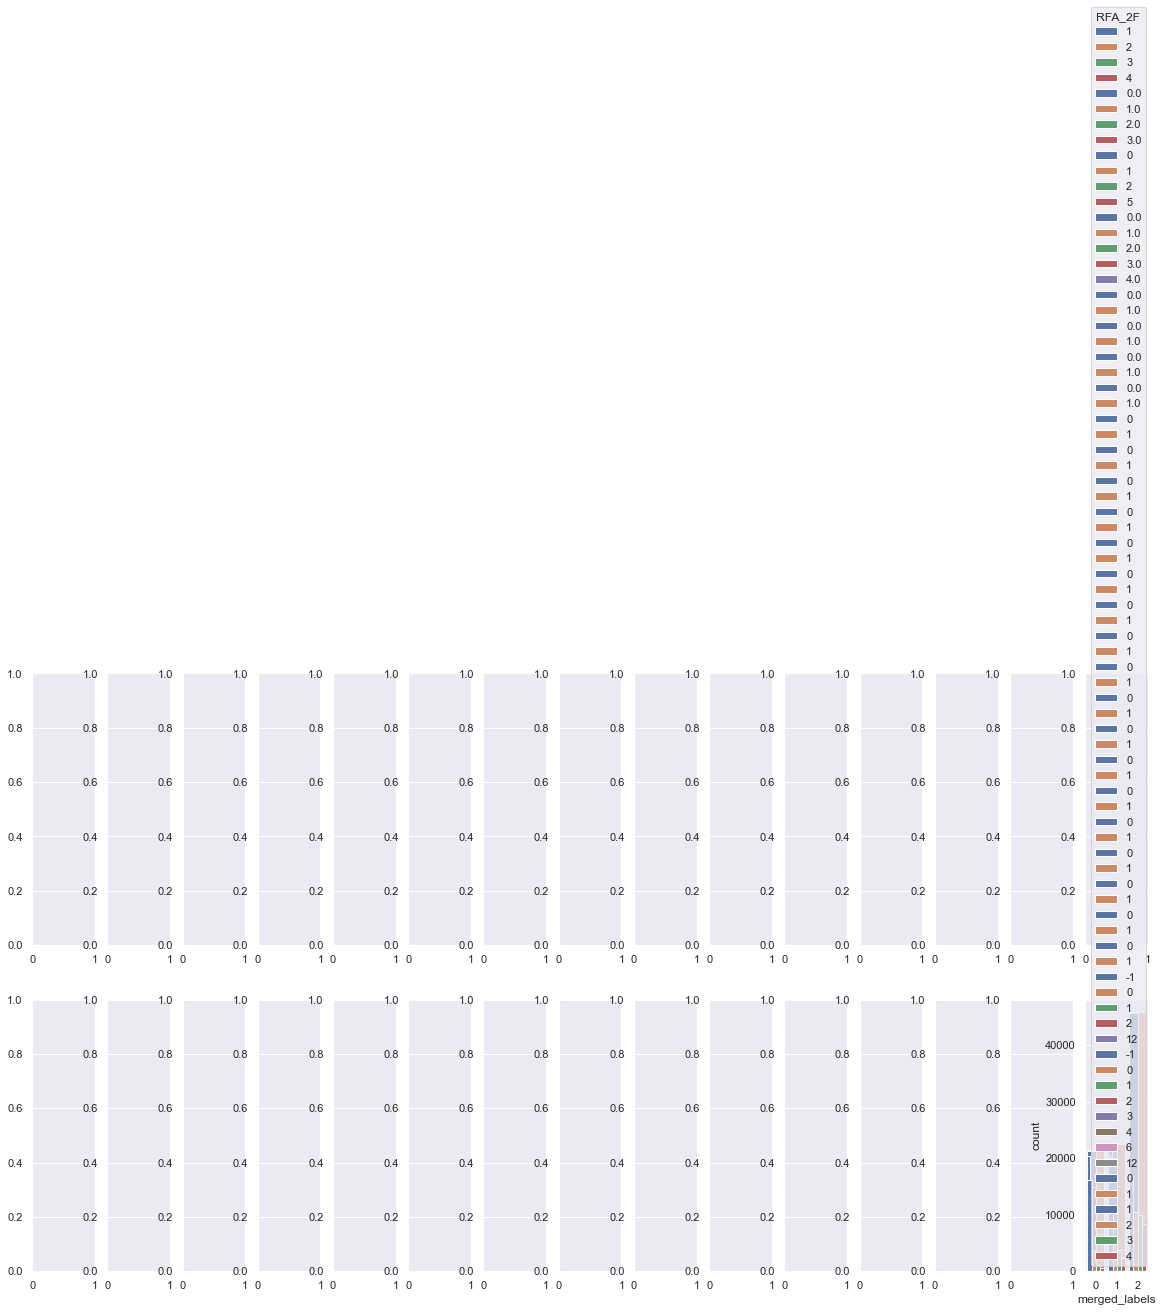

None


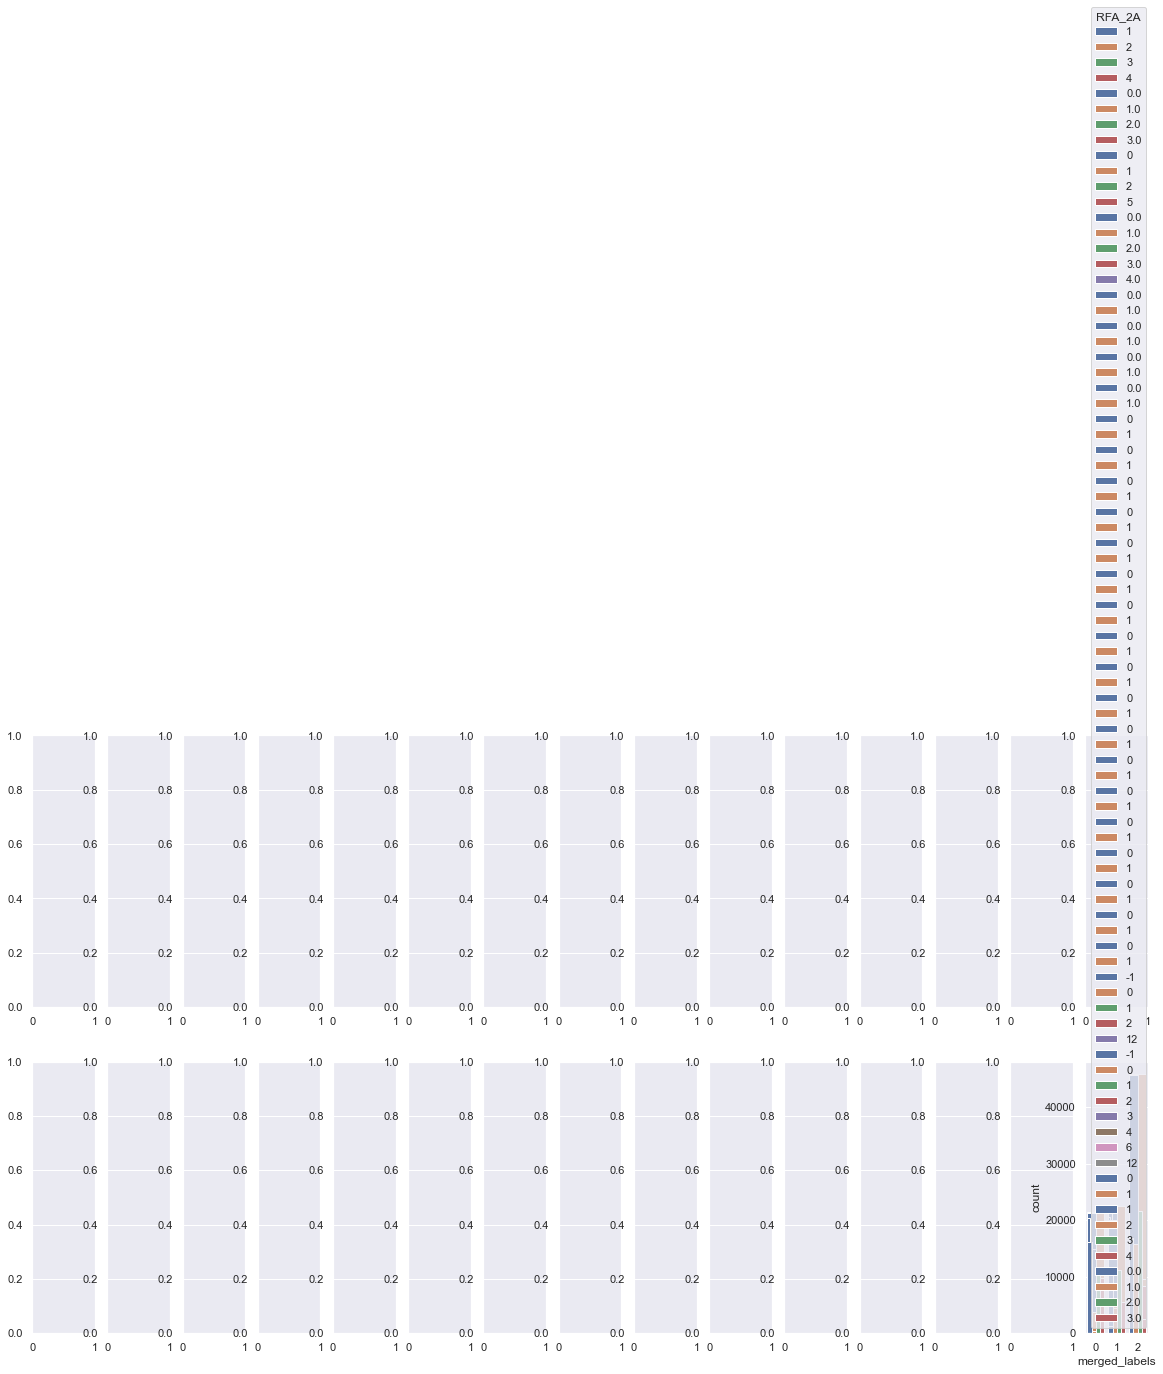

None


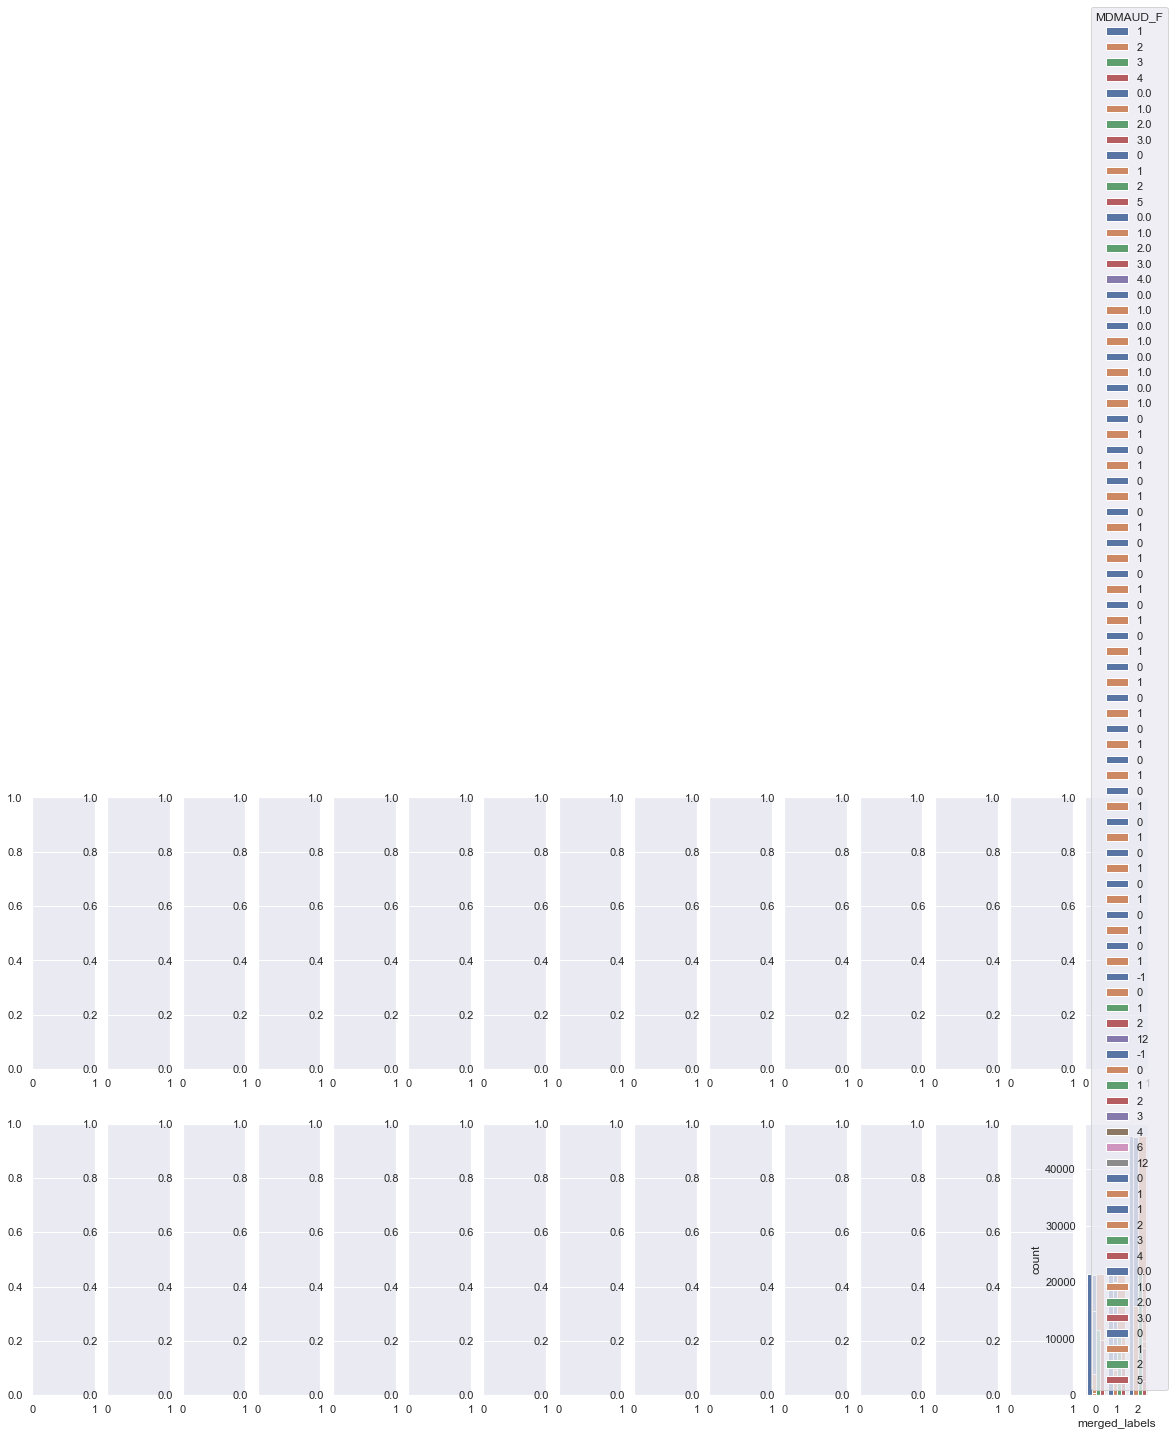

None


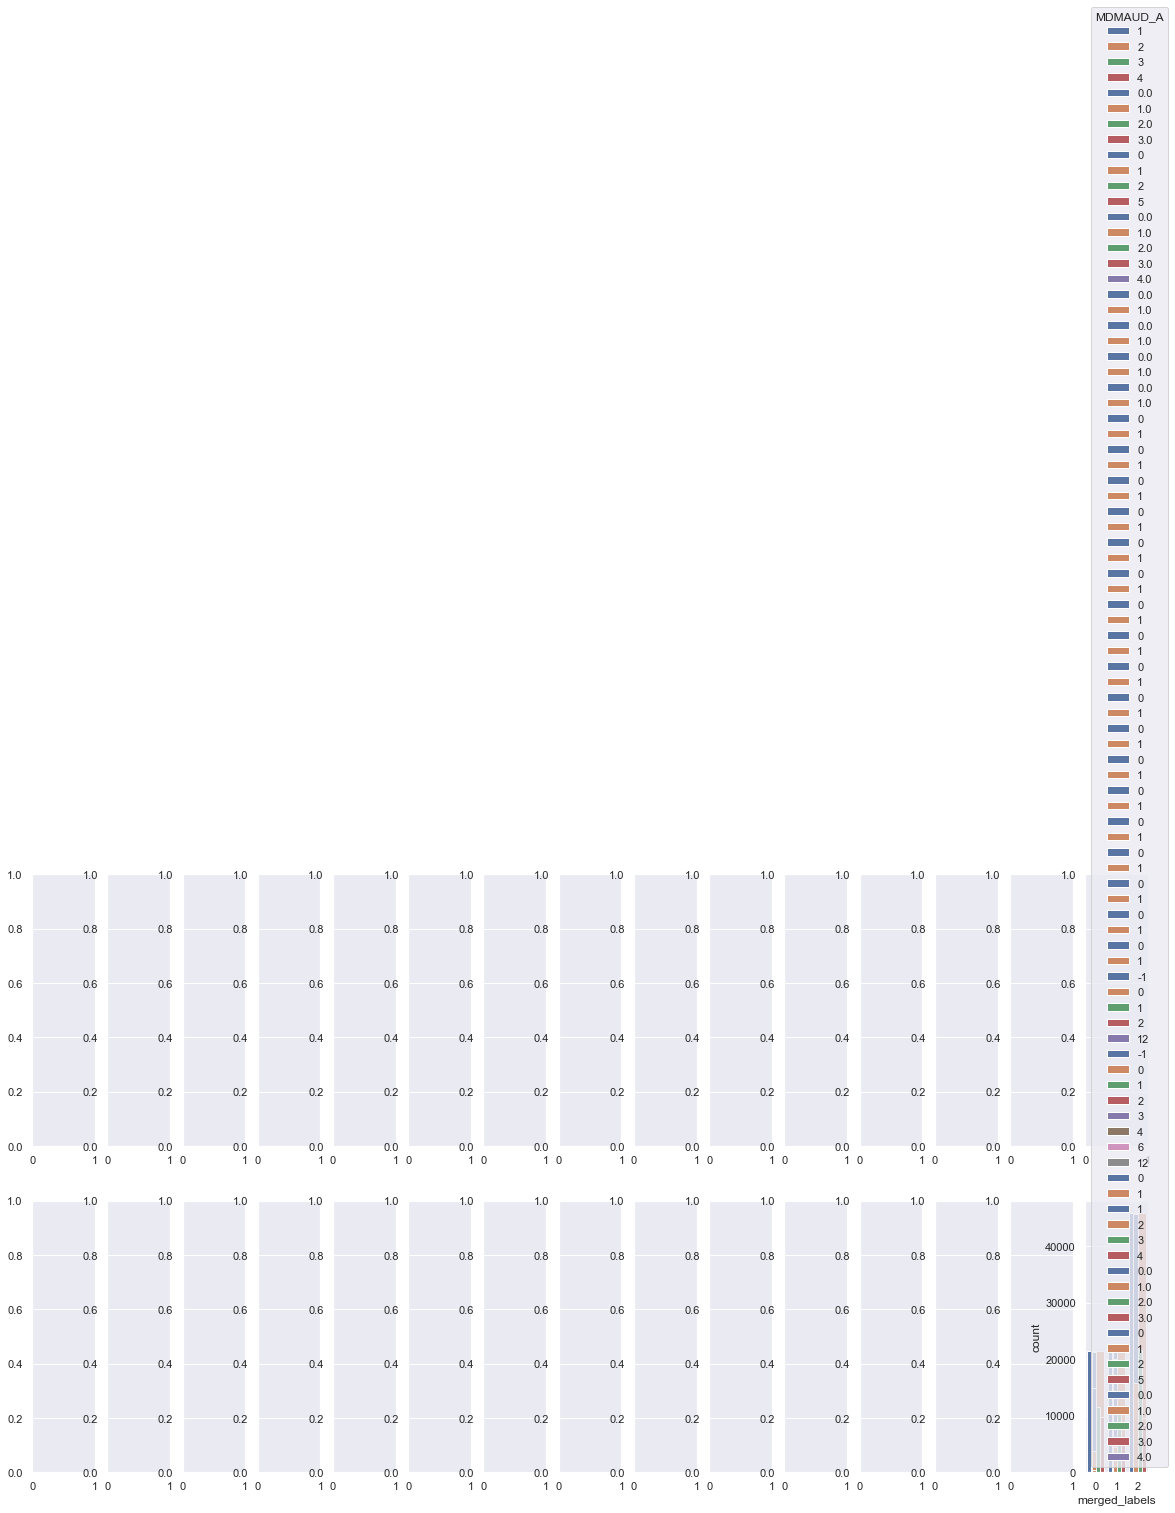

None


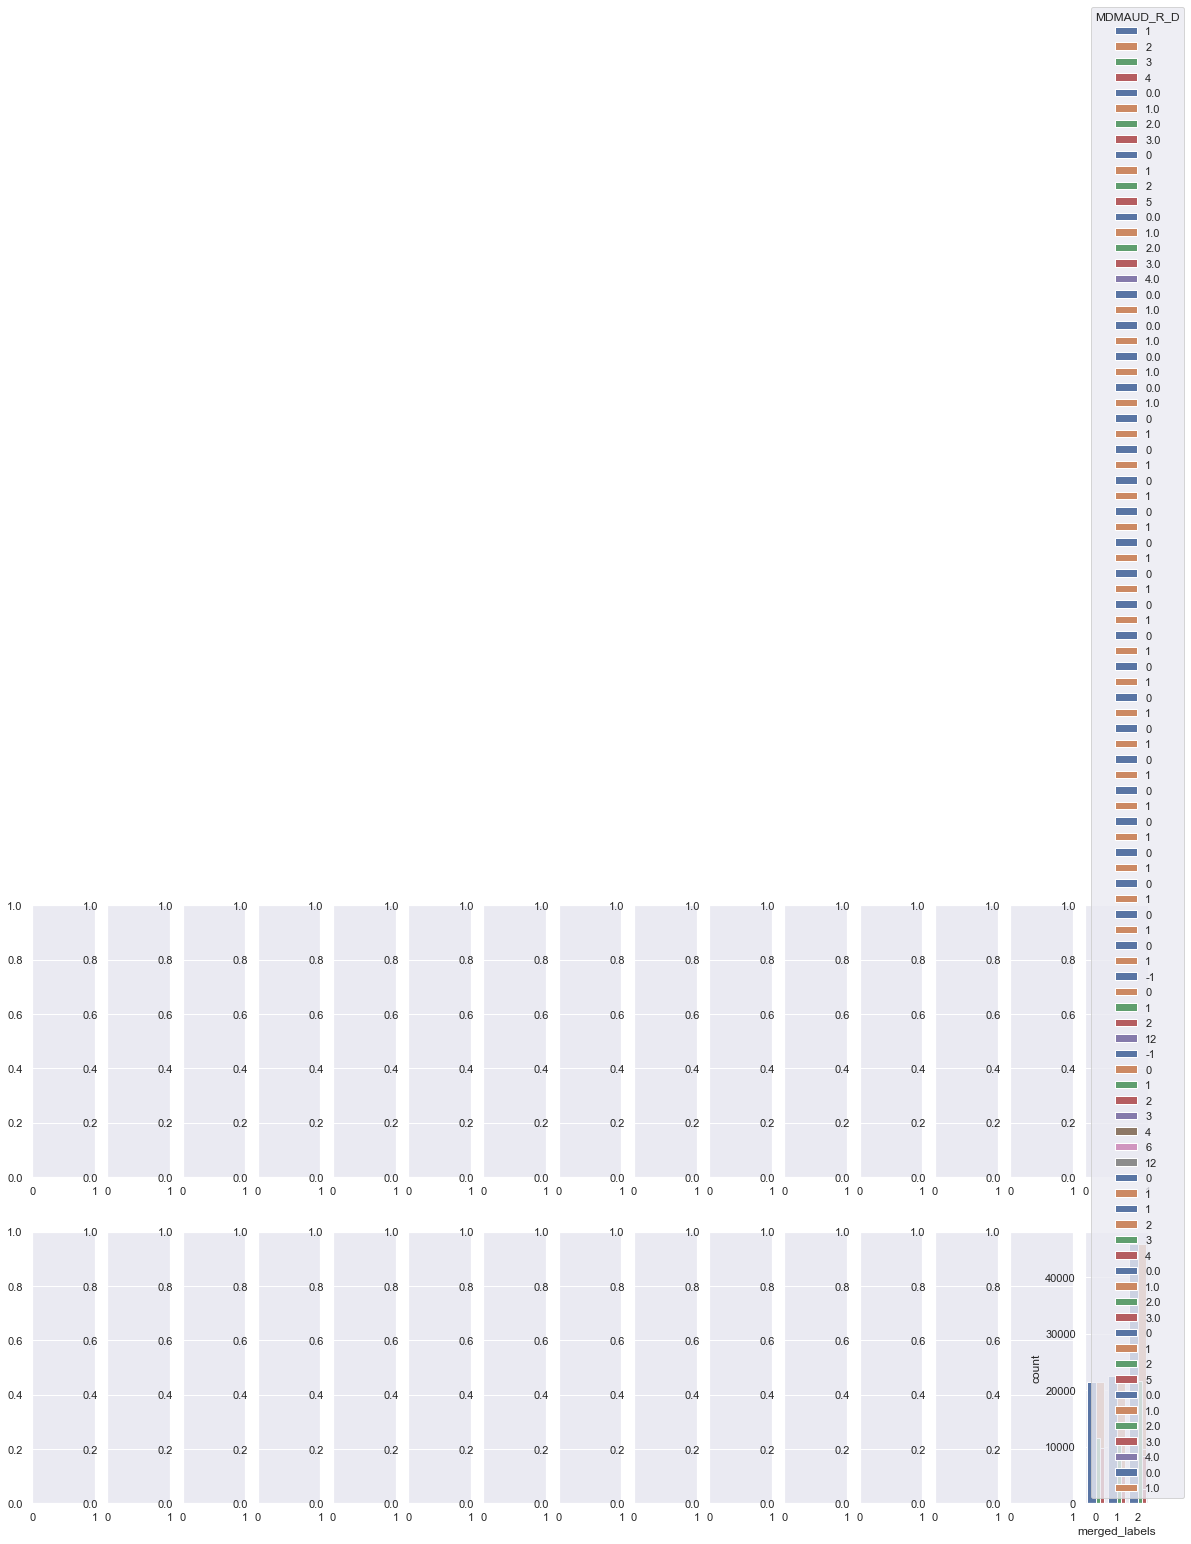

None


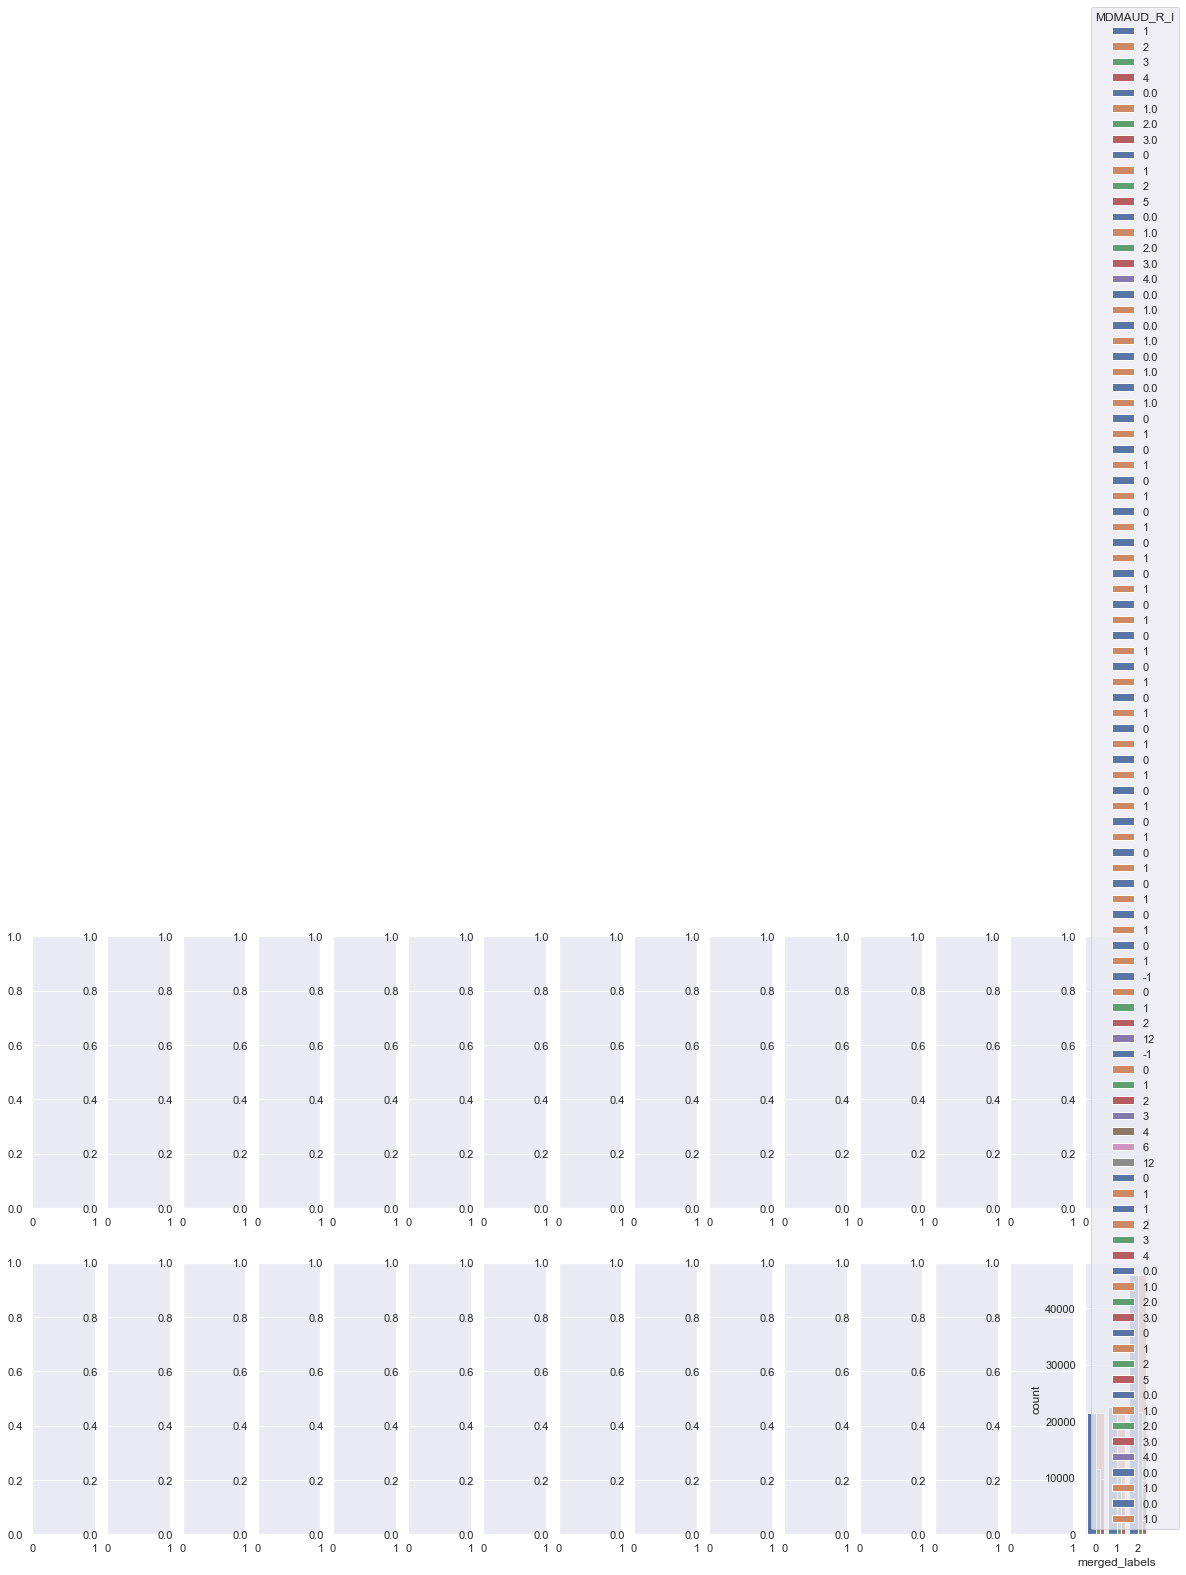

None


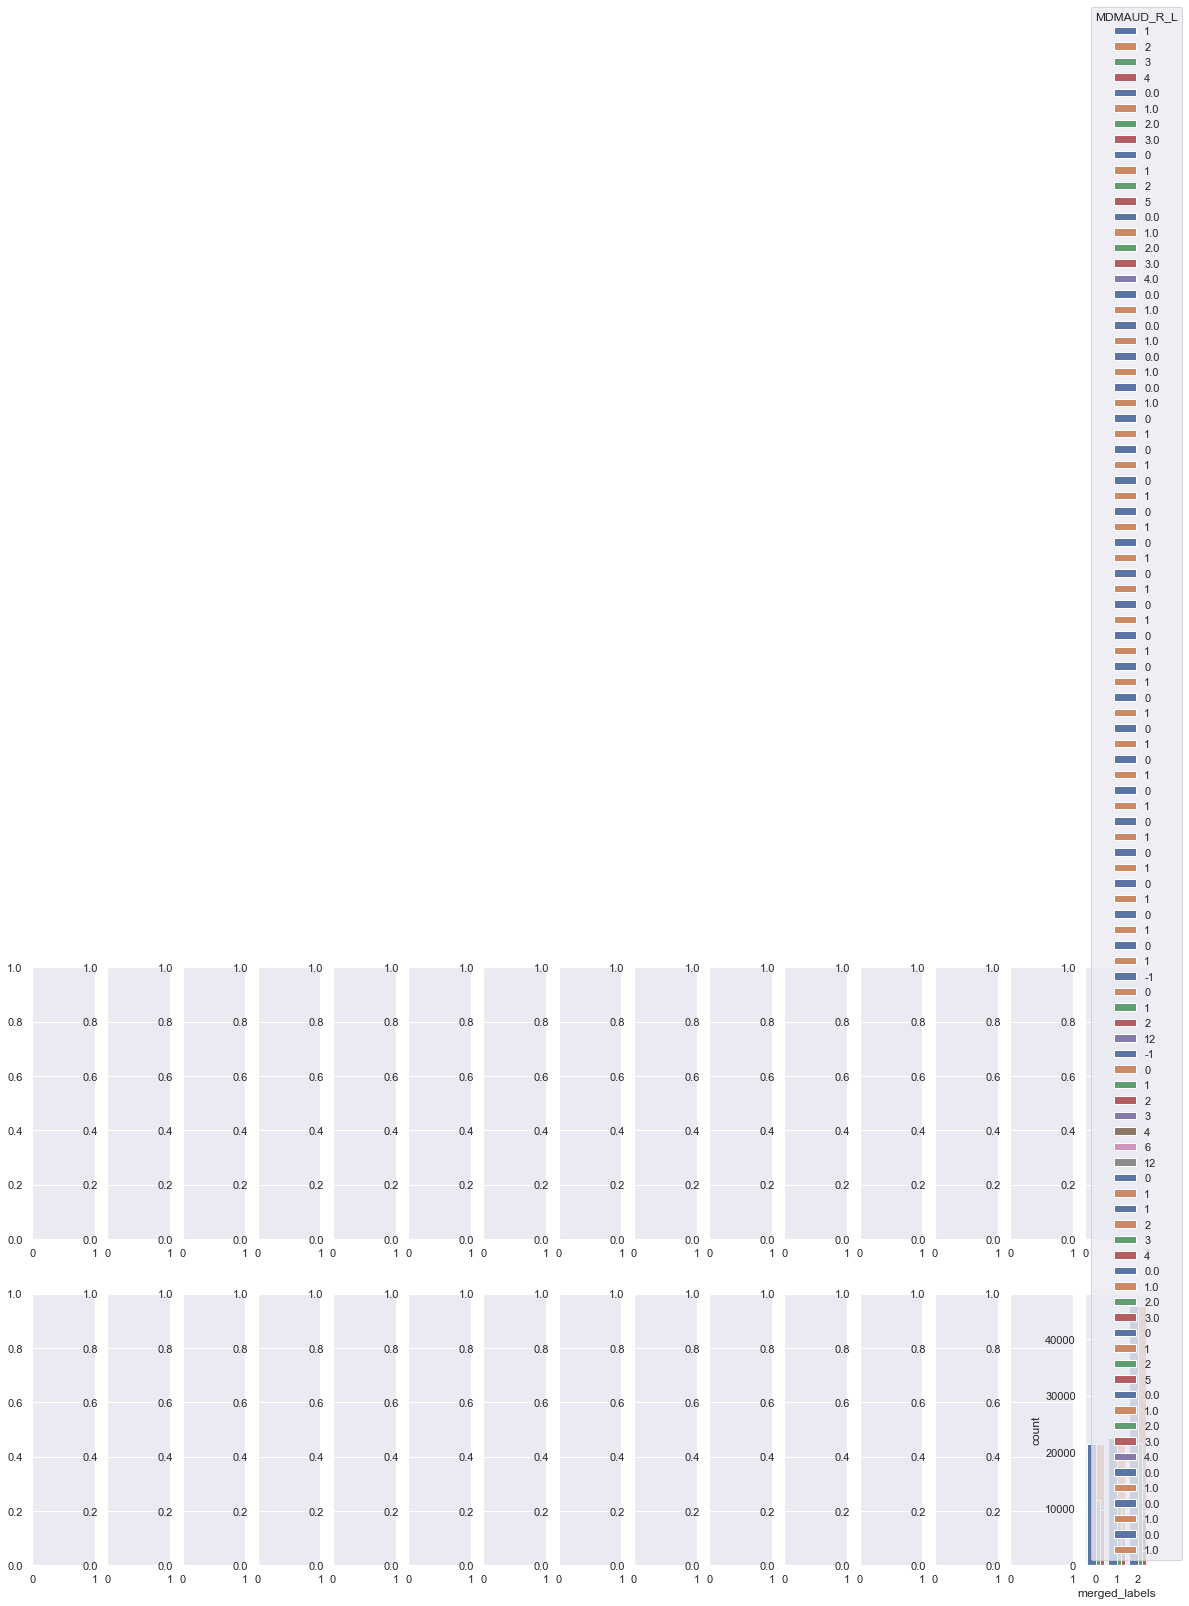

None


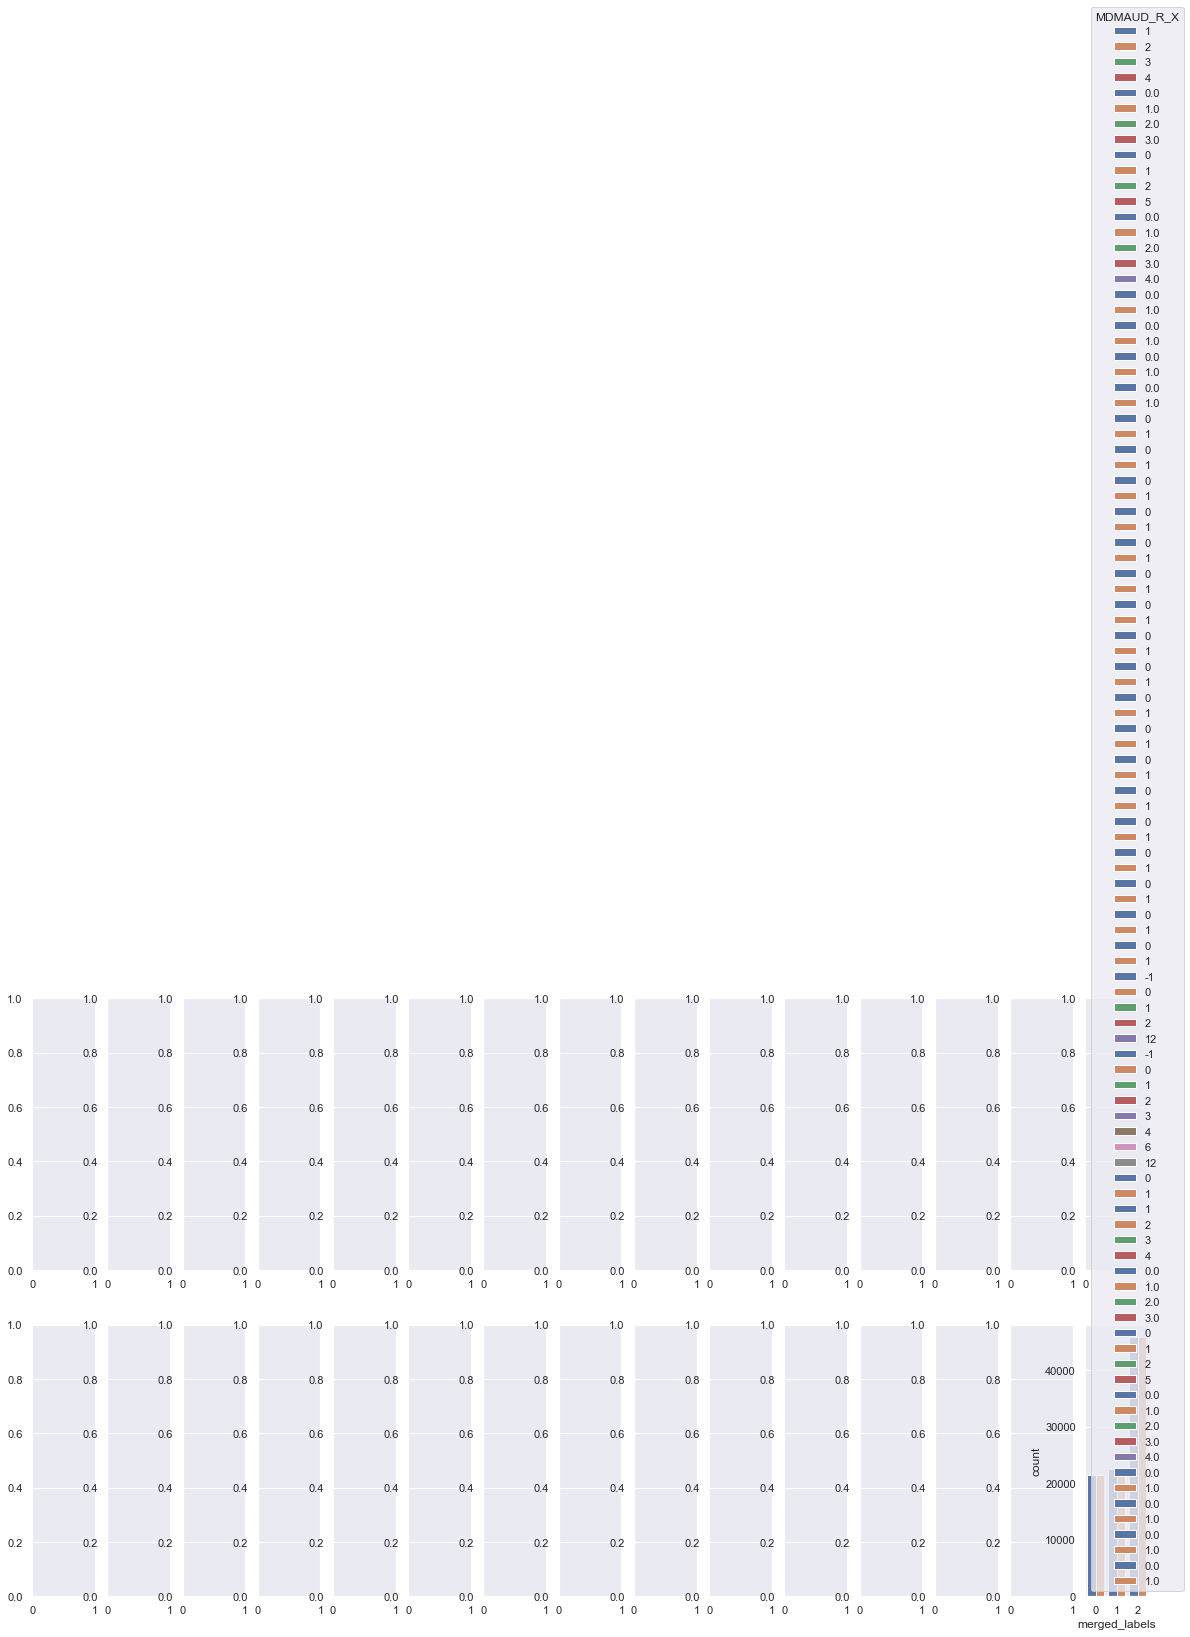

None


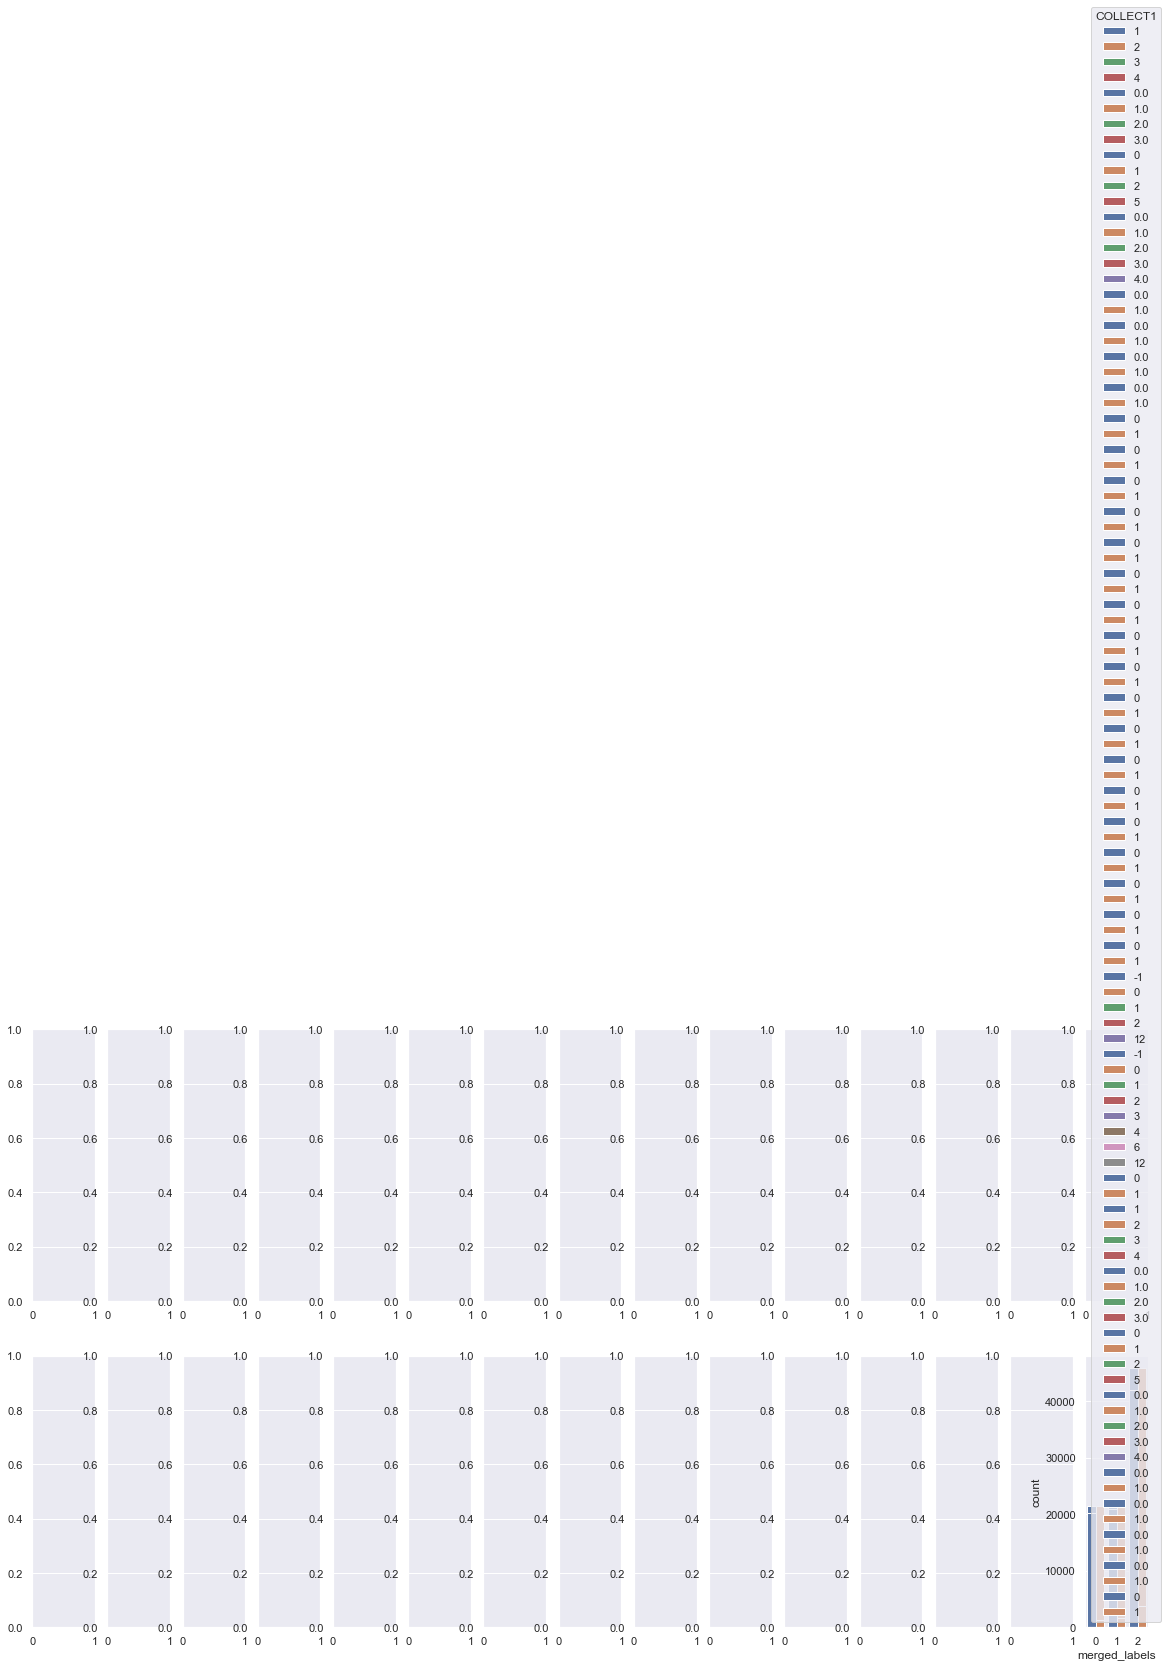

None


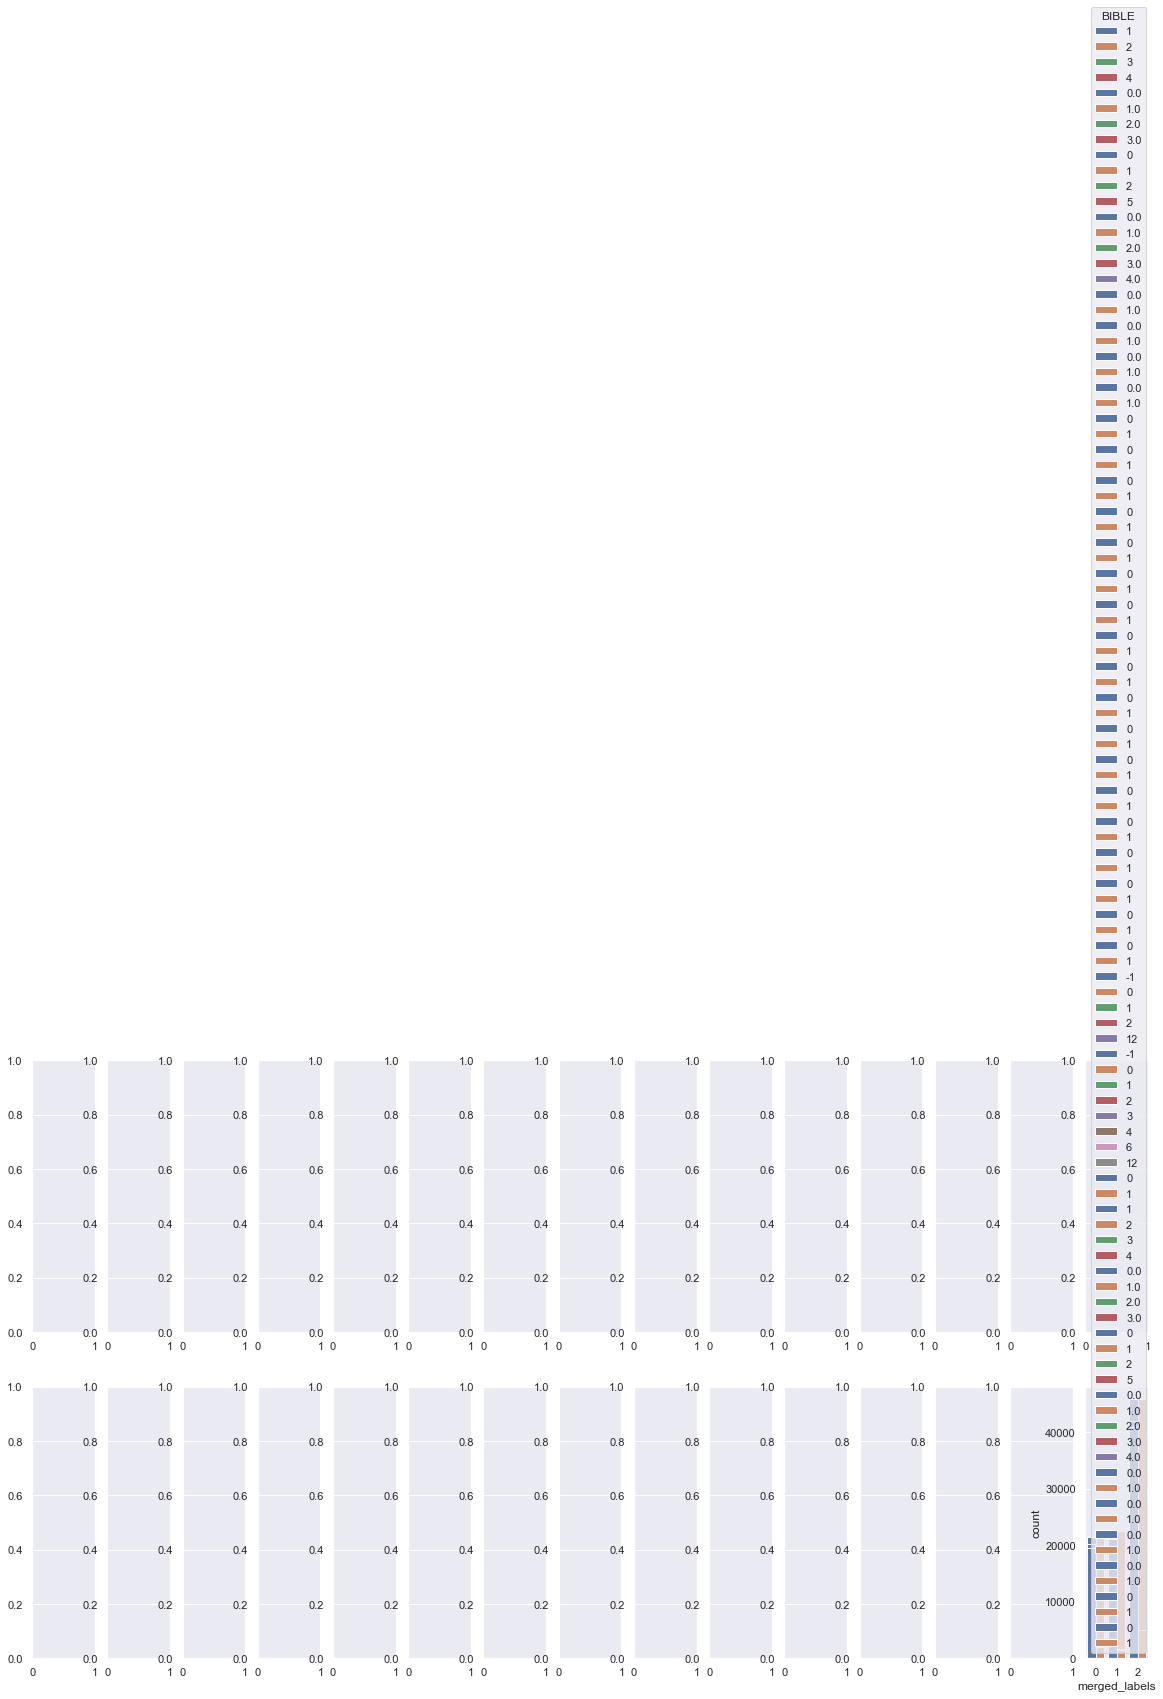

None


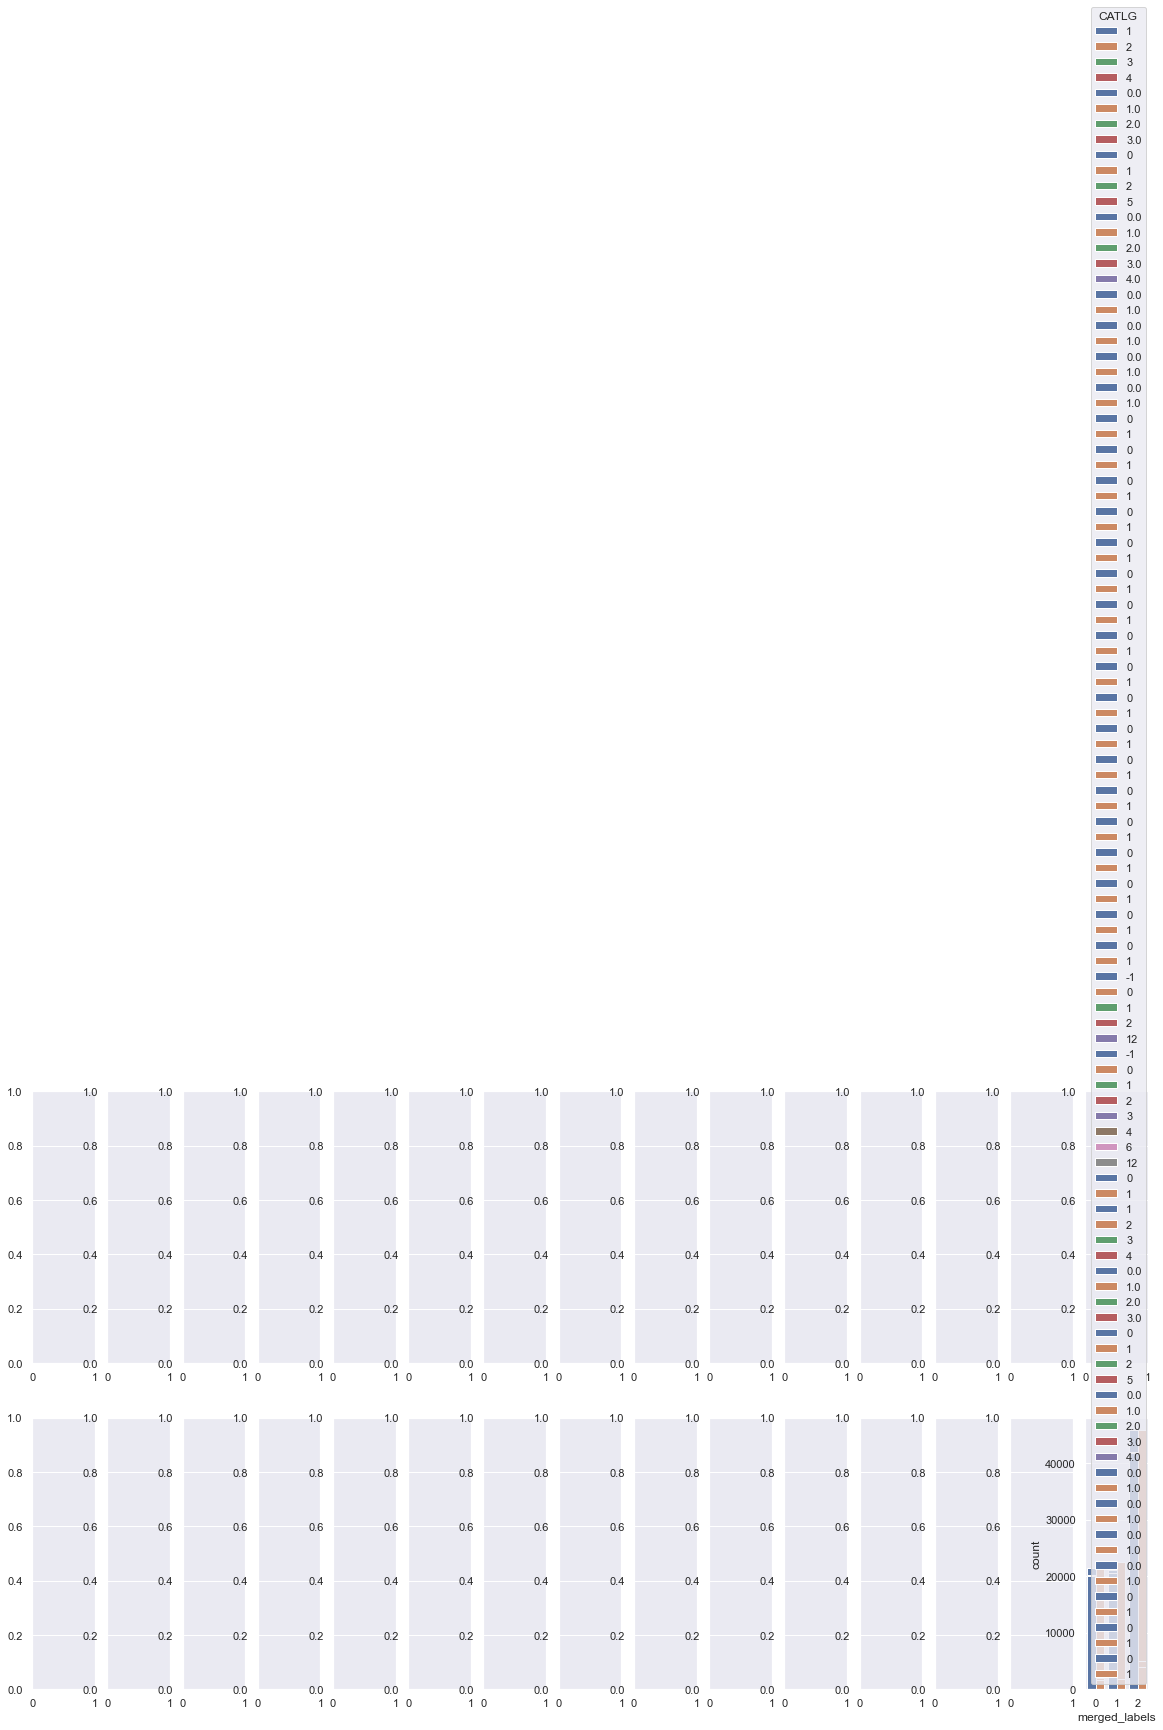

None


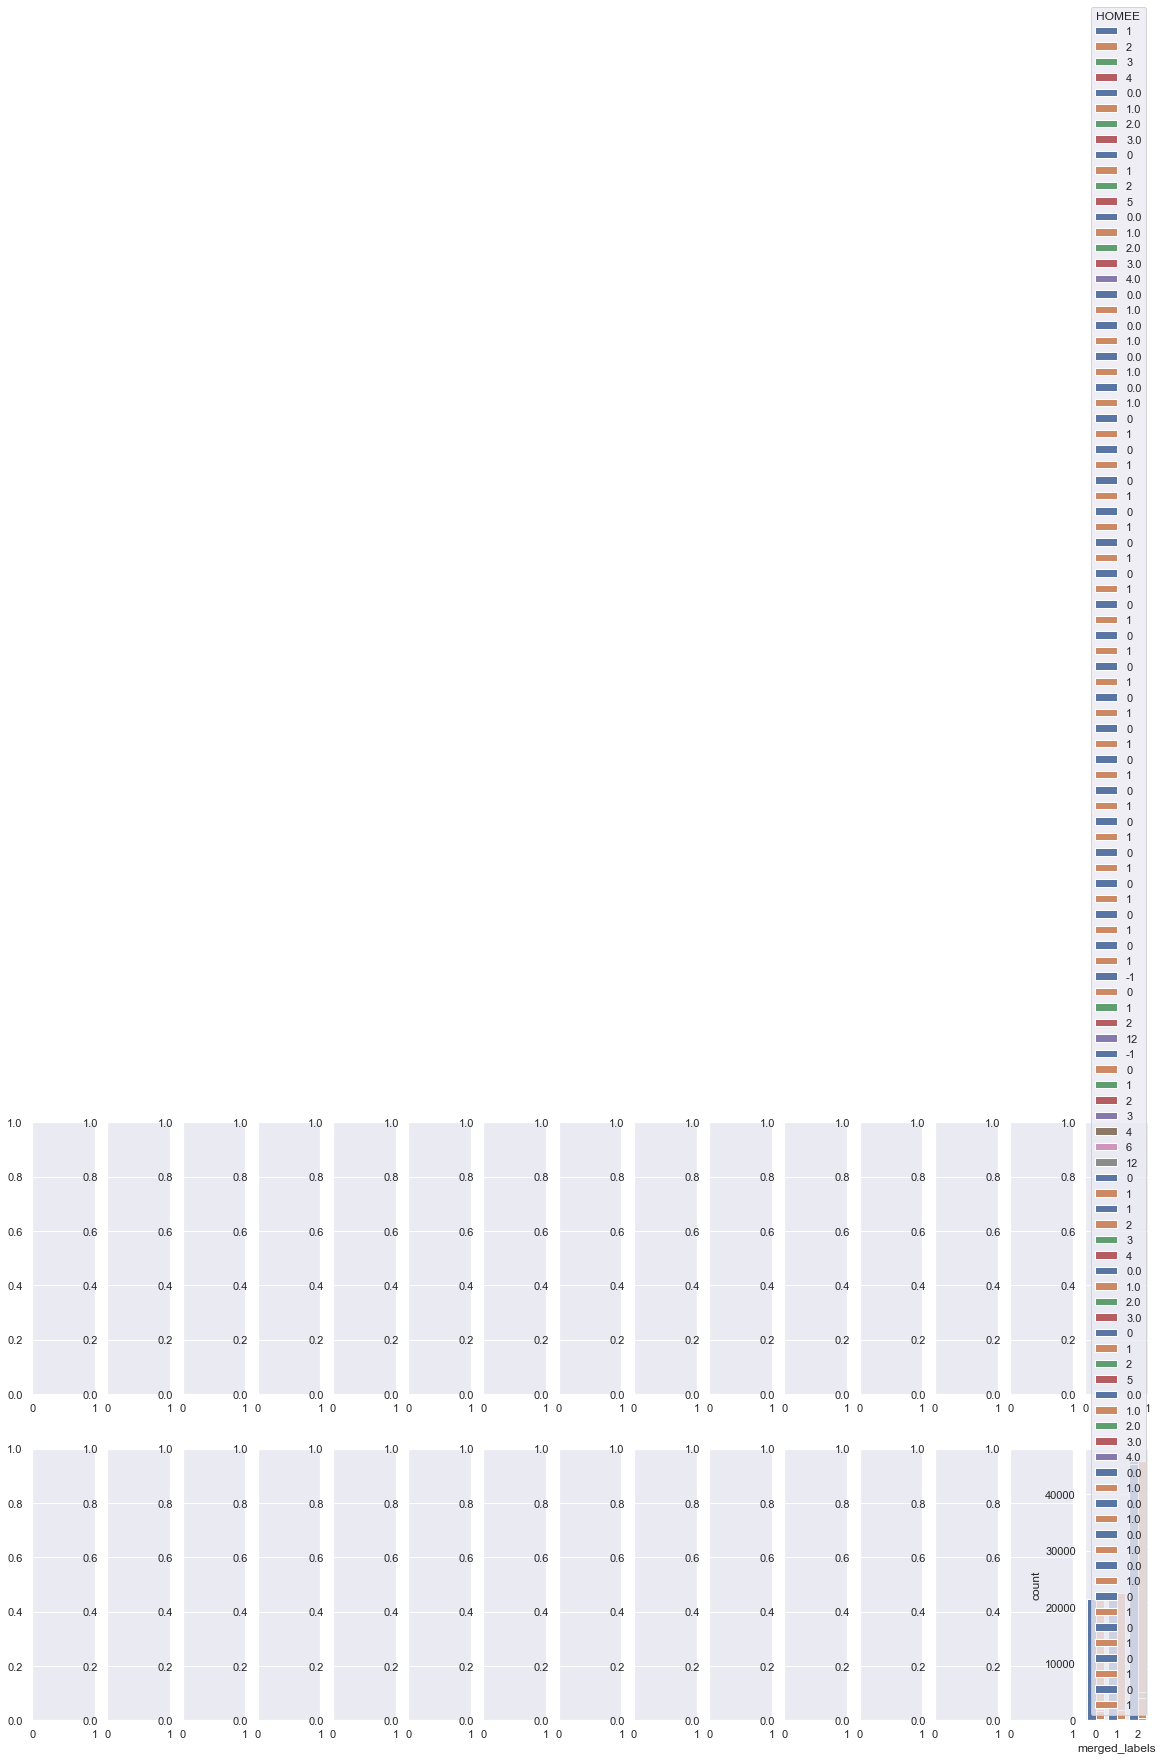

None


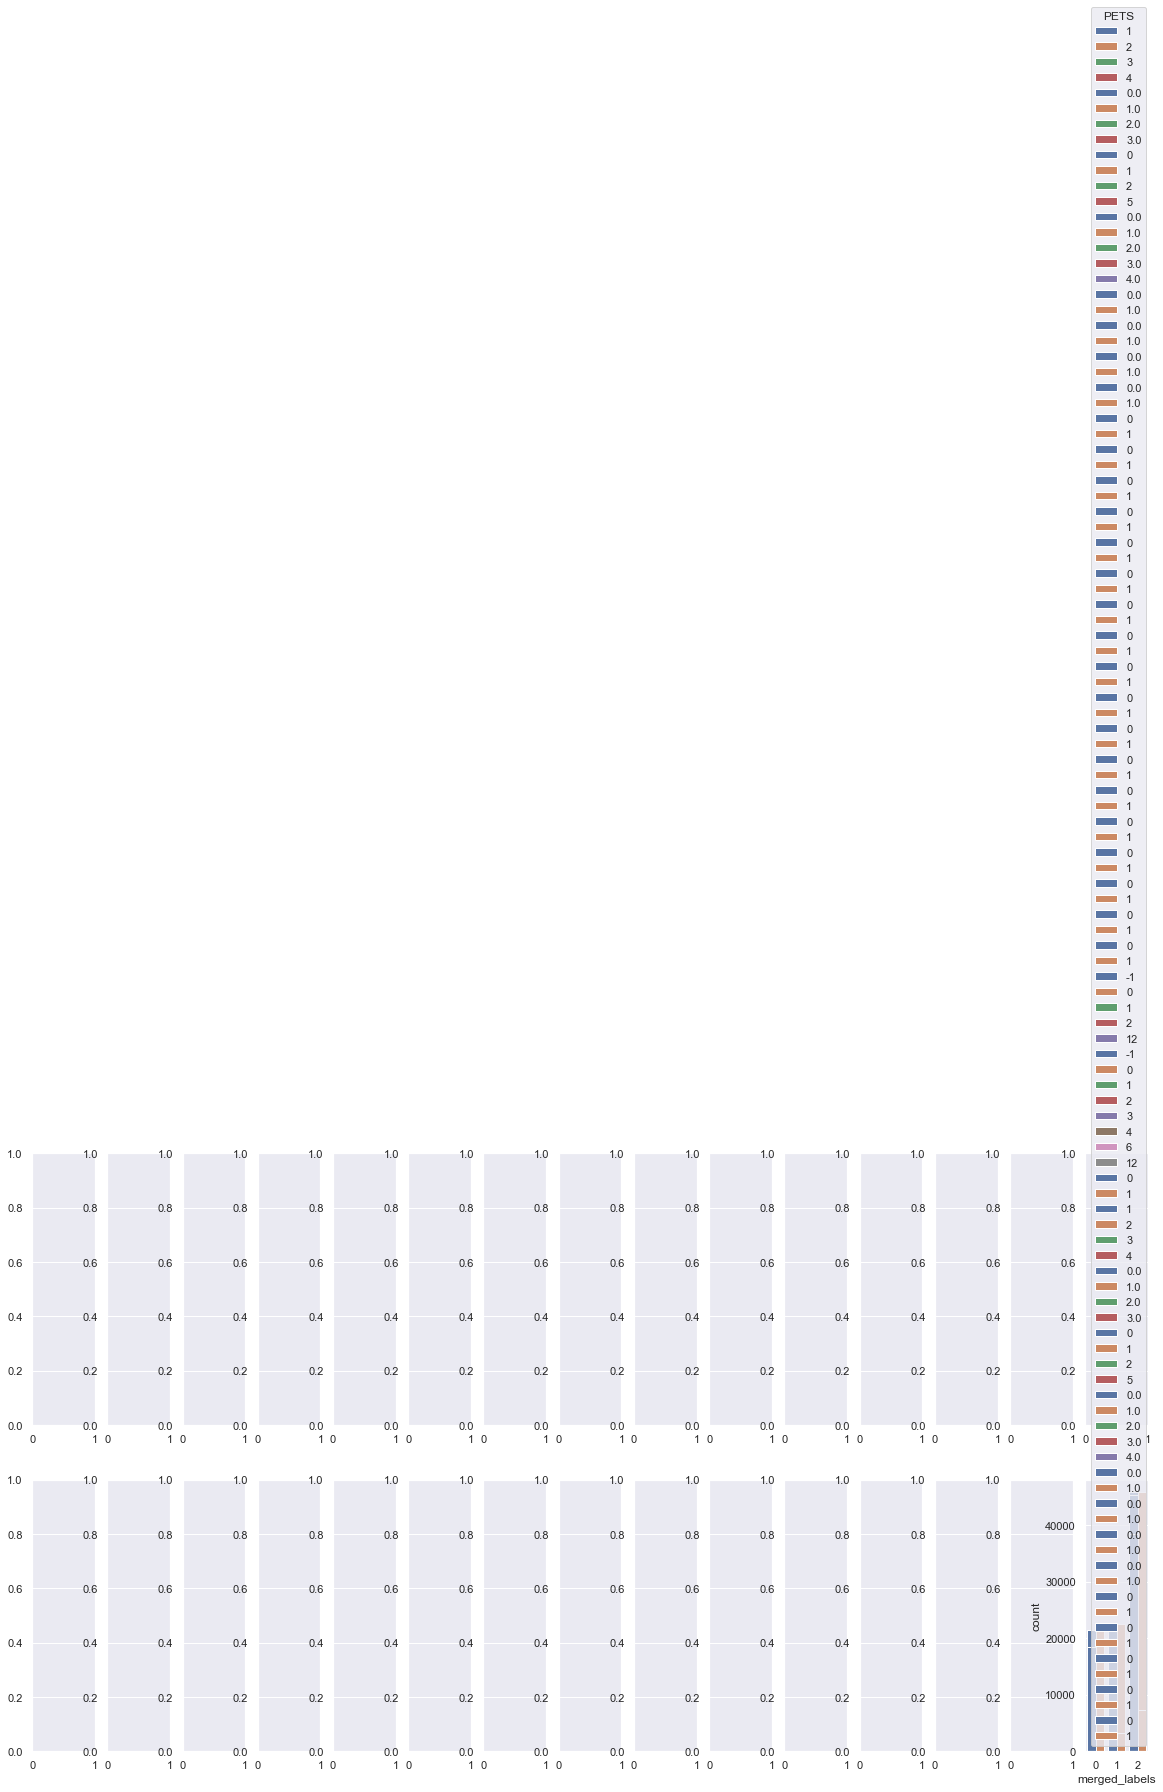

None


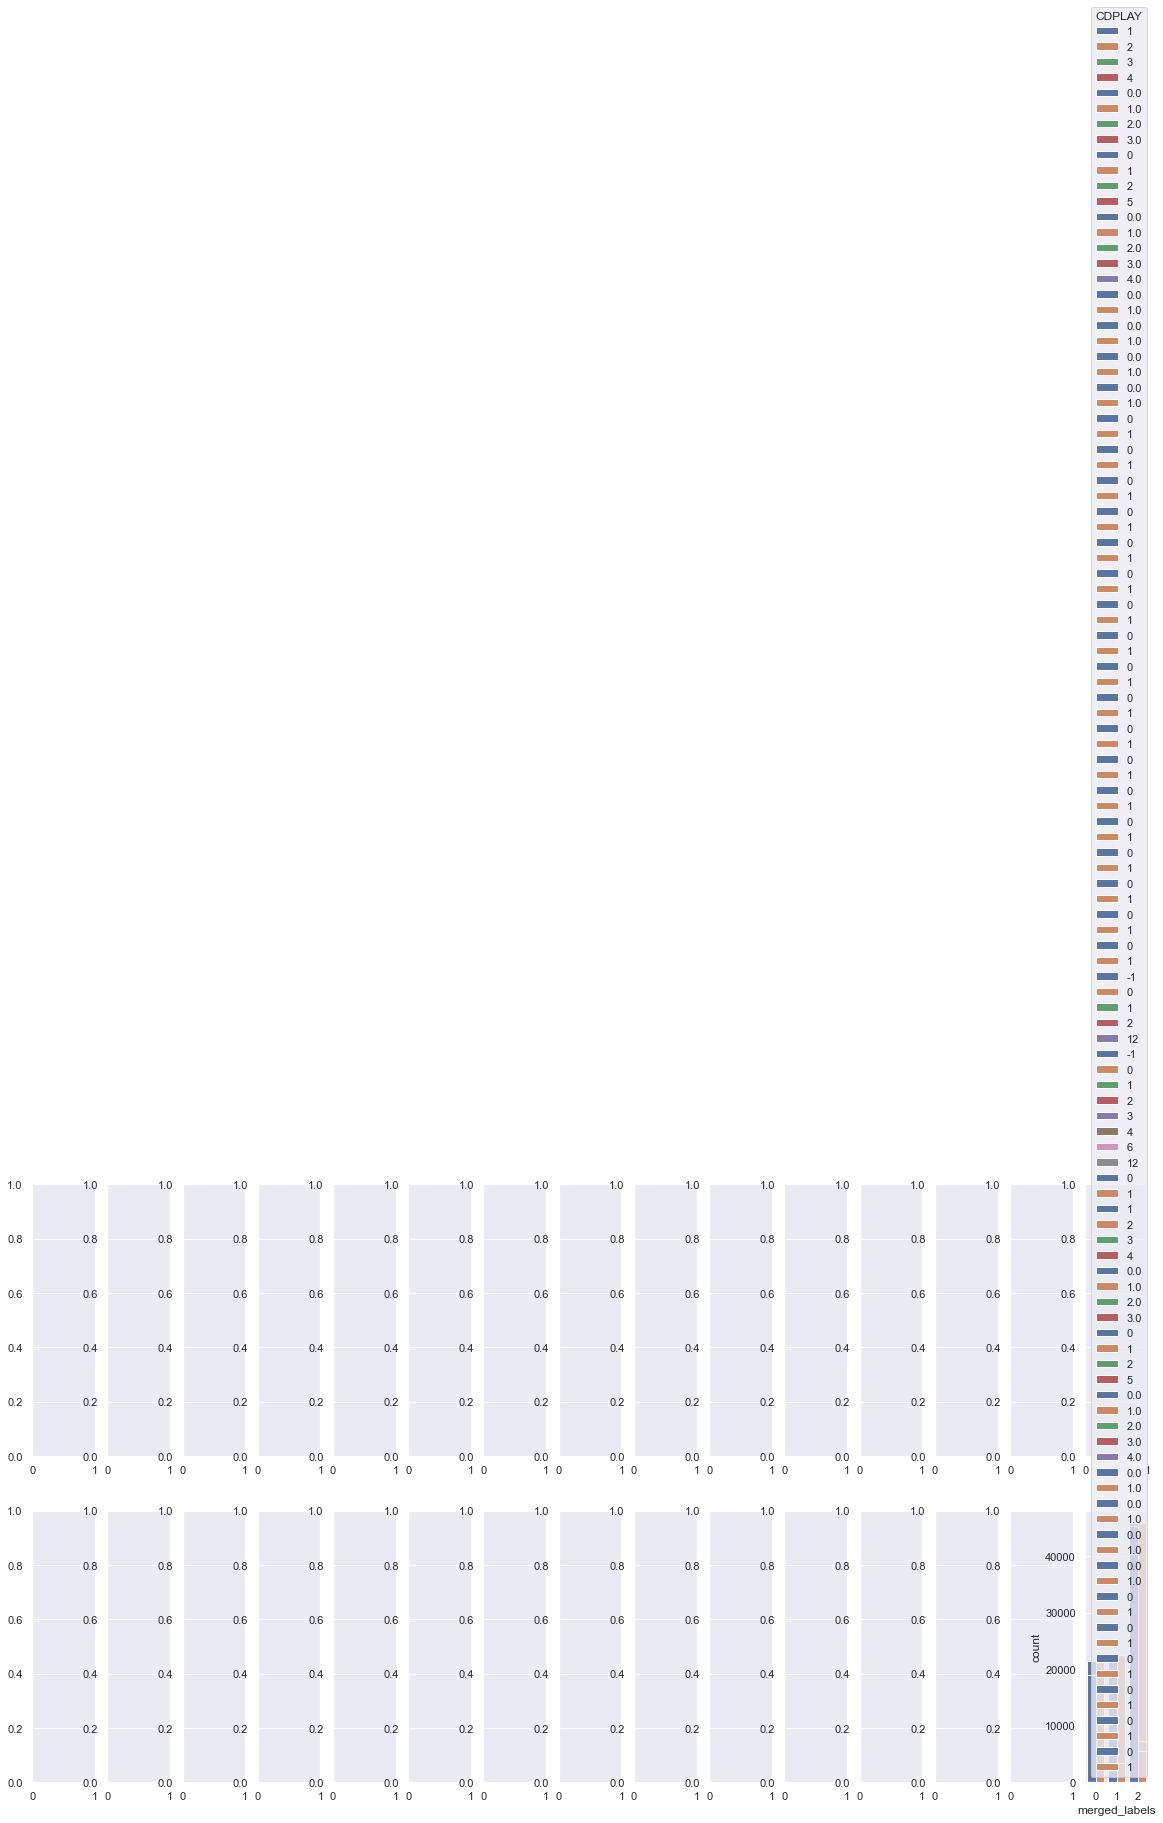

None


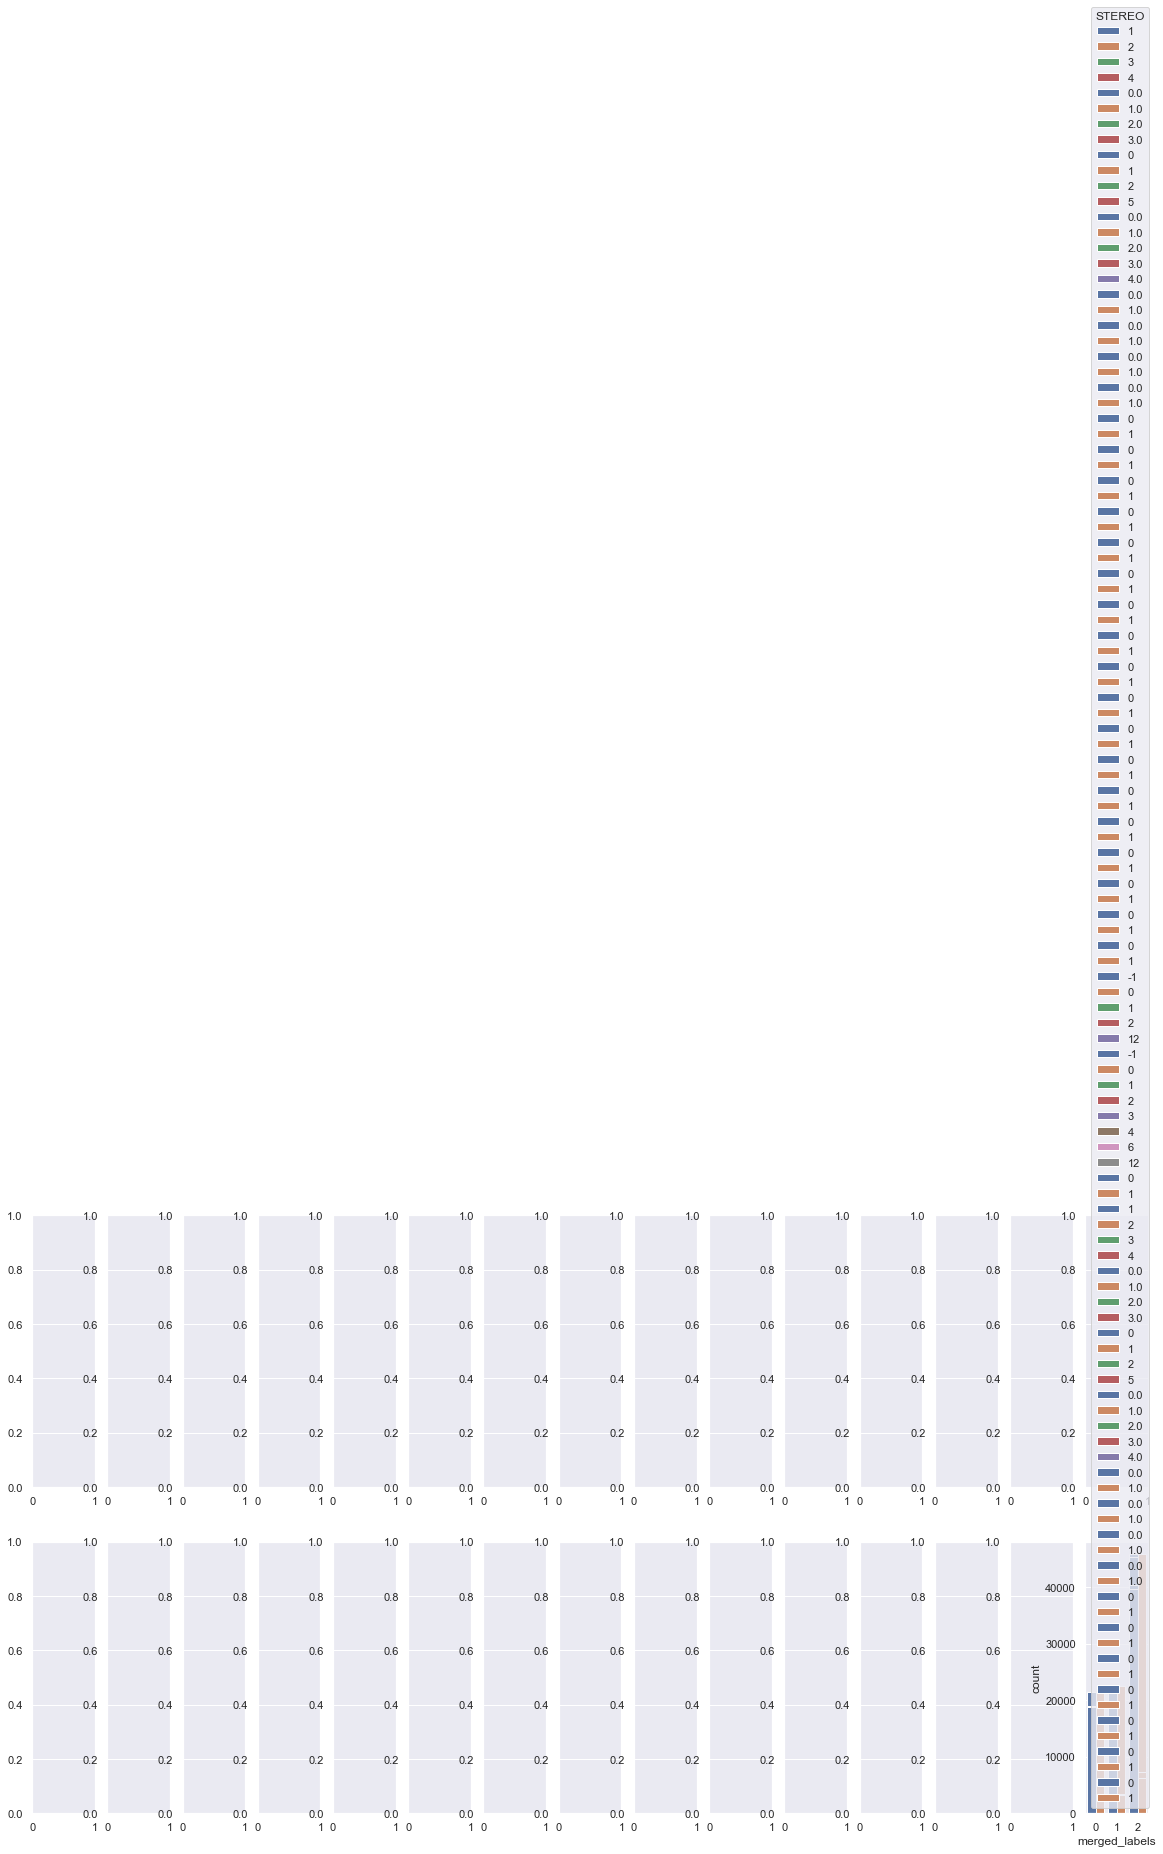

None


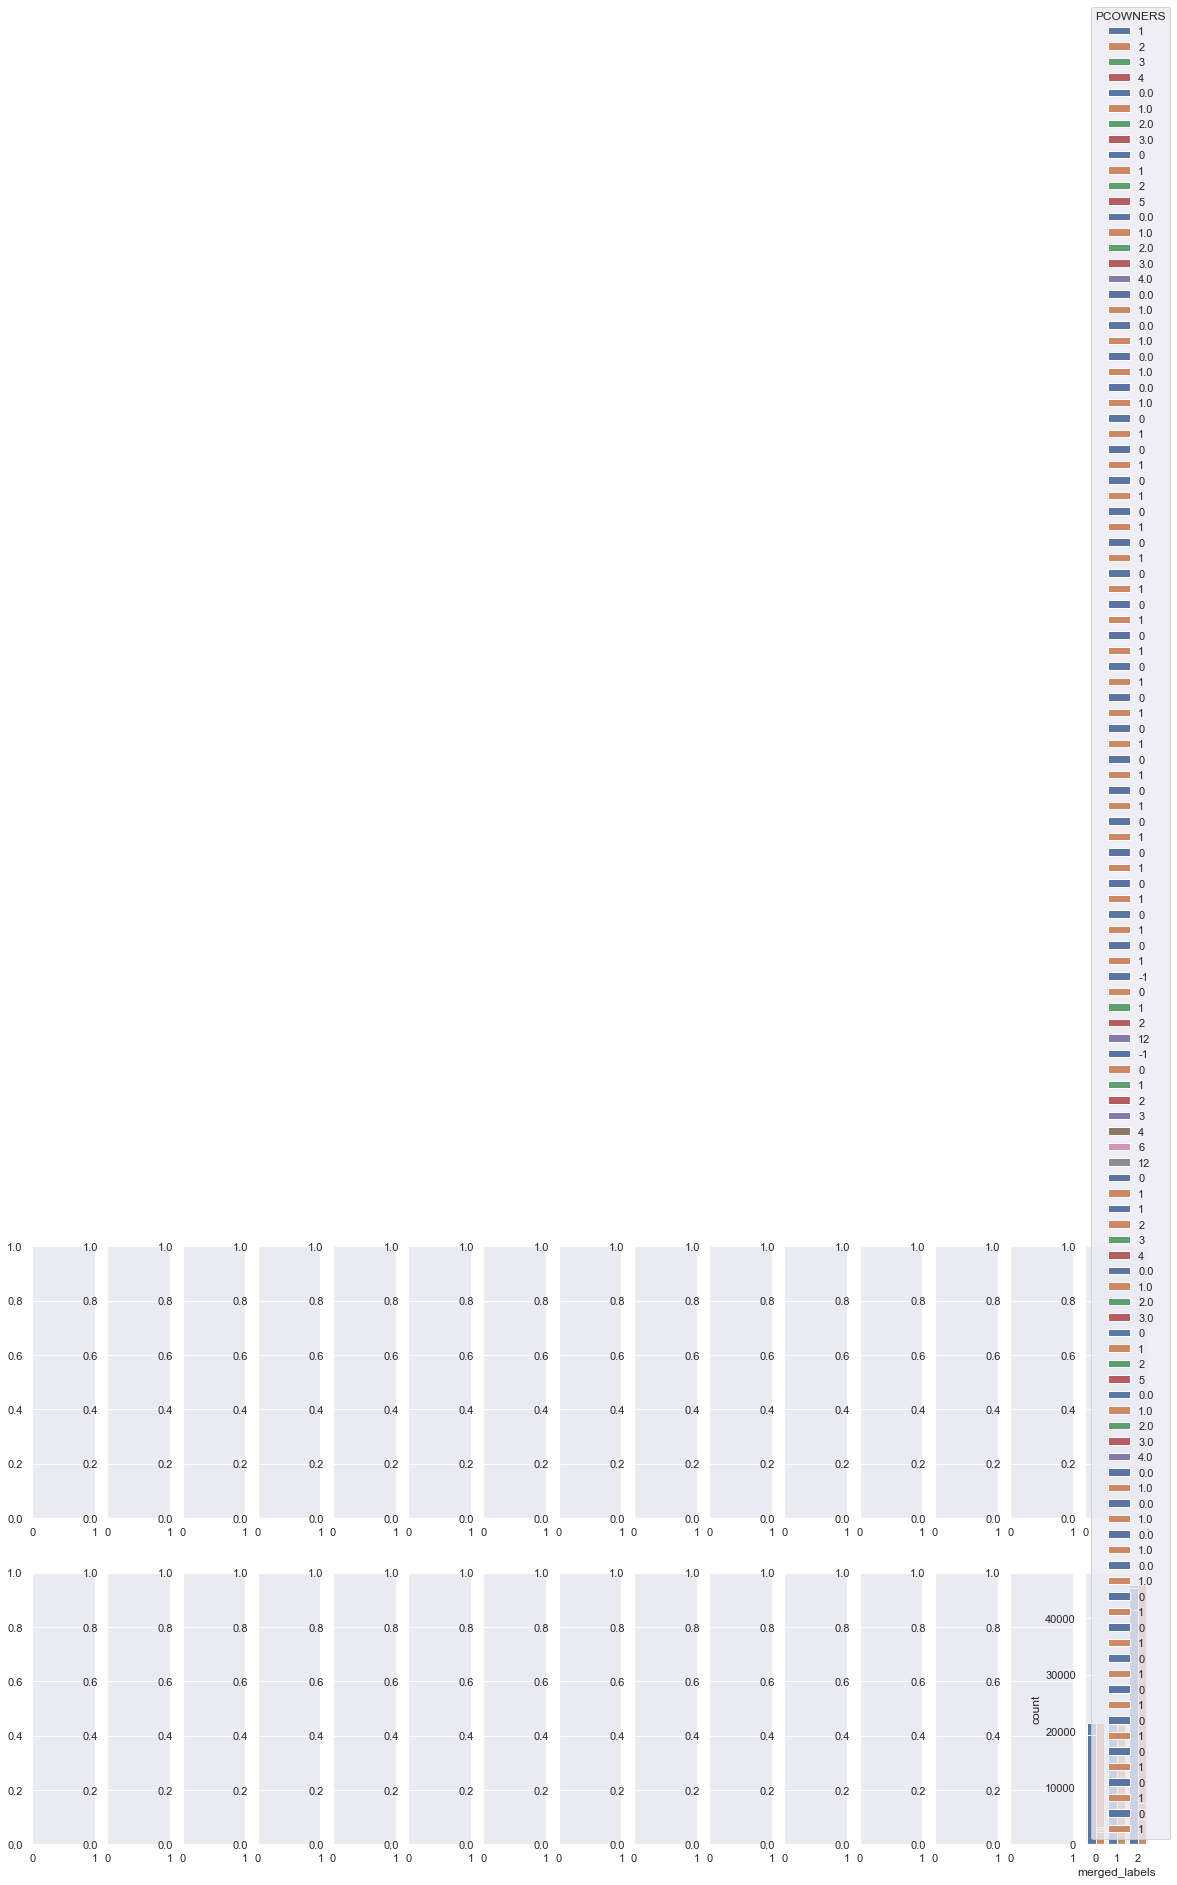

None


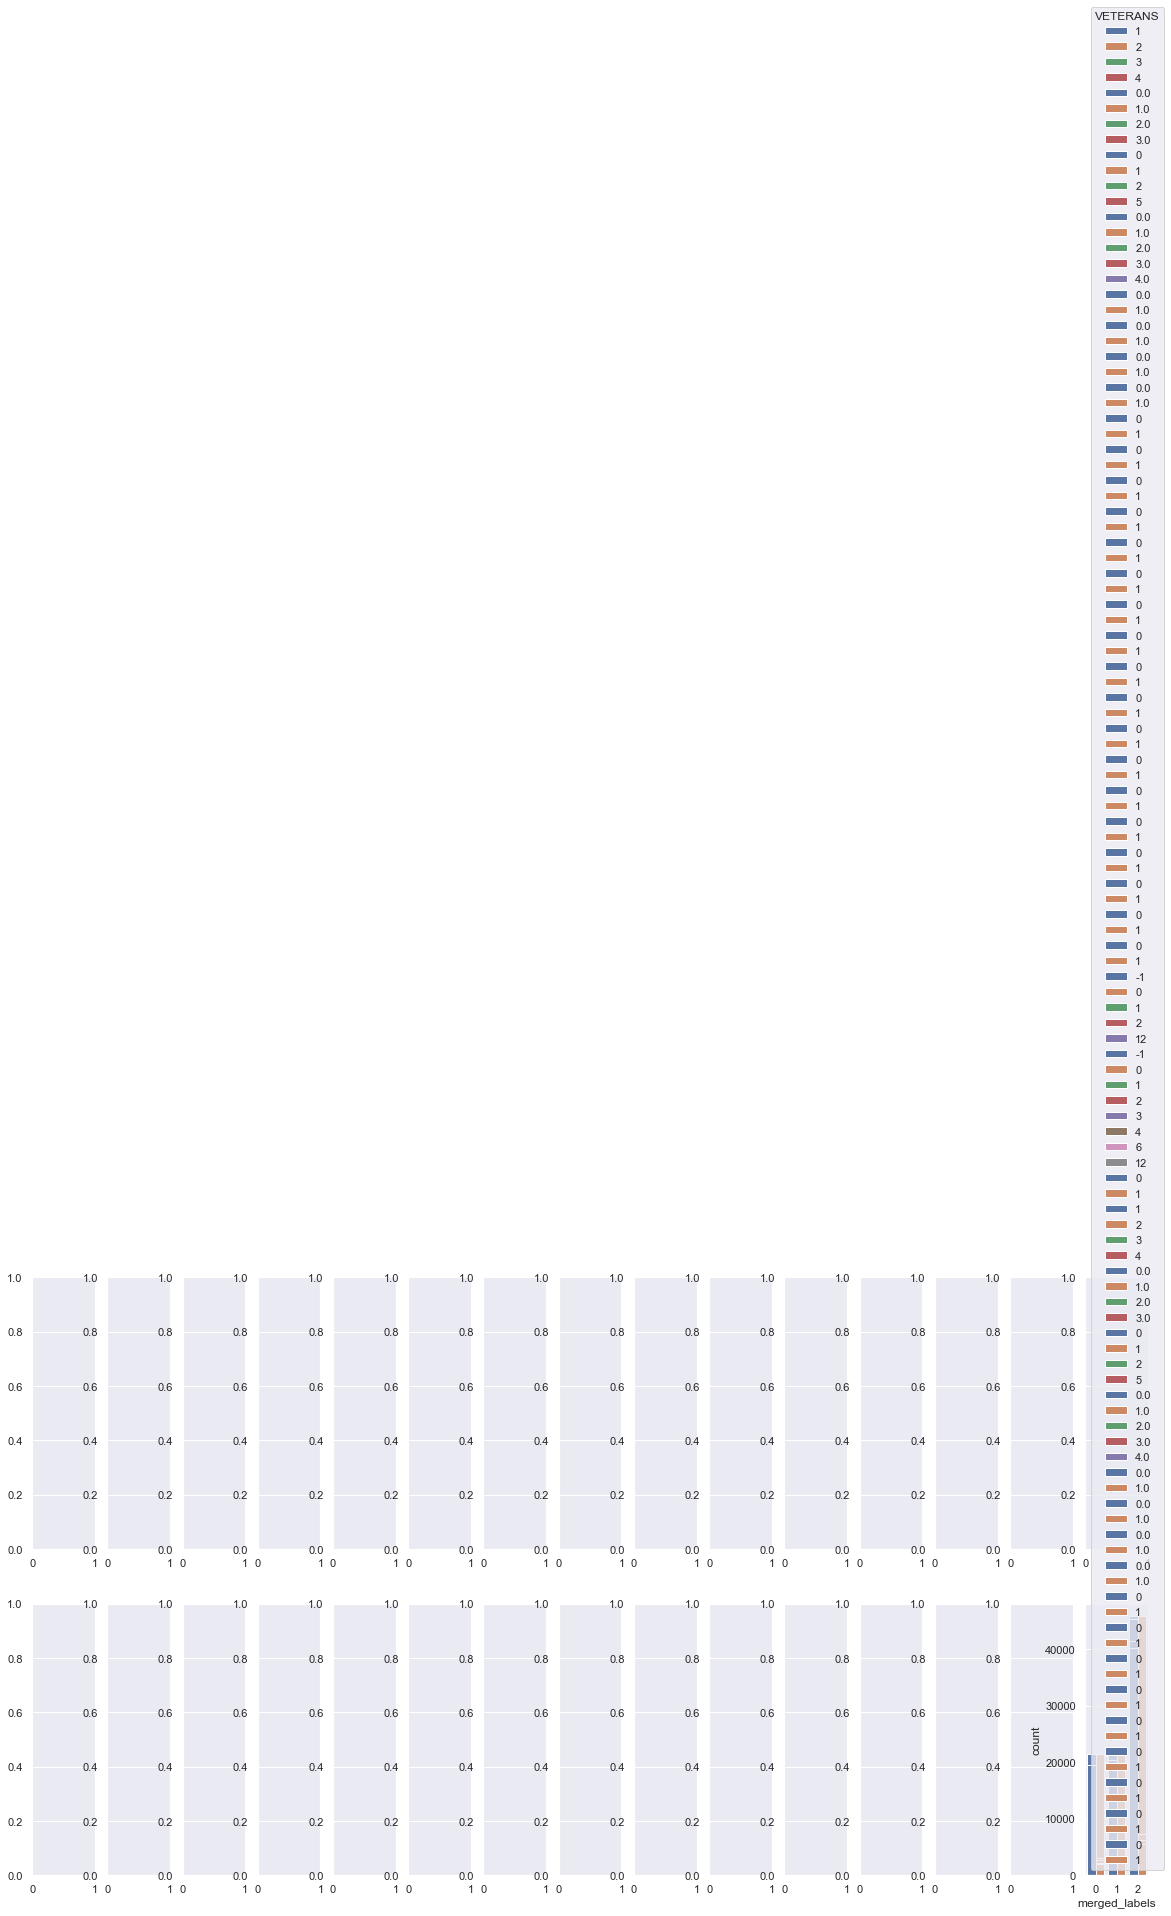

None


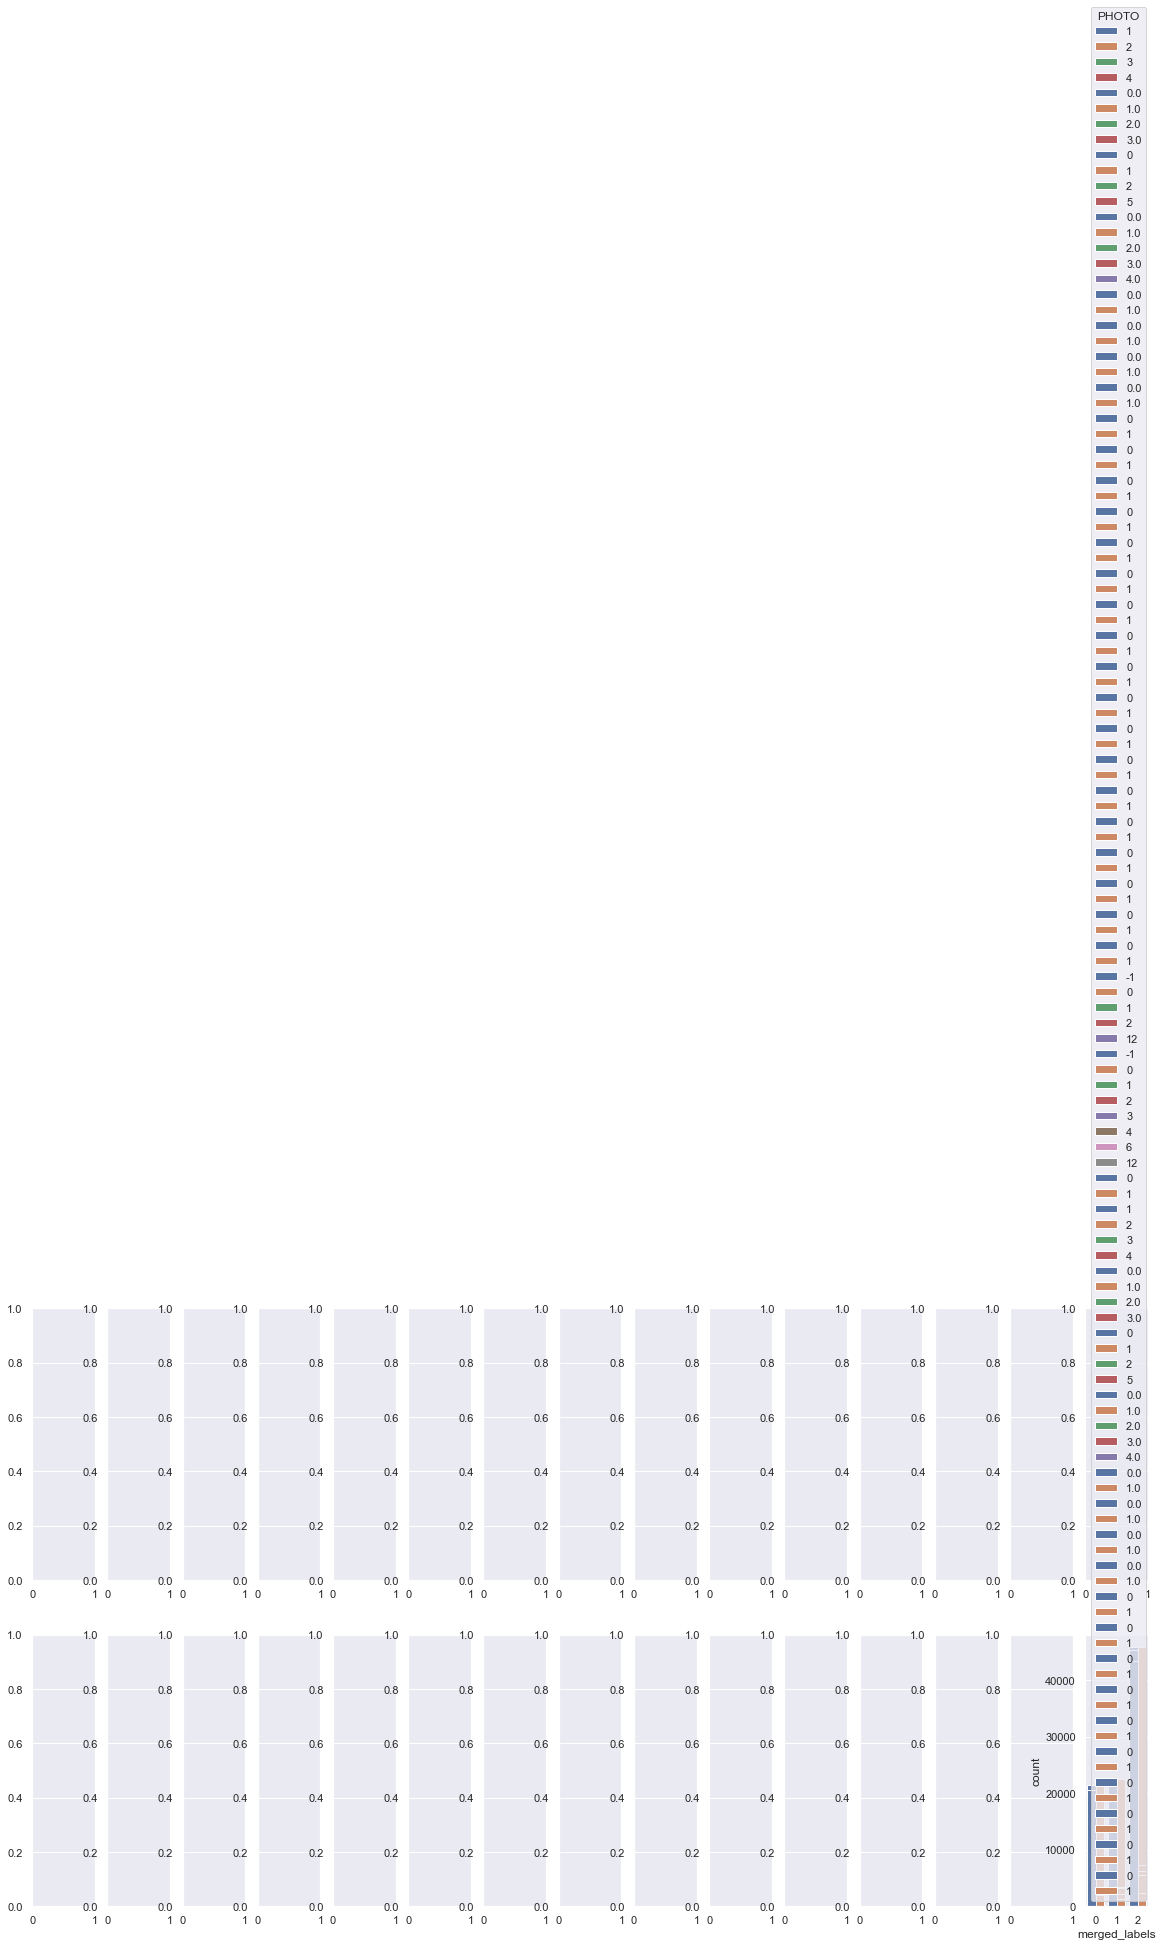

None


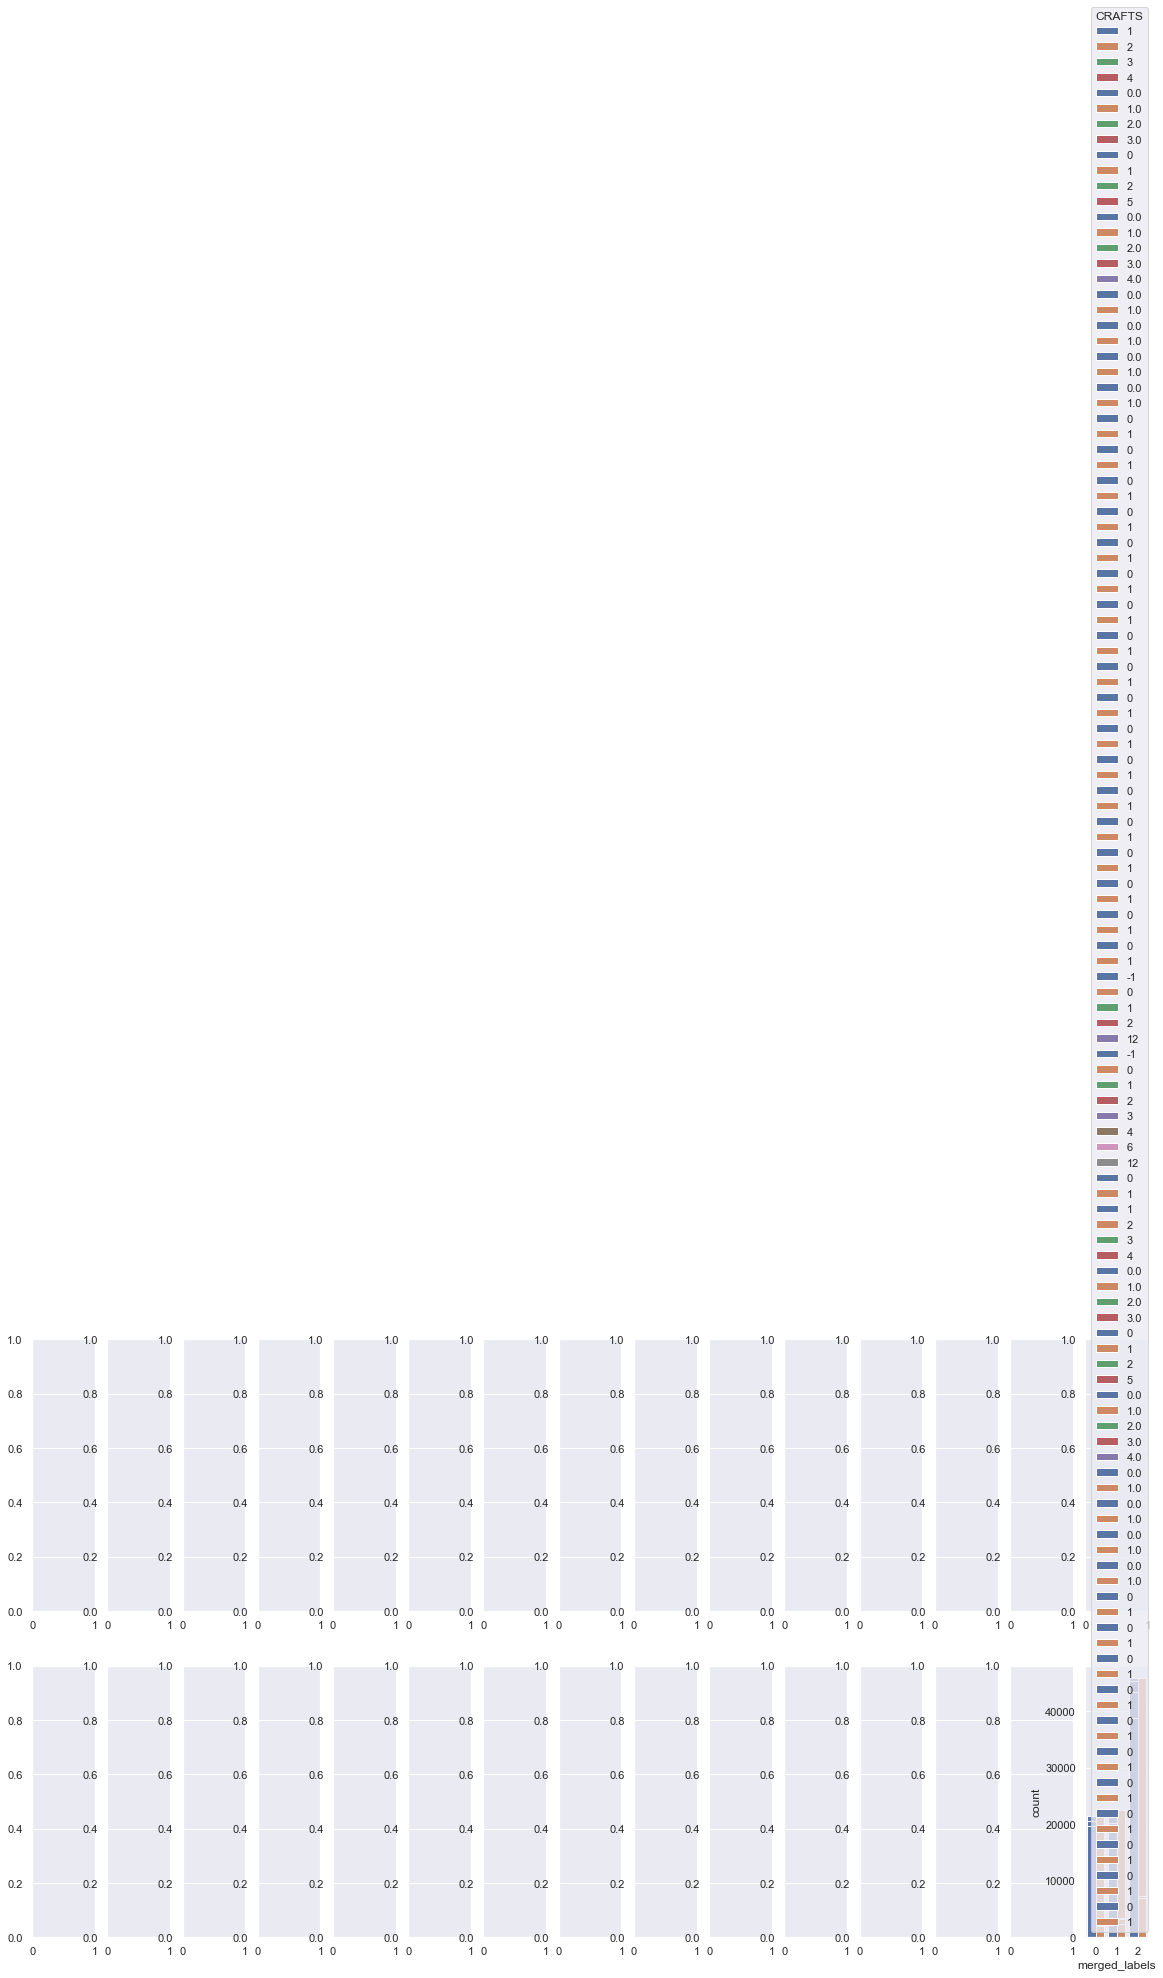

None


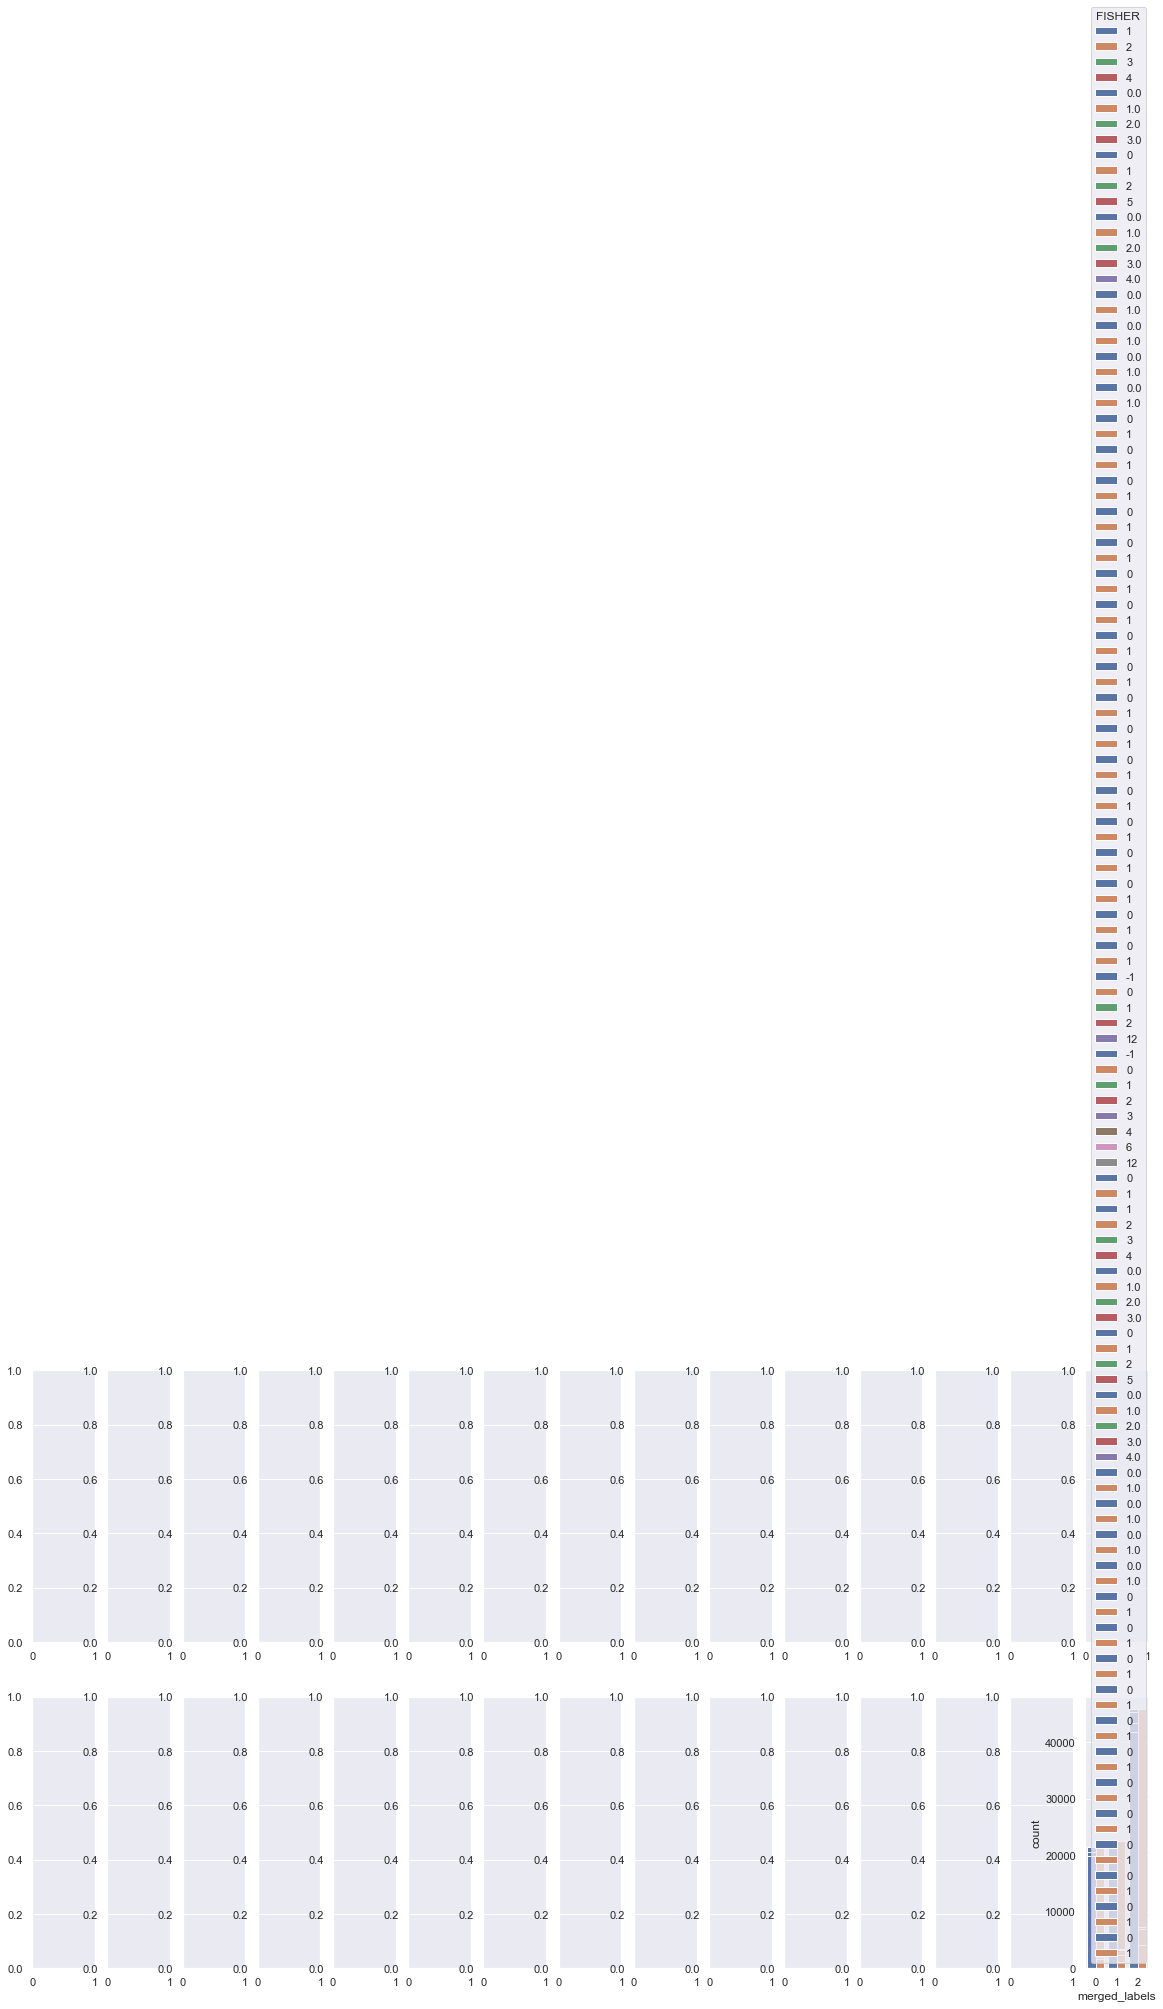

None


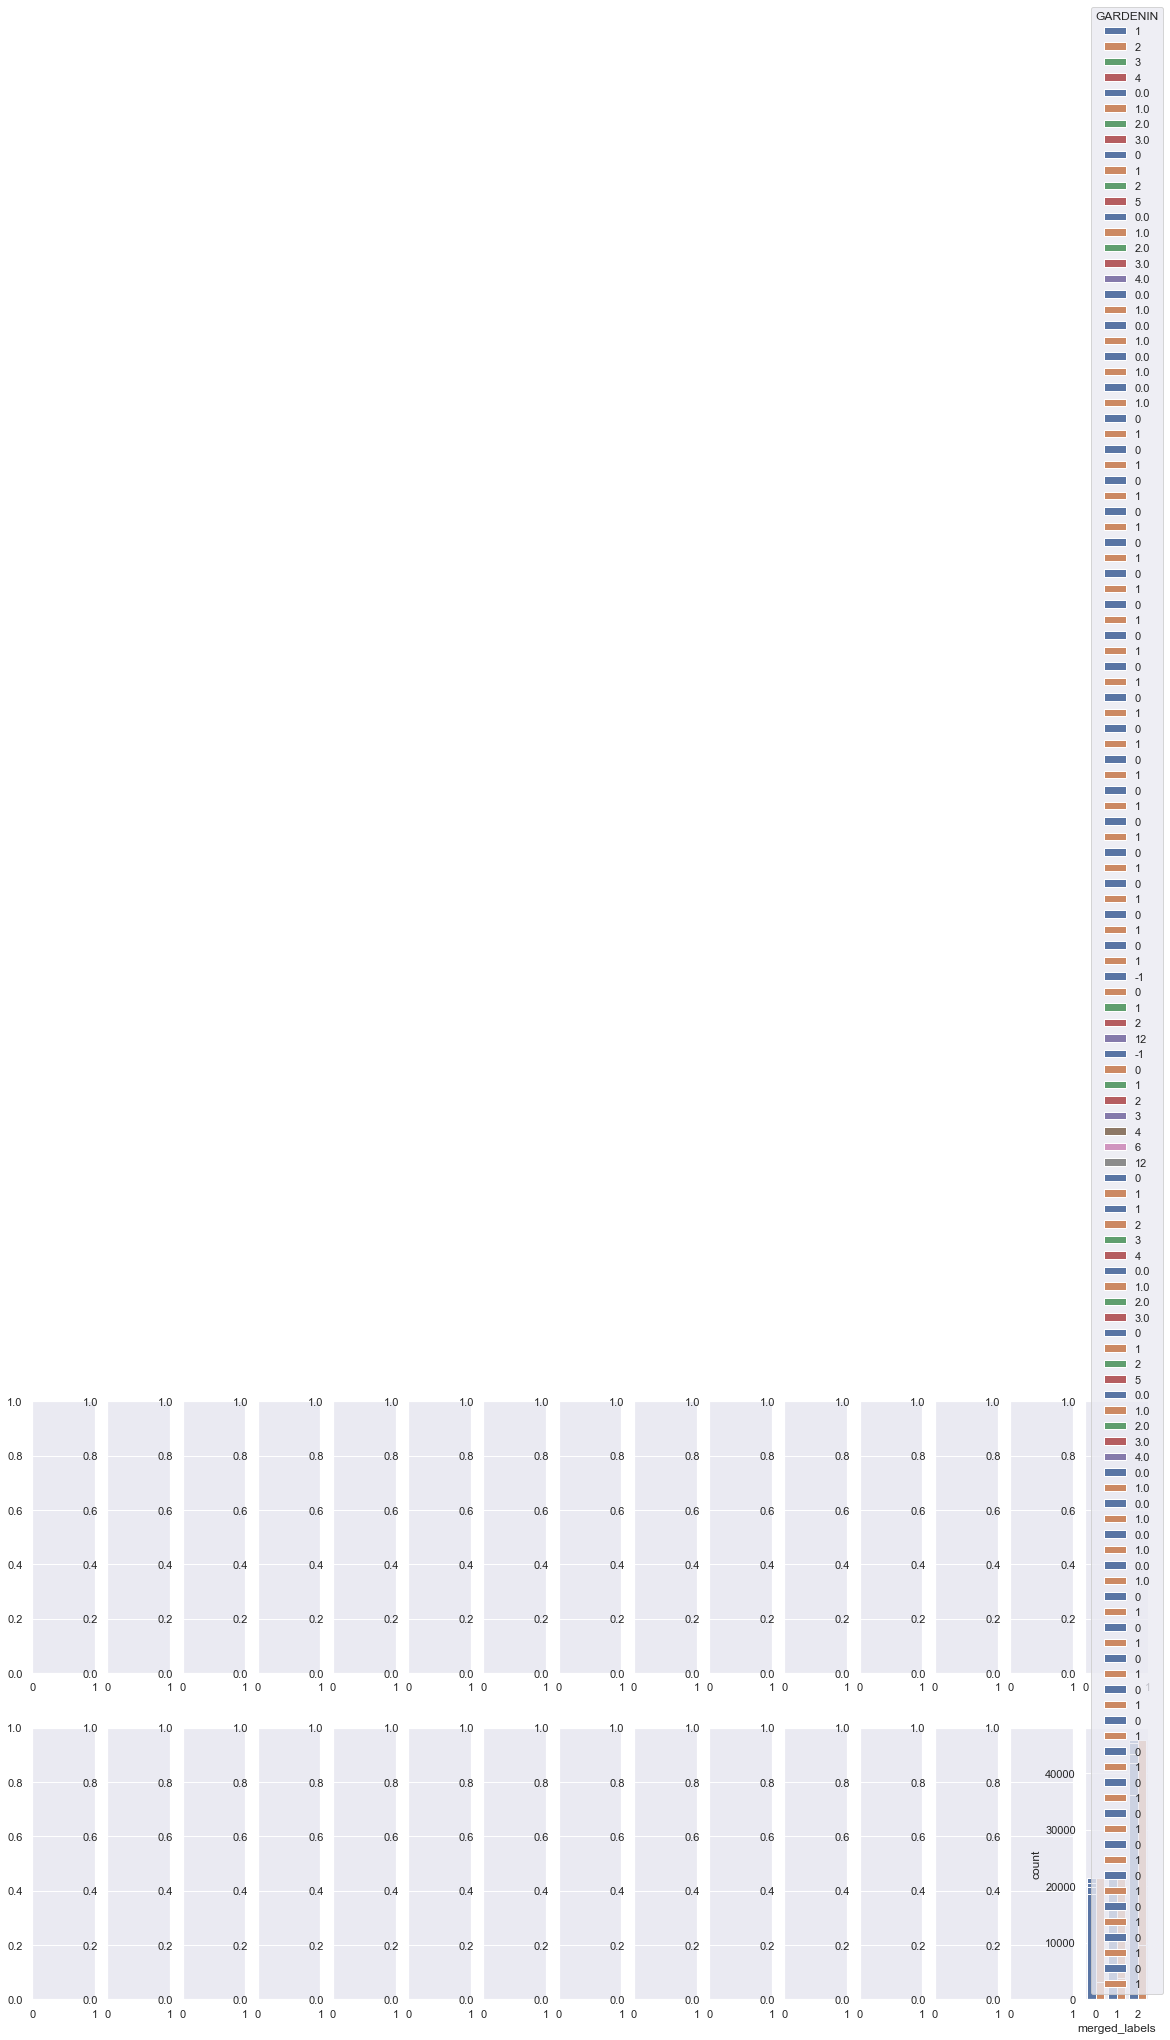

None


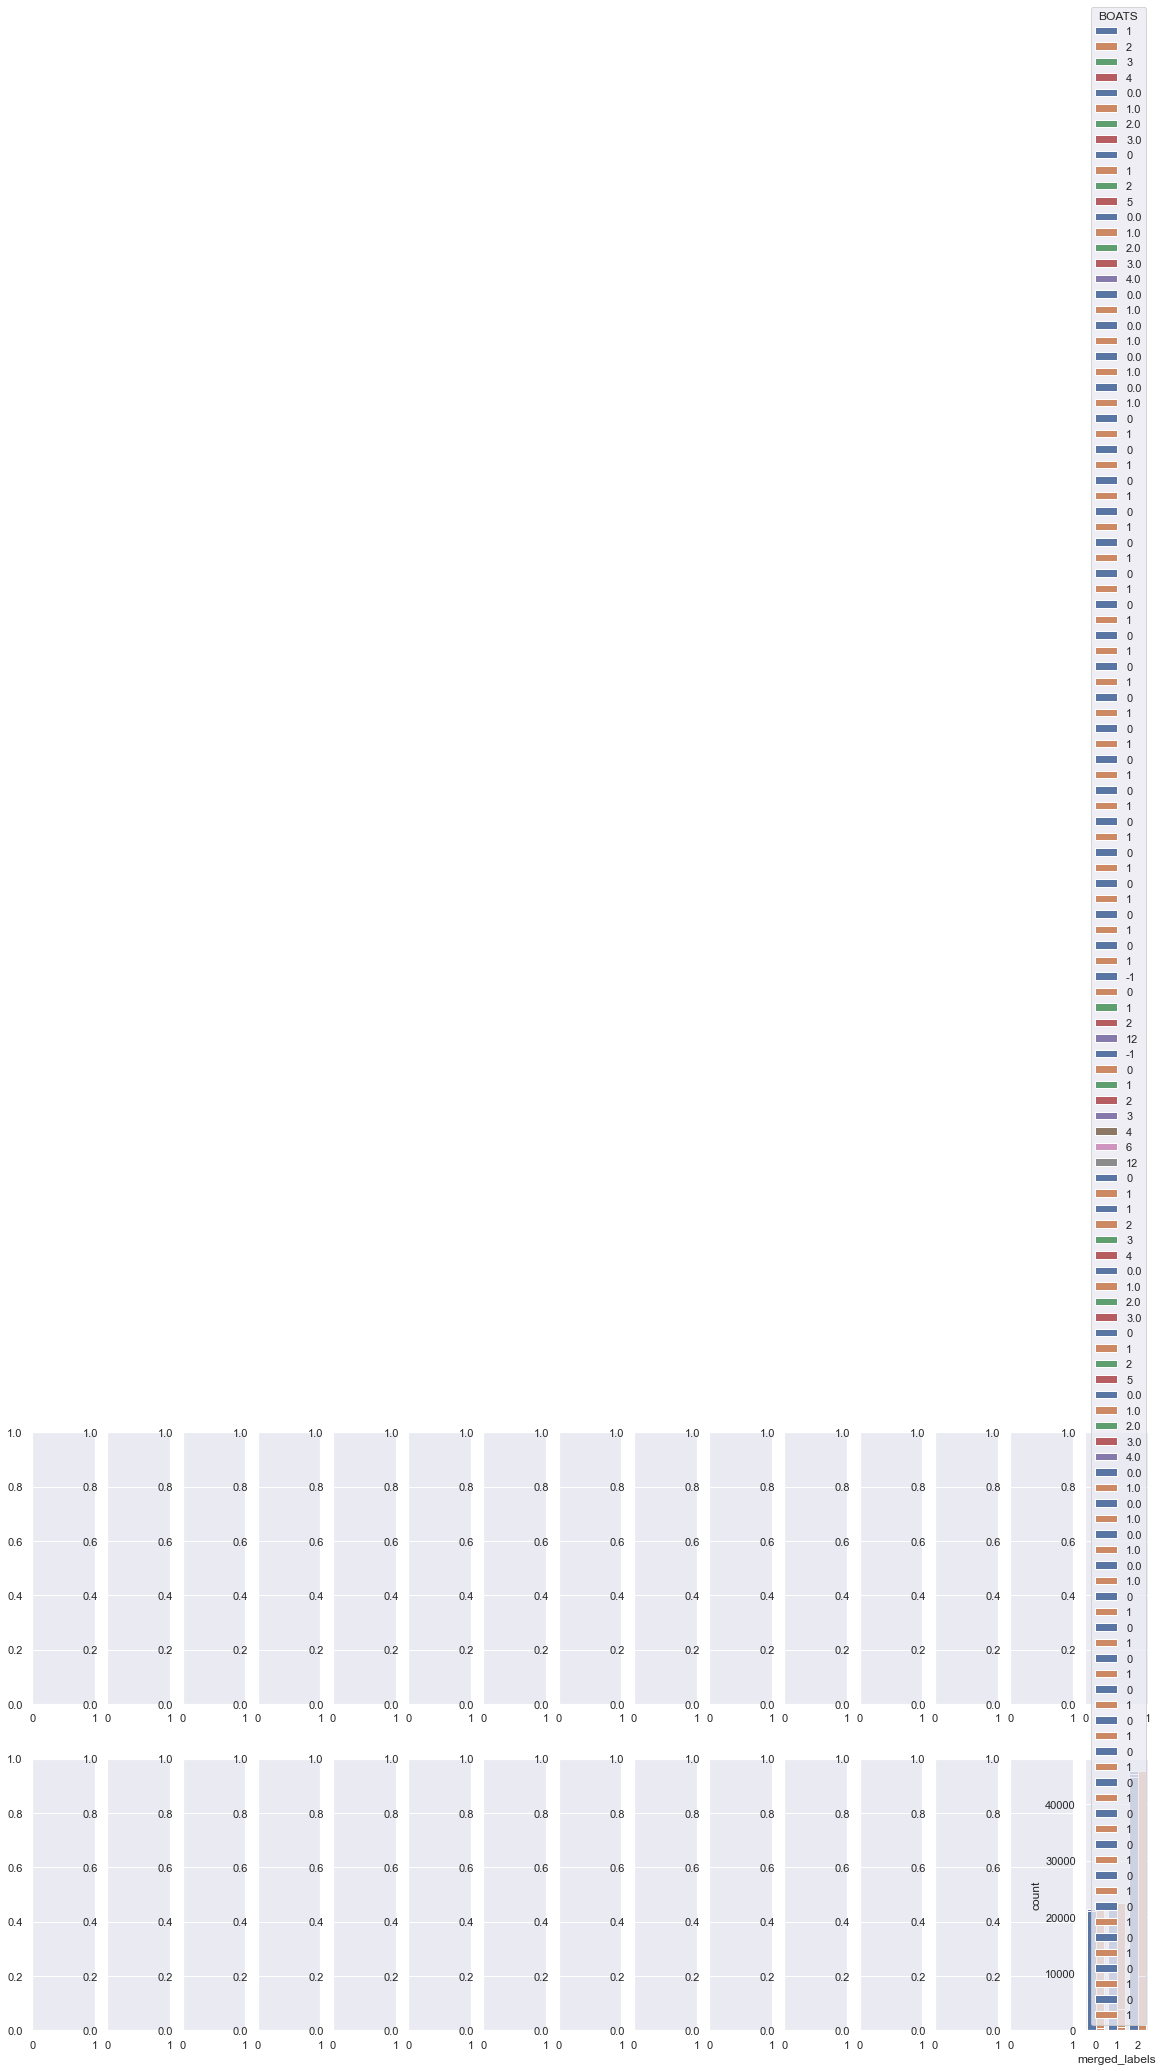

None


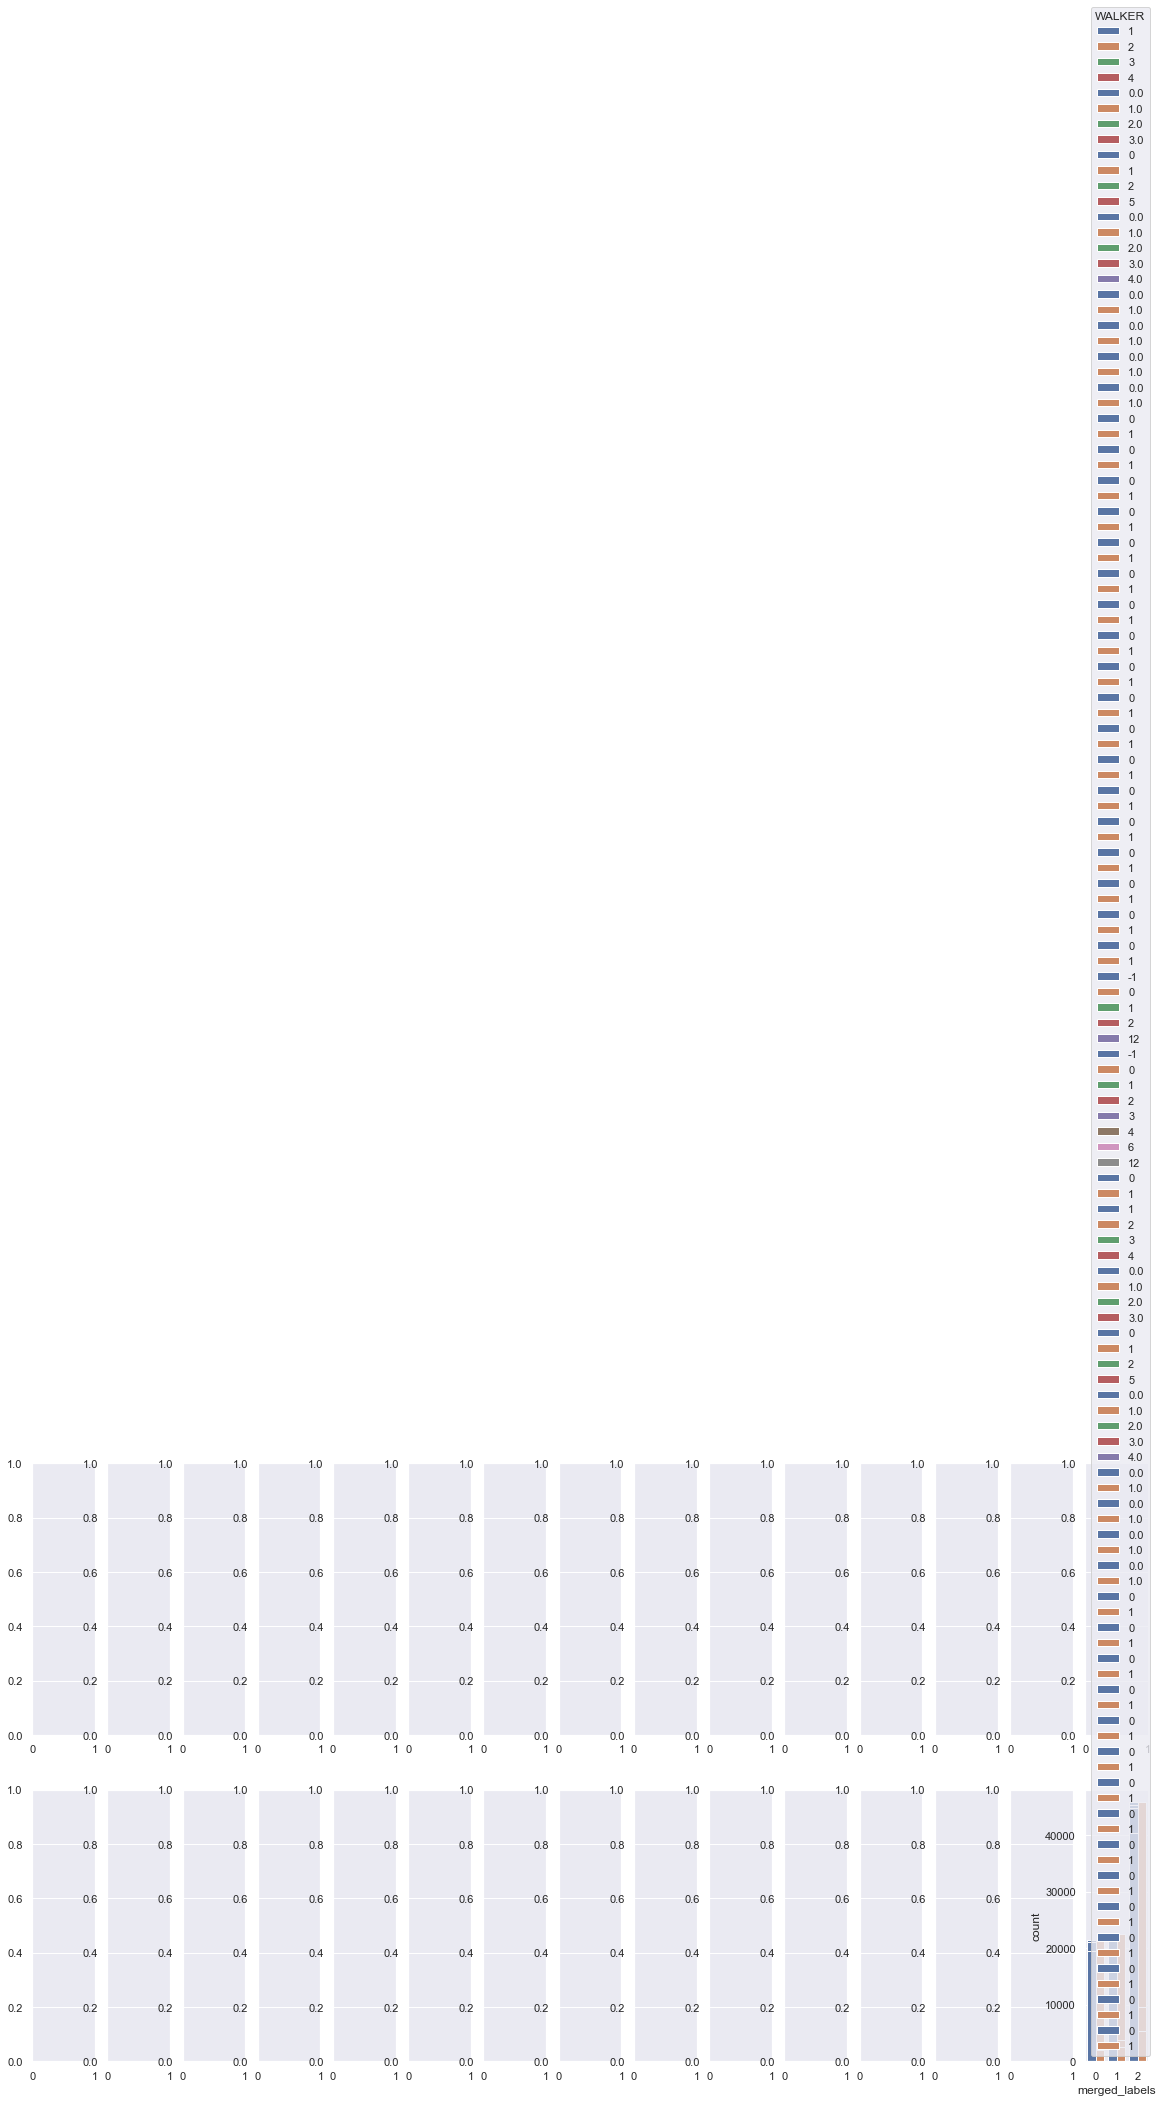

None


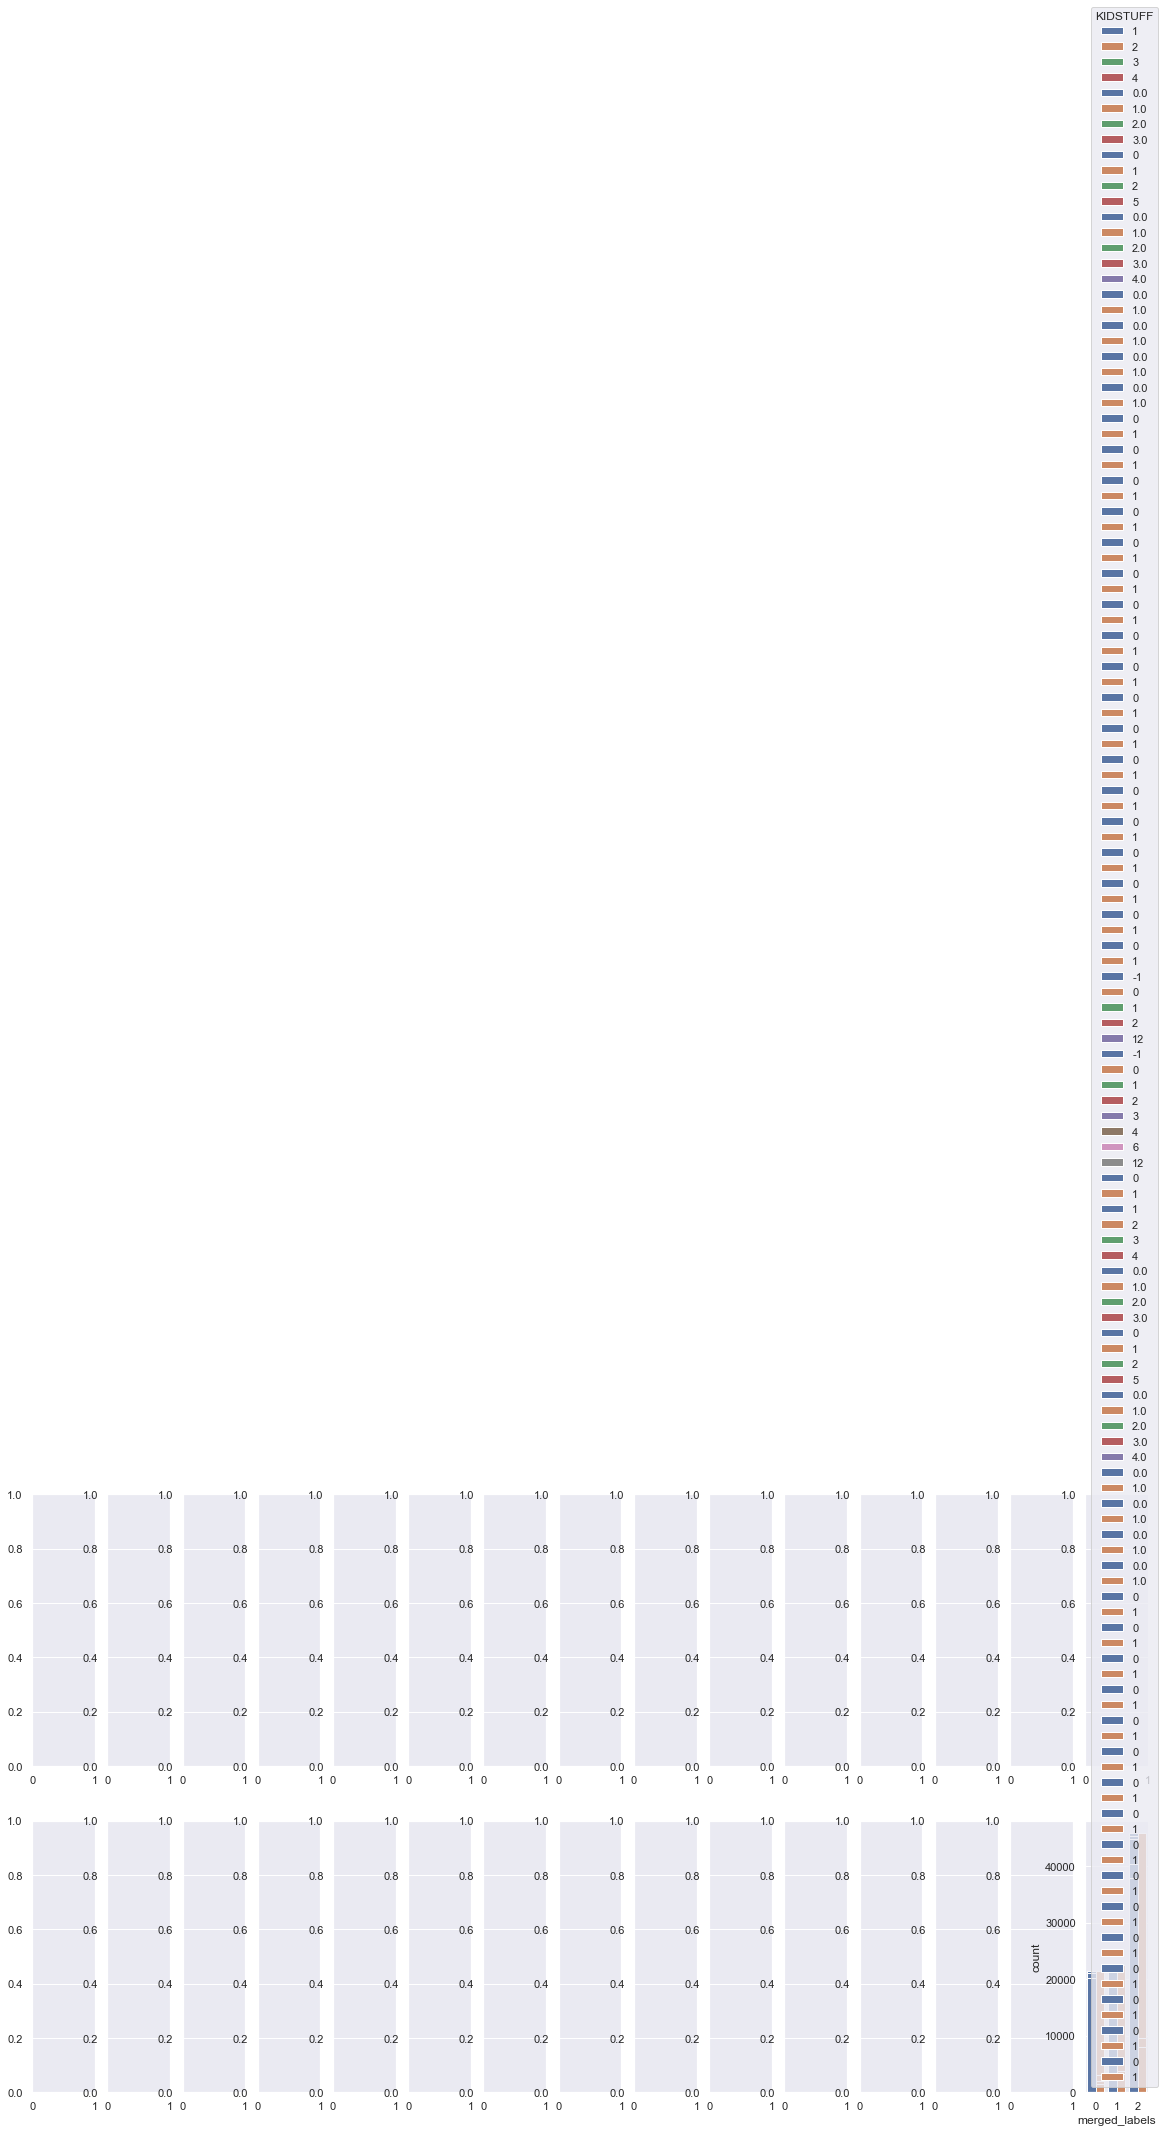

None


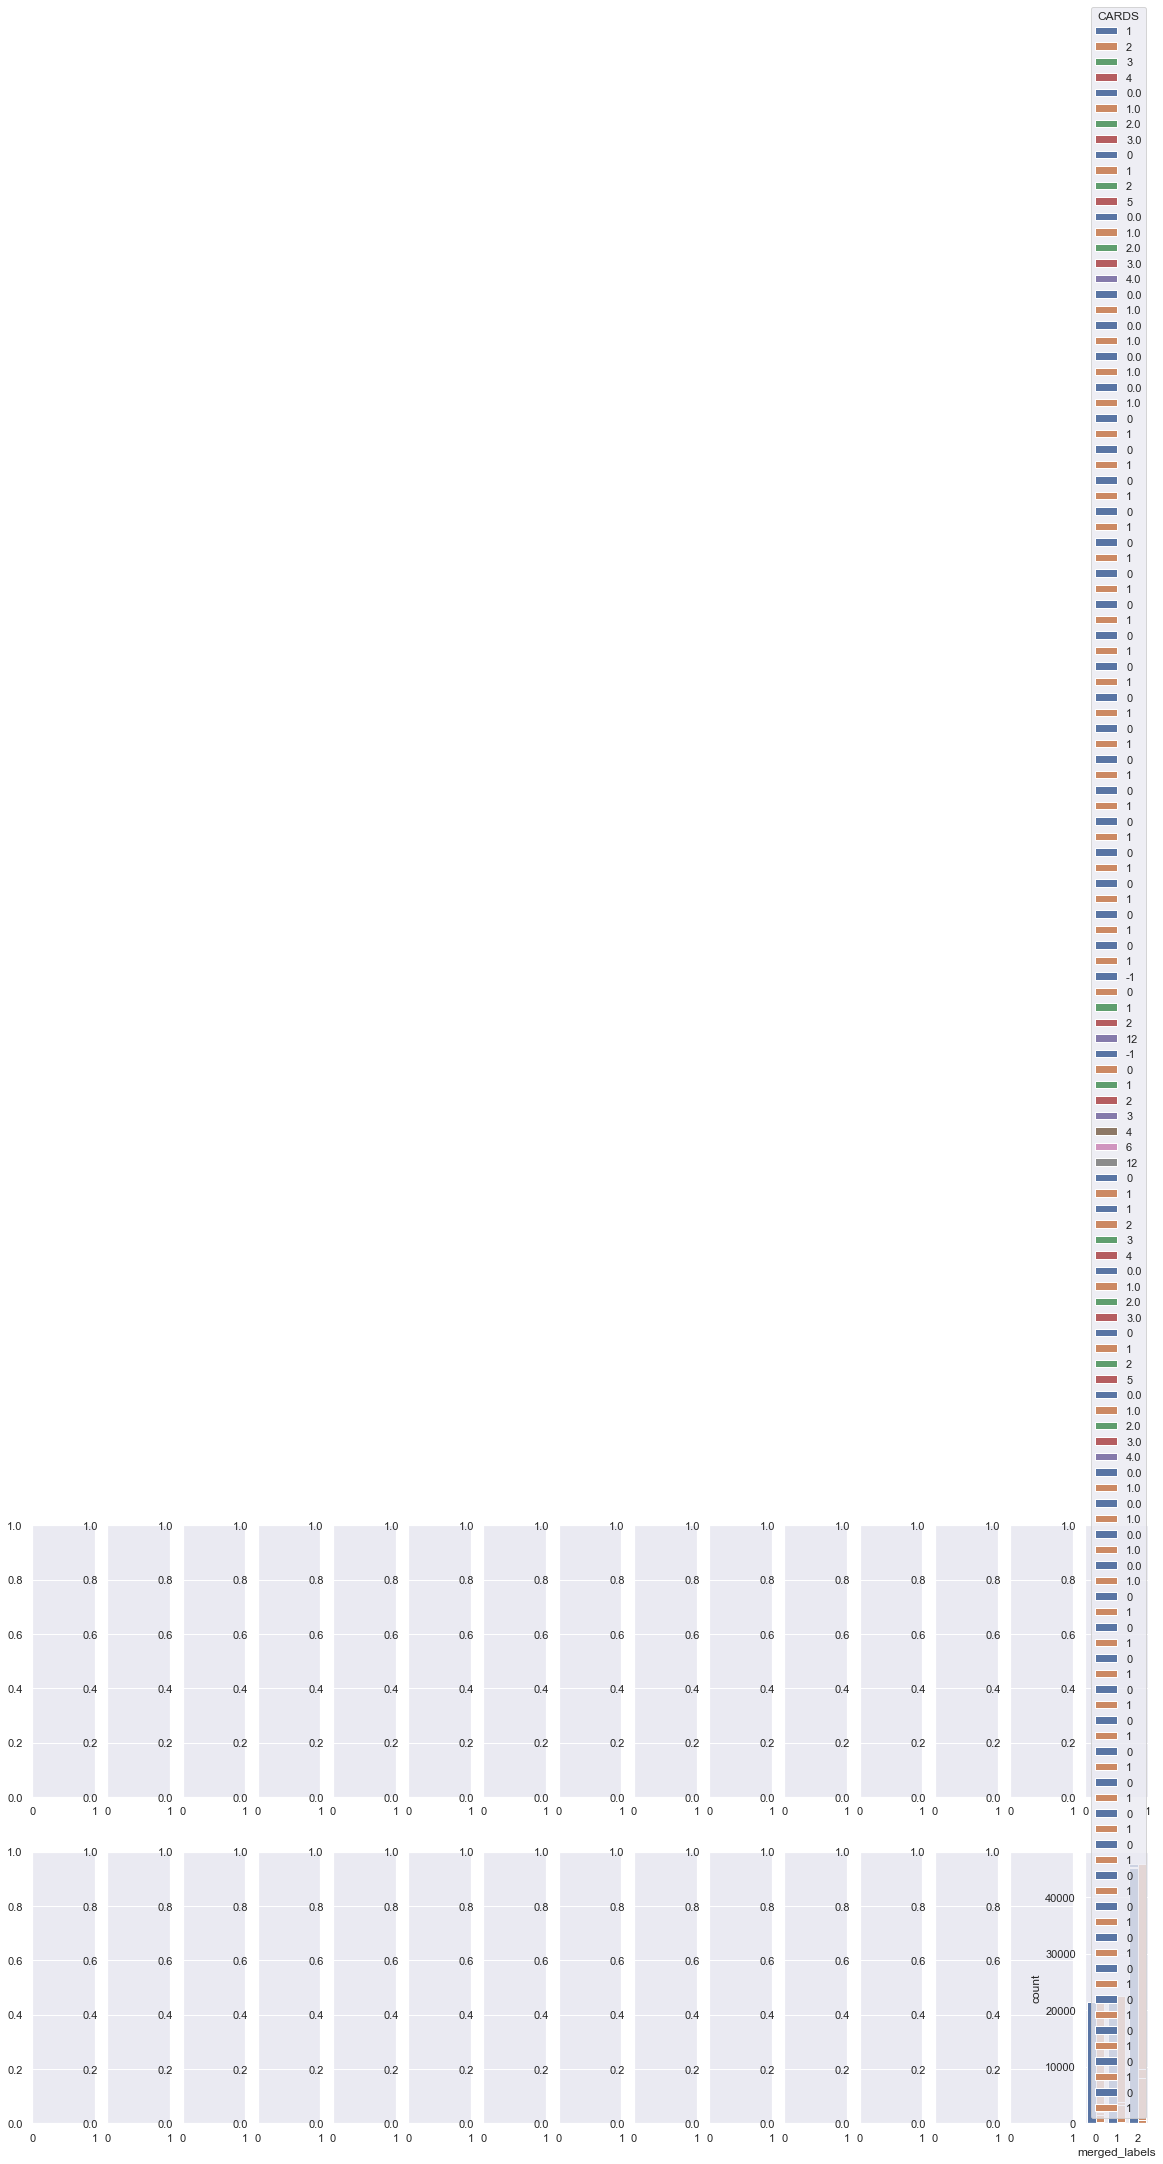

None


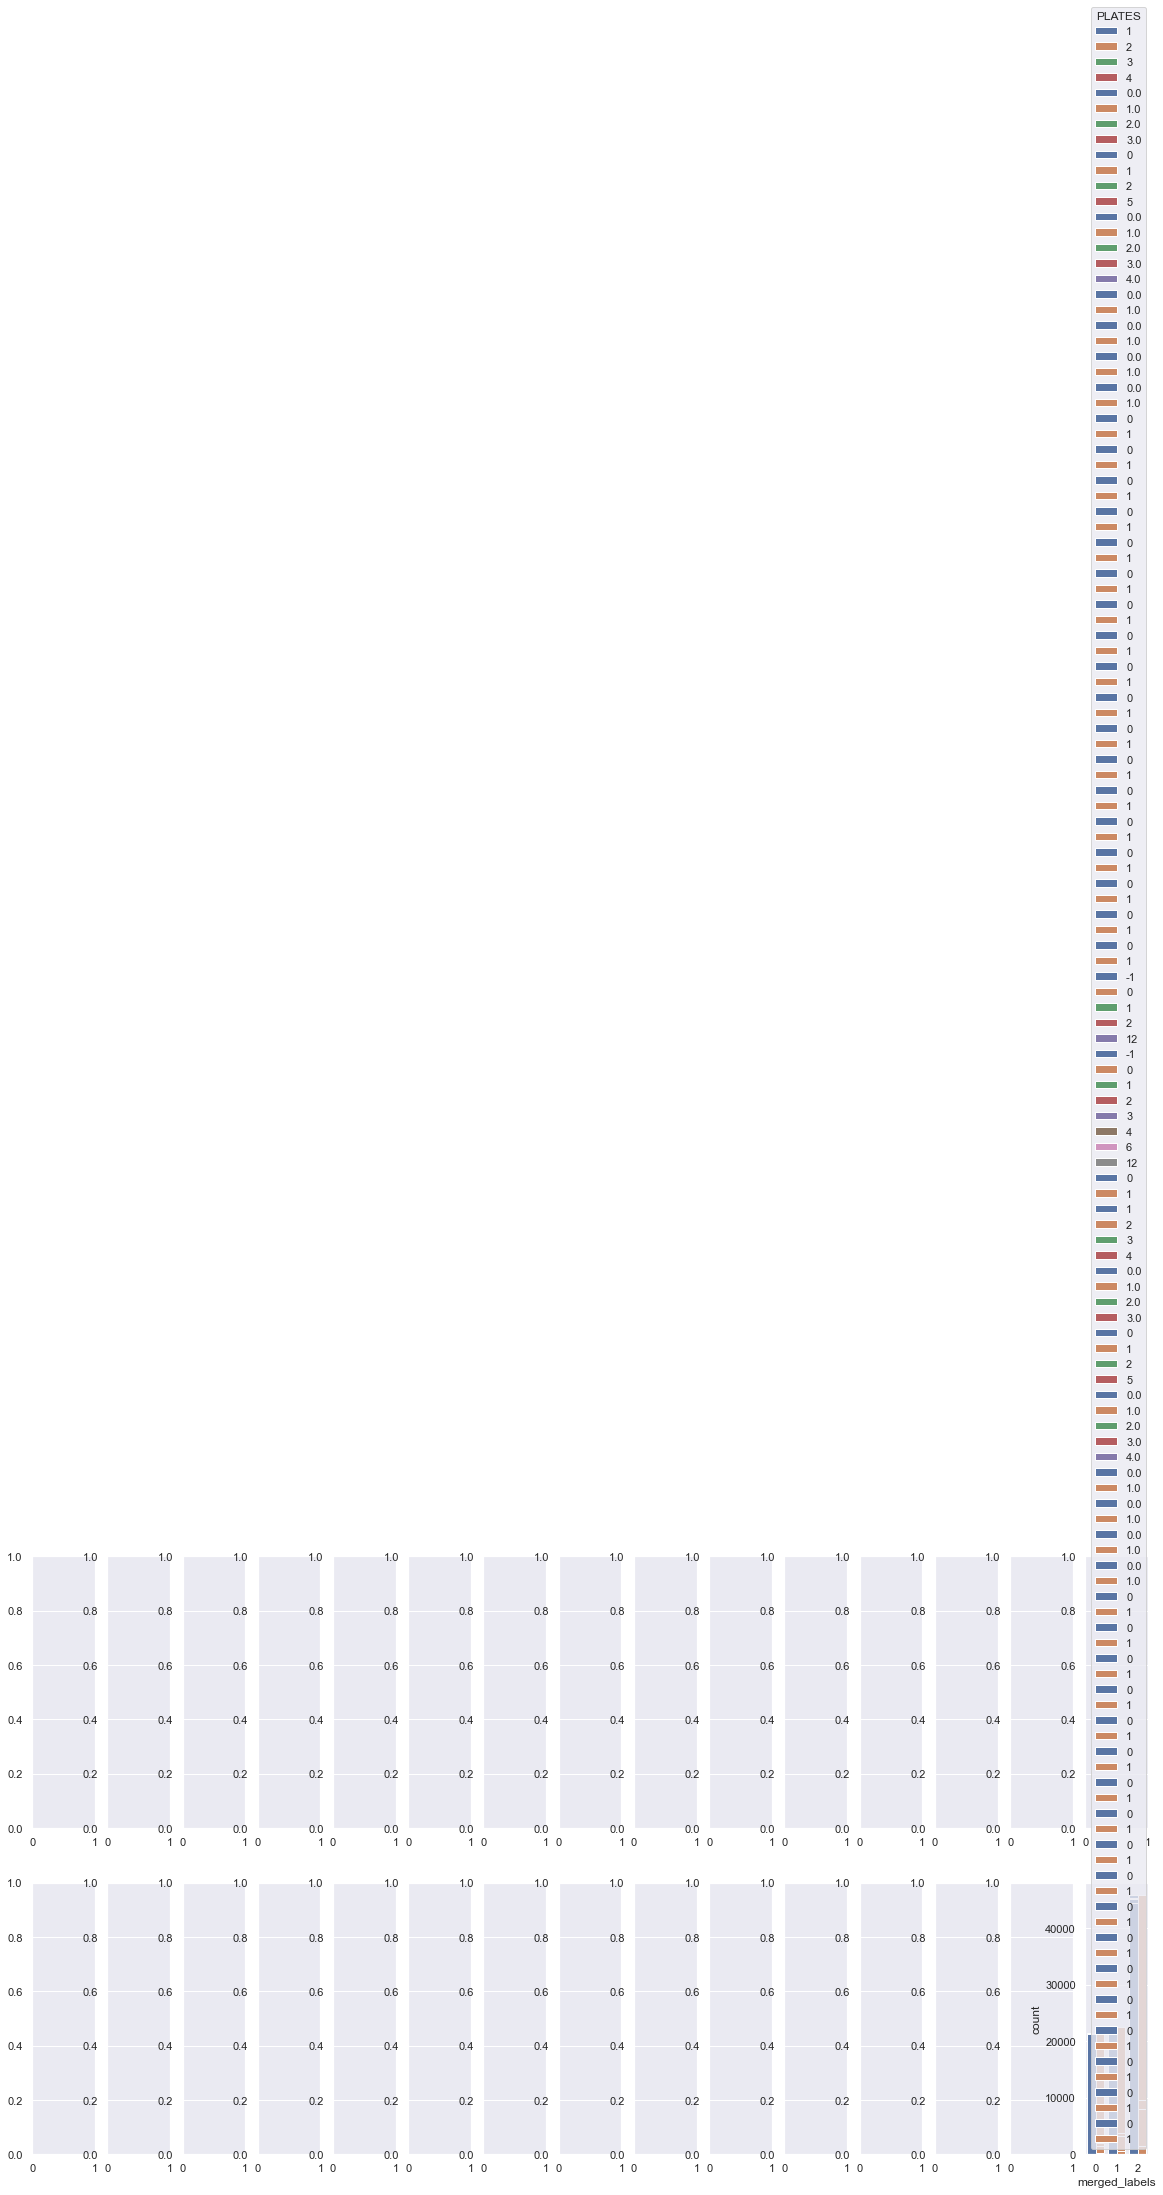

None


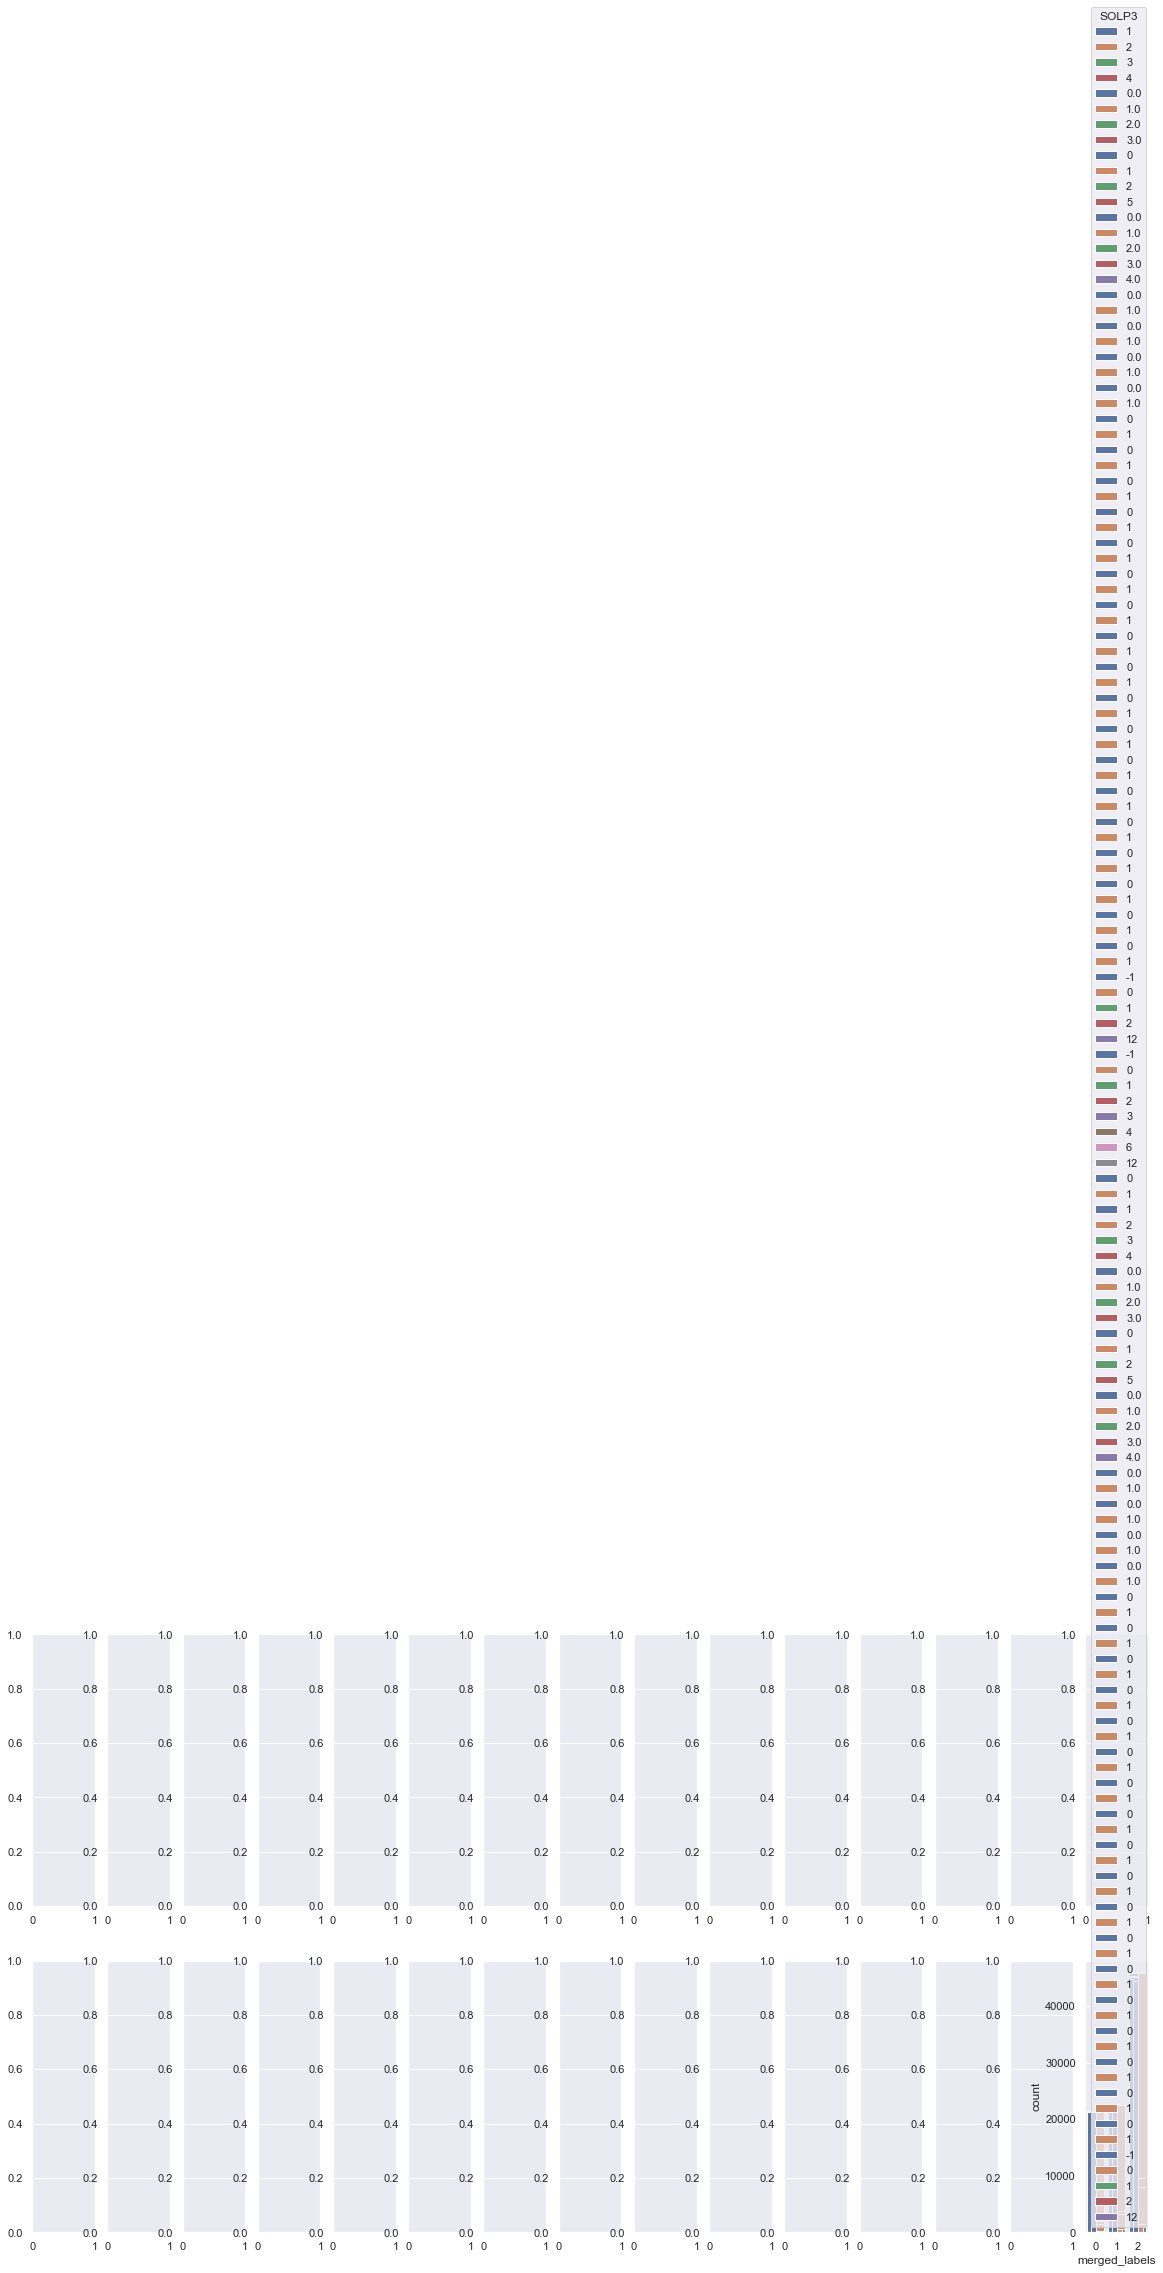

None


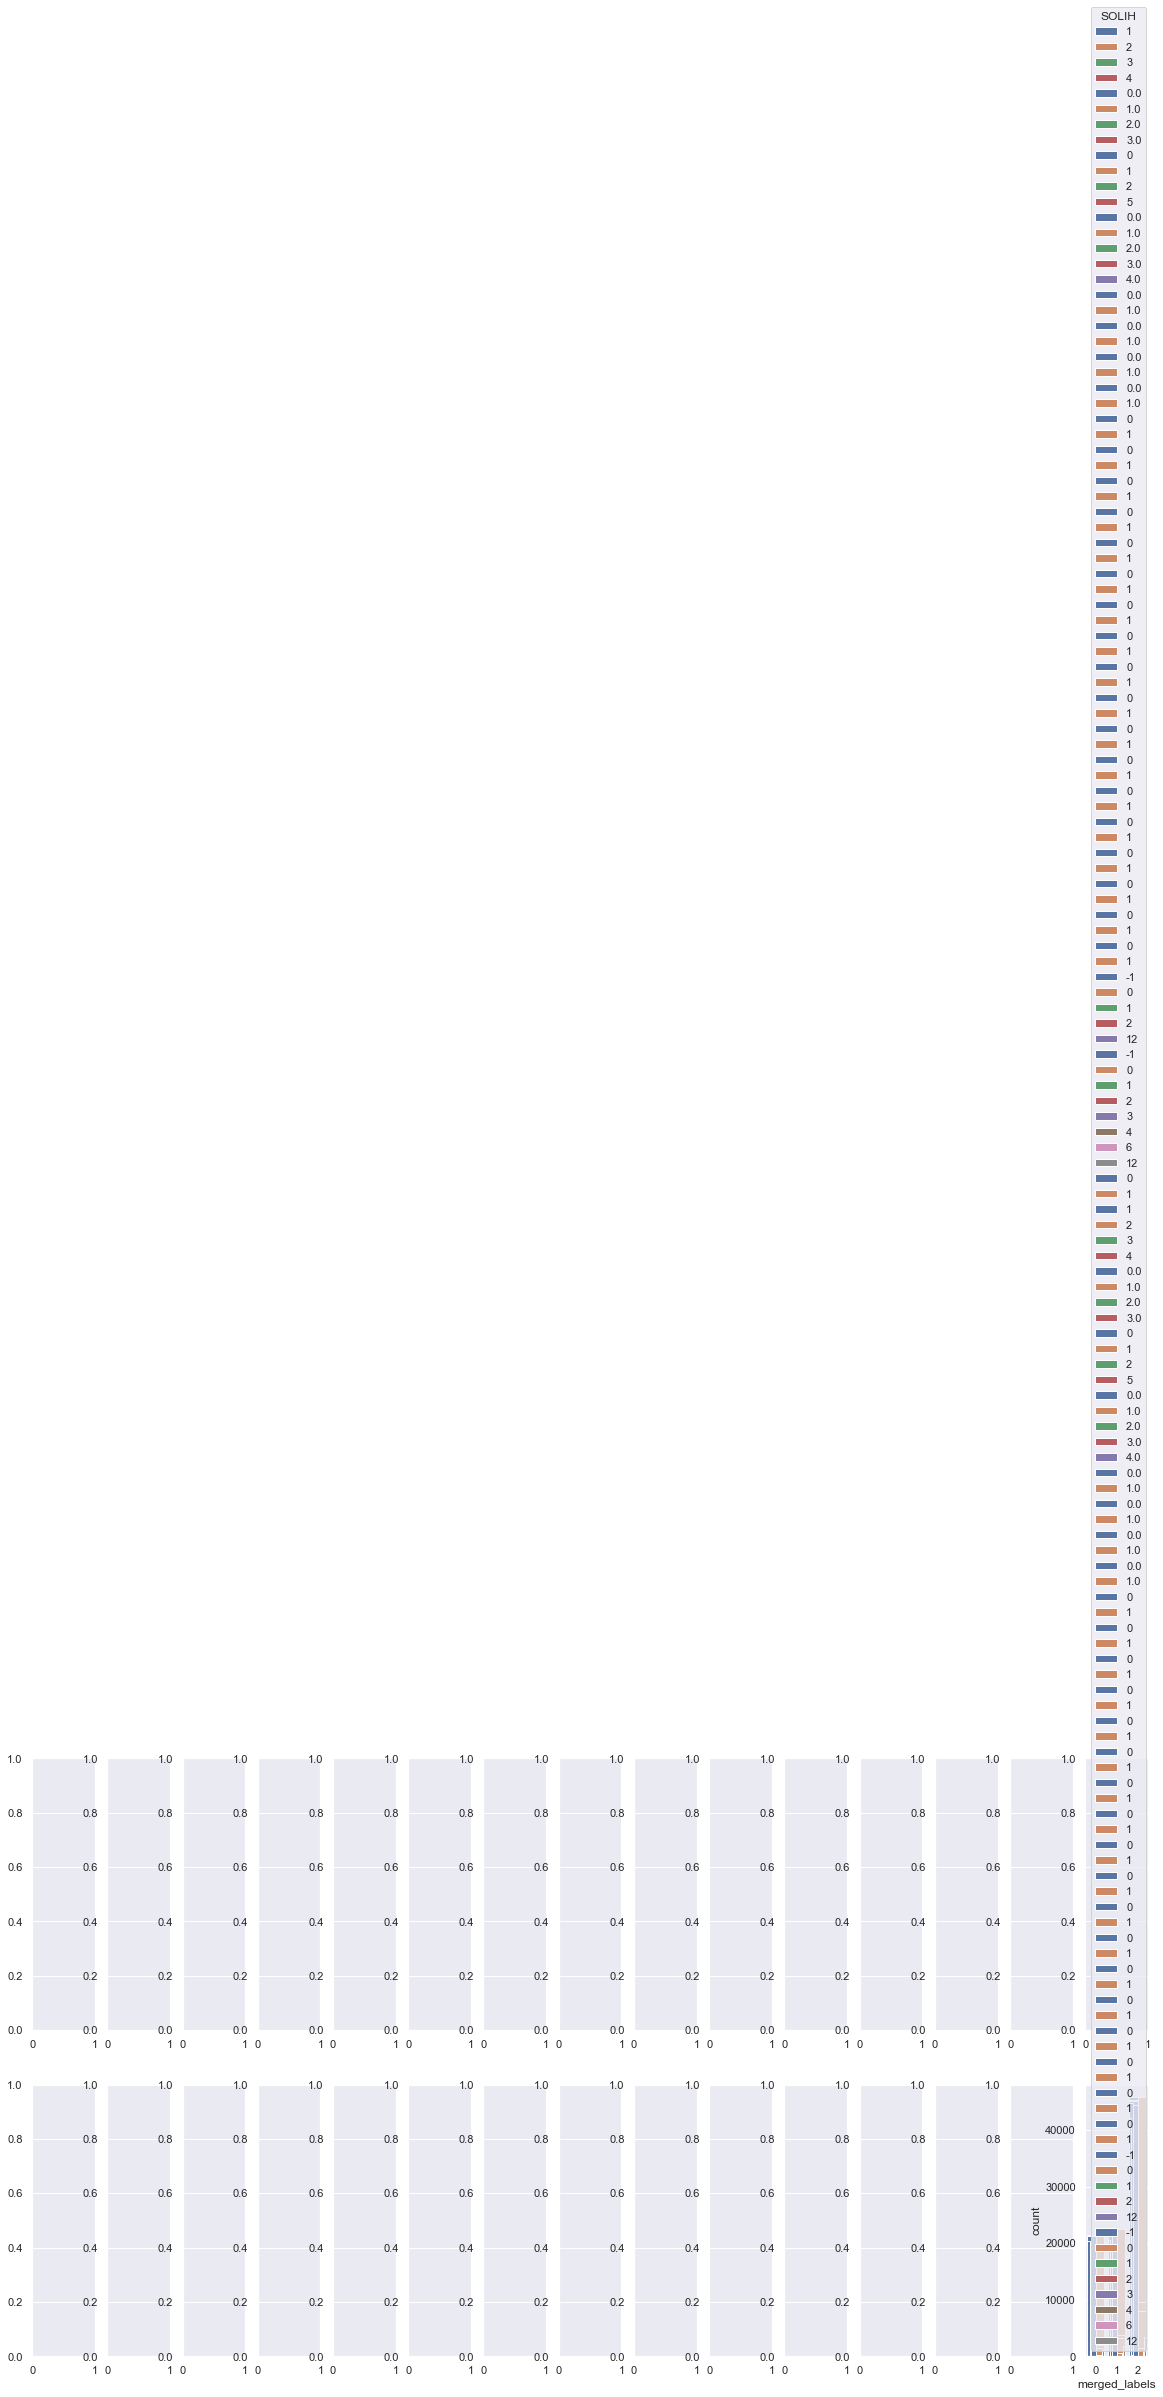

None


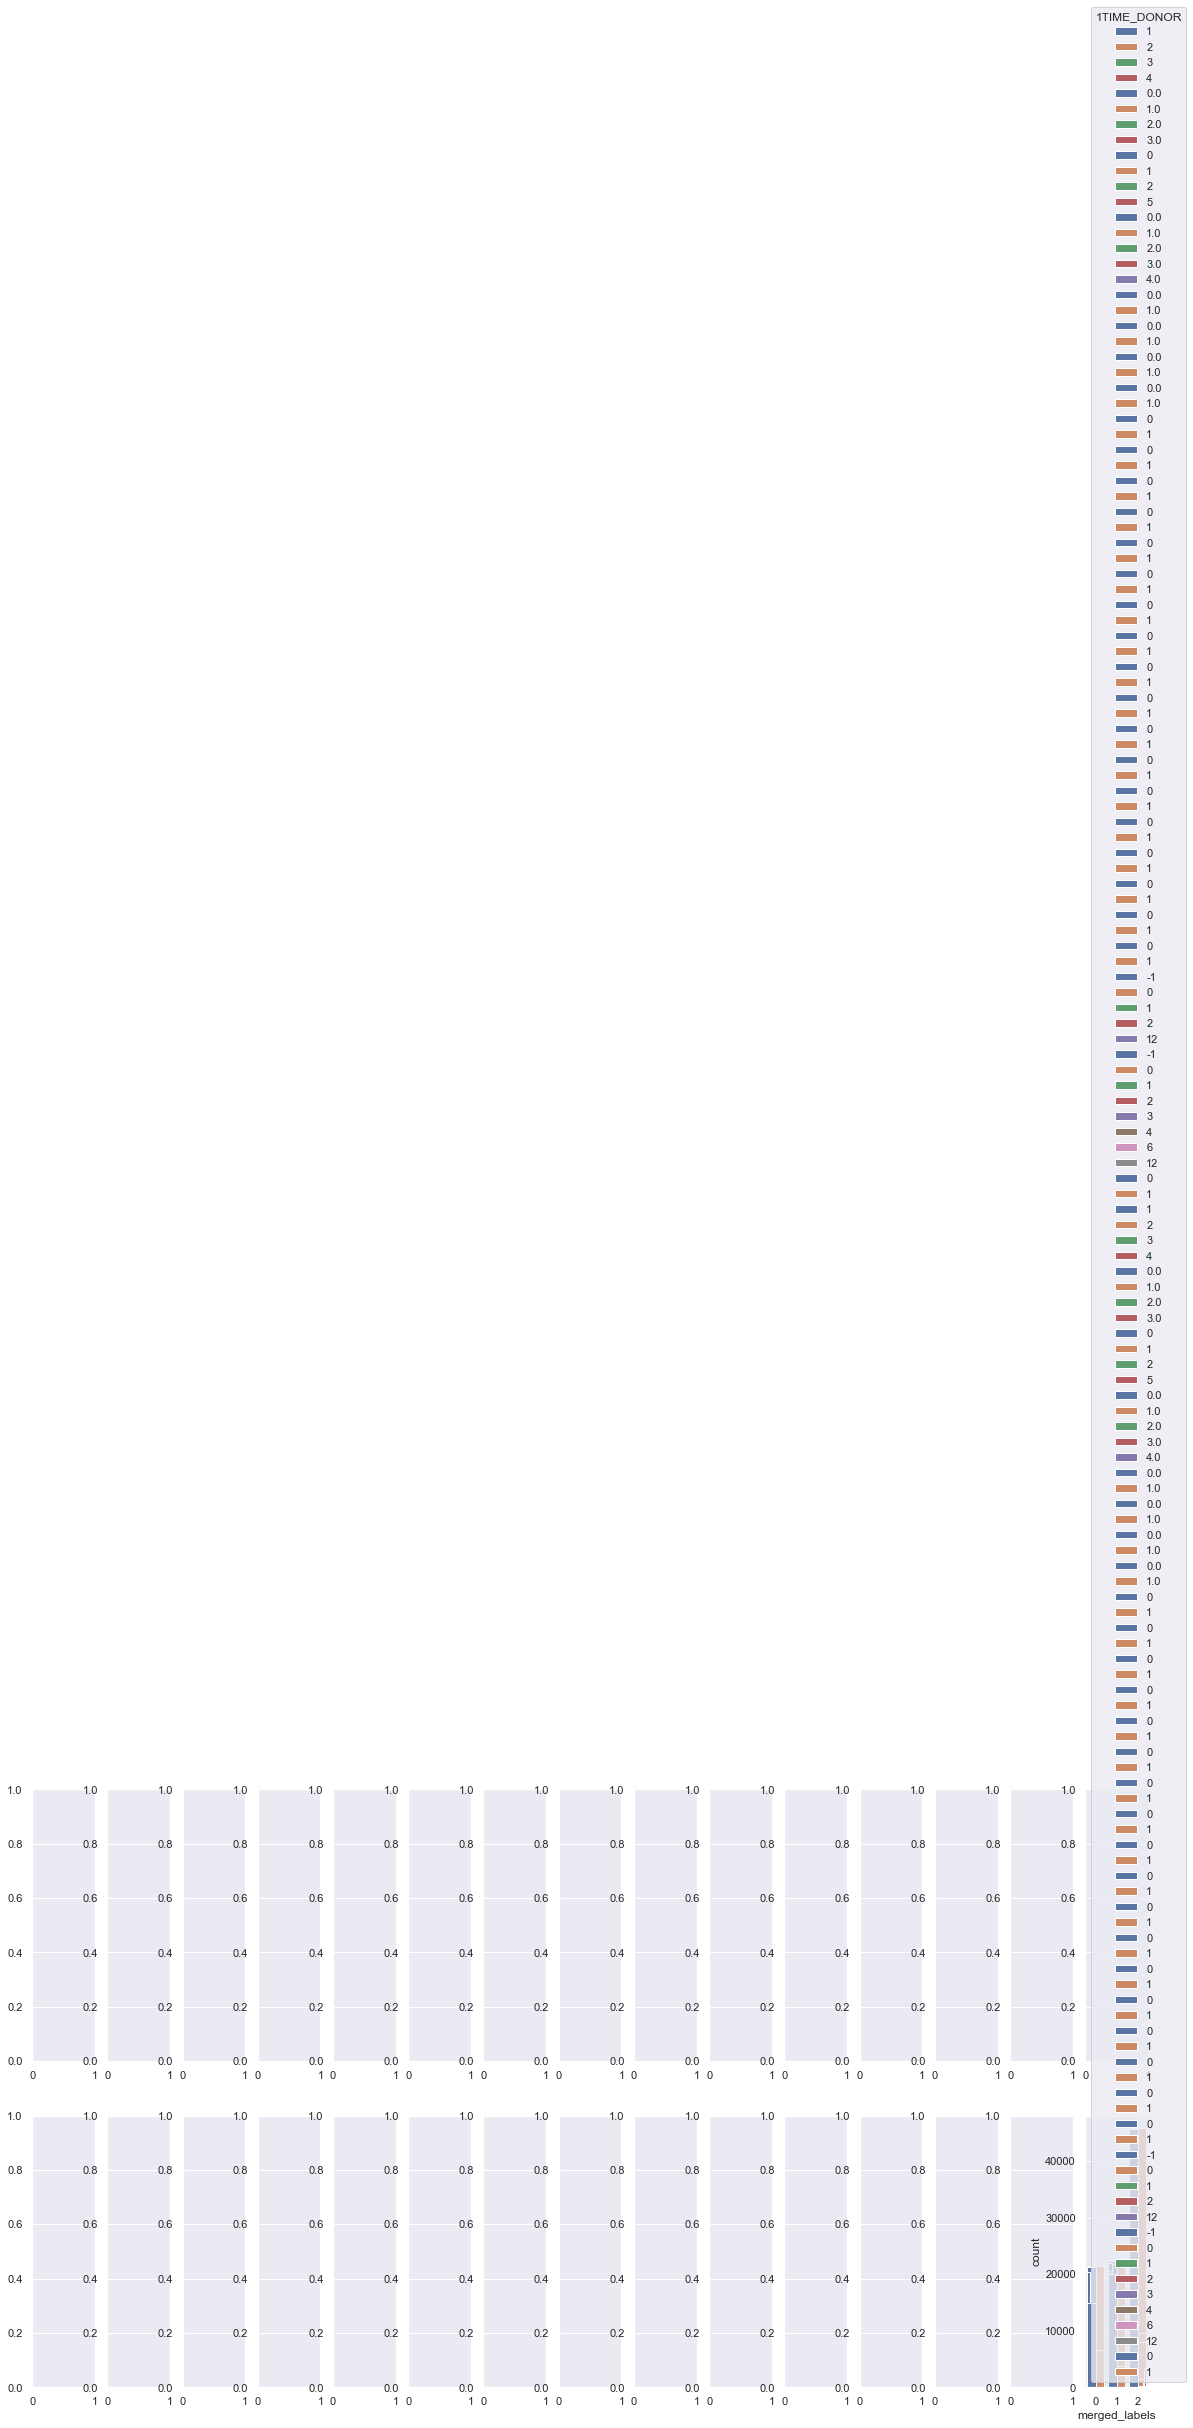

In [168]:
for var in behav_nonmetricfeatures:
    sns.countplot(data=donors_visualizations, x= 'merged_labels', hue=var)
    plt.show()
    fig = plt.gcf()
    print(fig.show())
    from IPython.display import display
    display(fig)

In [174]:


# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(behav_nonmetricfeatures) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), behav_nonmetricfeatures): # Notice the zip() function and flatten() method
    sns.countplot(donors_visualizations[feat], hue='merged_labels',ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'categorical_variables_frequecies.png'), dpi=200)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

ValueError: Could not interpret input 'merged_labels'

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

a= np.random.choice(["{}".format(i) for i in [1,2,3]], size=(12,3))
df = pd.DataFrame(a, columns=["Attribute_{}".format(i) for i in list("ABC")])

sns.countplot(x="variable", hue="value", data=pd.melt(df))

plt.show()

In [171]:
donors

RECPGVG  RECSWEEP  NUMCHLD  INCOME       HIT  SOLP3  SOLIH  \
CONTROLN                                                               
95515           0         0      0.0       3  0.000000     -1     -1   
15078           0         0      0.0       3  0.666667     -1     -1   
172556          0         0      0.0       1  0.666667     -1     -1   
47784           0         0      0.0       4  0.000000     -1     -1   
62117           0         0      1.0       4  0.000000     -1     -1   
...           ...       ...      ...     ...       ...    ...    ...   
184568          0         0      0.0       6  0.000000     -1     -1   
122706          0         0      1.0       7  0.333333     -1     -1   
189641          0         0      0.0       4  0.000000     12     -1   
4693            0         0      0.0       7  0.000000     -1     12   
185114          1         0      0.0       5  1.000000     -1     12   

          COLLECT1  VETERANS  BIBLE  ...  urbanicity_level_3  \
CONTROLN                             ...                       
95515            0         0      0  ...                 1.0   
15078            0         0      0  ...                 0.0   
172556           0         0      0  ...                 0.0   
47784            0         0      0  ...                 1.0   
62117            0         0      0  ...                 1.0   
...            ...       ...    ...  ...                 ...   
184568           0         0      0  ...                 0.0   
122706           0         0      0  ...                 0.0   
189641           0         0      0  ...                 0.0   
4693             0         0      0  ...                 0.0   
185114           0         0      0  ...                 0.0   

          urbanicity_level_4  MSA_1600.0  MSA_4480.0  MSA_Other  DMA_803.0  \
CONTROLN                                                                     
95515                    0.0         0.0         0.0        0.0        0.0   
15078                    1.0         0.0         0.0        0.0        0.0   
172556                   1.0         0.0         0.0        1.0        0.0   
47784                    0.0         0.0         0.0        1.0        0.0   
62117                    0.0         0.0         0.0        0.0        0.0   
...                      ...         ...         ...        ...        ...   
184568                   0.0         0.0         0.0        1.0        0.0   
122706                   0.0         0.0         0.0        1.0        0.0   
189641                   0.0         0.0         0.0        1.0        0.0   
4693                     0.0         0.0         0.0        1.0        1.0   
185114                   0.0         0.0         0.0        1.0        0.0   

          DMA_807.0  DMA_Other  behavior_labels  socio_labels  
CONTROLN                                                       
95515           0.0        1.0                0             0  
15078           0.0        1.0                0             0  
172556          0.0        1.0                3             1  
47784           0.0        1.0                2             2  
62117           0.0        1.0                0             0  
...             ...        ...              ...           ...  
184568          0.0        1.0                4             2  
122706          0.0        1.0                4             1  
189641          0.0        1.0                2             0  
4693            0.0        0.0                0             1  
185114          0.0        1.0                1             2  

[89778 rows x 158 columns]

## Cluster visualization using t-SNE behavior

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(cluster_behaviour)

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=donors['behavior_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## Cluster visualization using t-SNE socio demographic

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(cluster_socio_demographic)

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=donors['socio_labels'], colormap='tab10', figsize=(15,10))
plt.show()